In [ ]:
###py - 3.9.7 

##Problm Statement

'''Building a Next Best Action model for Standard Bank

Modern customer analytics and personalization systems use a wide variety of methods that help to reveal and 
quantify customer preferences and intent, making marketing messages, ads, offers, and recommendations more relevant and engaging. 
However, most of these methods are designed to optimize only one immediate interaction with a customer and
 use objective functions defined through metrics like a click-through rate (CTR) or conversion rate (CR).
  This problem can be particularly important in industries like retail banking and telecom where customer relationships evolve over long periods of time.

In this project we must combine high performing classification engine with recommendation engine. 
This Project consists of two stages:
Stage-1: Classification Engine: Create High Performing Classification Engine(Which Classifies Churn customer or non-churn customer based on data provided)
Stage-2: Recommendation Engine: Create a dummy dataset related to Types of Churn customers and right product recommendation to make them non churn customers.
Note1: Recommendations need to increase more conversion rate, so we can convert churn customers into non-churn customers.
Note2: With improper classification engine, we can make this Next Best Action project successful.
 So, make sure classification engine going to give high quality performance. 

Submit the Script, Dummy Dataset for Recommendation engine & PowerPoint'''


In [14]:
#import nessesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')


In [ ]:
#oversample ,undersample , stratify  

In [ ]:
#look on dat what we have

In [ ]:
#import data
data= pd.read_excel('CHURNDATA.xlsx')
data.head()

CIF              CUS_DOB  AGE  CUS_Month_Income CUS_Gender  \
0  XXXXXX  Feb 13 1970 12:00AM   49           7116.64       MALE   
1  XXXXXX  Sep 20 1973 12:00AM   46        1500000.00     FEMALE   
2  XXXXXX  Jul 18 1966 12:00AM   53        5000000.00     FEMALE   
3  XXXXXX  Jan  9 2004 12:00AM   15            500.00     FEMALE   
4  XXXXXX  Mar  7 1971 12:00AM   48        9000000.00     FEMALE   

  CUS_Marital_Status CUS_Customer_Since  YEARS_WITH_US  \
0            MARRIED         1994-06-30             25   
1             SINGLE         2005-05-19             14   
2             SINGLE         2005-05-20             14   
3             SINGLE         2005-05-20             14   
4             SINGLE         2014-06-30              5   

   # total debit transactions for S1  # total debit transactions for S2  ...  \
0                                277                                265  ...   
1                                 37                                 15  ...   
2                                 31                                 14  ...   
3                                  0                                  1  ...   
4                                 15                                 33  ...   

   total credit amount for S2  total credit amount for S3  total debit amount  \
0                  1764079.61                  2378592.62          4758311.63   
1                    19500.00                    57500.00           139363.22   
2                   240311.84                    70946.86            37375.46   
3                    28089.99                    18753.92             4000.00   
4                   176000.00                    70500.00           338470.29   

   total debit transactions  total credit amount  total credit transactions  \
0                       887           5659653.33                         65   
1                        97             87000.00                         10   
2                        53           1020883.70                         27   
3                         1             76946.96                         12   
4                        60            442100.00                         21   

   total transactions  CUS_Target   TAR_Desc  Status  
0                 952        2231  EXECUTIVE  ACTIVE  
1                 107        2223        LOW  ACTIVE  
2                  80        2222      MIDLE  ACTIVE  
3                  13        2223        LOW  ACTIVE  
4                  81        2223        LOW  ACTIVE  

[5 rows x 28 columns]

In [ ]:
df=data.copy()

In [ ]:
print(df.isnull().sum())

CIF                                    0
CUS_DOB                                0
AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
CUS_Customer_Since                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactio

In [ ]:
df.dtypes

CIF                                           object
CUS_DOB                                       object
AGE                                            int64
CUS_Month_Income                             float64
CUS_Gender                                    object
CUS_Marital_Status                            object
CUS_Customer_Since                    datetime64[ns]
YEARS_WITH_US                                  int64
# total debit transactions for S1              int64
# total debit transactions for S2              int64
# total debit transactions for S3              int64
total debit amount for S1                    float64
total debit amount for S2                    float64
total debit amount for S3                    float64
# total credit transactions for S1             int64
# total credit transactions for S2             int64
# total credit transactions for S3             int64
total credit amount for S1                   float64
total credit amount for S2                   f

In [ ]:
df['Status'].value_counts()

ACTIVE    1022
CHURN      227
Name: Status, dtype: int64

In [ ]:
# creating a dict file 
Status = {'ACTIVE': 0,'CHURN': 1}
  
# traversing through dataframe
# values where key matches
df.Status = [Status[item] for item in data.Status]
print(df)

         CIF              CUS_DOB  AGE  CUS_Month_Income CUS_Gender  \
0     XXXXXX  Feb 13 1970 12:00AM   49           7116.64       MALE   
1     XXXXXX  Sep 20 1973 12:00AM   46        1500000.00     FEMALE   
2     XXXXXX  Jul 18 1966 12:00AM   53        5000000.00     FEMALE   
3     XXXXXX  Jan  9 2004 12:00AM   15            500.00     FEMALE   
4     XXXXXX  Mar  7 1971 12:00AM   48        9000000.00     FEMALE   
...      ...                  ...  ...               ...        ...   
1244  XXXXXX  Sep 10 1951 12:00AM   68           4500.00       MALE   
1245  XXXXXX  Mar 23 1984 12:00AM   35        3500000.00       MALE   
1246  XXXXXX  Feb  4 1985 12:00AM   34           1000.00       MALE   
1247  XXXXXX  Feb  3 1950 12:00AM   69        2000000.00       MALE   
1248  XXXXXX  Feb 23 1961 12:00AM   58        5000000.00     FEMALE   

     CUS_Marital_Status CUS_Customer_Since  YEARS_WITH_US  \
0               MARRIED         1994-06-30             25   
1                SINGLE  

In [ ]:
#create a new col for Status where 1= Active and 0=  churn
df['Status'].value_counts()

0    1022
1     227
Name: Status, dtype: int64

In [ ]:
#we have some missing value to Deal And  incorrect data
# we don't required col 0 
# and Status col is our o/p col


In [ ]:
df.drop(['CIF'],axis=1,inplace=True)

#Univarient analysis

<AxesSubplot:xlabel='AGE'>

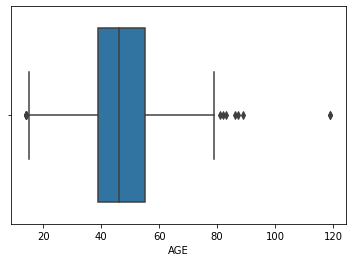

In [ ]:
#compare age and status with scatter plot
sns.boxplot(x='AGE',data=df)
#we can't cosidered as outlier may those ppl who are not active may be some reason 

<AxesSubplot:ylabel='Density'>

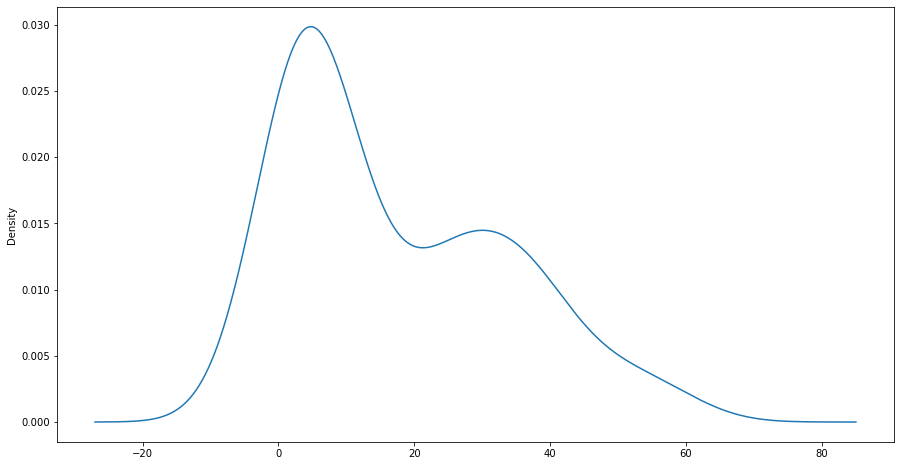

In [ ]:
df['AGE'].value_counts().plot(kind='kde',figsize=(15,8))

In [ ]:
df['AGE'].min()

14

<AxesSubplot:ylabel='Density'>

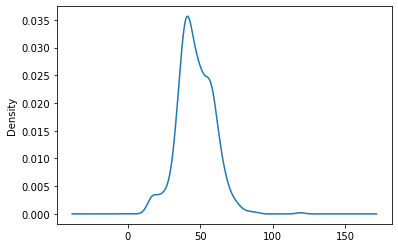

In [ ]:
df['AGE']=np.polynomial.Chebyshev(df['AGE'])
df['AGE'].plot(kind='kde')

In [ ]:
#CUS_Month_Income  

In [ ]:
df['CUS_Month_Income'].value_counts().isna().sum()

0

In [ ]:
#get nan value
df['CUS_Month_Income'].isna().sum()


11

In [ ]:
df['CUS_Month_Income'].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9],include='all').astype(int)


count        1238
mean      2764868
std       5406761
min             0
10%          2000
20%          3500
30%        100000
40%       1000000
50%       1500000
60%       2000000
70%       2500000
80%       3800000
90%       6500000
max      80000000
Name: CUS_Month_Income, dtype: int32

sns.ecdfplot(df['CUS_Month_Income'])#sns.rugplot(df[''])

In [ ]:
#create a funtion to Find NULL keyword in colunms
def find_null(df):
    for CUS_Month_Income in df.columns:
        print(CUS_Month_Income)
        print(df[CUS_Month_Income].isnull().sum())
        print('\n')
find_null(df)


CUS_DOB
0


AGE
0


CUS_Month_Income
11


CUS_Gender
2


CUS_Marital_Status
0


CUS_Customer_Since
0


YEARS_WITH_US
0


# total debit transactions for S1
0


# total debit transactions for S2
0


# total debit transactions for S3
0


total debit amount for S1
0


total debit amount for S2
0


total debit amount for S3
0


# total credit transactions for S1
0


# total credit transactions for S2
0


# total credit transactions for S3
0


total credit amount for S1
0


total credit amount for S2
0


total credit amount for S3
0


total debit amount
0


total debit transactions
0


total credit amount
0


total credit transactions
0


total transactions
0


CUS_Target
0


TAR_Desc
0


Status
0




In [ ]:
df['CUS_Month_Income'].loc[df['CUS_Month_Income'] == 'NAN'] = np.nan
print(df['CUS_Month_Income'].isnull().sum())

11


In [ ]:
#get row where nan value is present
df[df['CUS_Month_Income'].isnull()]


CUS_DOB    AGE  CUS_Month_Income CUS_Gender  \
85    Apr  3 1957 12:00AM   62.0               NaN     FEMALE   
99    Dec 31 1953 12:00AM   66.0               NaN     FEMALE   
184   Jan  1 1900 12:00AM  119.0               NaN        NaN   
316   Jan  2 1975 12:00AM   44.0               NaN       MALE   
368   May  7 1976 12:00AM   43.0               NaN       MALE   
400   Jul 15 1963 12:00AM   56.0               NaN       MALE   
427   Dec  7 1963 12:00AM   56.0               NaN       MALE   
857   Feb  2 1961 12:00AM   58.0               NaN     FEMALE   
938   Mar 13 1976 12:00AM   43.0               NaN     FEMALE   
996   Jan  1 1900 12:00AM  119.0               NaN        NaN   
1047  Jun 16 1946 12:00AM   73.0               NaN     FEMALE   

     CUS_Marital_Status CUS_Customer_Since  YEARS_WITH_US  \
85               SINGLE         1996-05-07             23   
99              MARRIED         1998-01-20             21   
184             MARRIED         1998-01-20             21   
316              SINGLE         2005-05-26             14   
368              SINGLE         2005-06-07             14   
400              SINGLE         1995-03-17             24   
427              SINGLE         1991-11-09             28   
857              SINGLE         1997-01-13             22   
938             MARRIED         1996-07-25             23   
996              SINGLE         1998-01-07             21   
1047            MARRIED         1998-01-27             21   

      # total debit transactions for S1  # total debit transactions for S2  \
85                                   21                                 17   
99                                   11                                 25   
184                                   4                                  4   
316                                   0                                  2   
368                                  22                                 56   
400                                  26                                 20   
427                                   9                                 14   
857                                  37                                 68   
938                                   6                                  6   
996                                  27                                  0   
1047                                  5                                 11   

      # total debit transactions for S3  ...  total credit amount for S2  \
85                                    9  ...                        0.00   
99                                   22  ...                    24294.55   
184                                   1  ...                     2000.00   
316                                   0  ...                        0.00   
368                                  23  ...                   125400.78   
400                                   0  ...                        0.00   
427                                   2  ...                    18550.72   
857                                  47  ...                    80679.78   
938                                   9  ...                        0.00   
996                                   0  ...                        0.00   
1047                                  3  ...                    22500.00   

      total credit amount for S3  total debit amount  \
85                          0.00            82043.30   
99                      26893.50           101900.00   
184                         0.00            18649.30   
316                         0.00             1000.00   
368                     41800.26           229406.14   
400                         0.00           297687.54   
427                         0.00            26745.00   
857                    180922.70           276279.95   
938                      2900.00             9751.20   
996                         0.00            43318.00   
1047                     3000.00      

In [ ]:
df['CUS_Month_Income'].fillna(df['CUS_Month_Income'].ffill(),inplace=True)
#method='ffill'/'bfill'/ mean/median/mode

In [ ]:
df['CUS_Month_Income'].unique().astype(int)

array([    7116,  1500000,  5000000,      500,  9000000,     2556,
         200000, 10000000, 15000000,  2800000,     3000,  1000000,
        6131000,   250000,   500000,  2500000,  2000000,  6000000,
          12000, 30000000,        0,     5648,     2500,     3500,
           1014,  1557470,      180,     1315,     1500,    10287,
        6500000,  5250000,     6000, 12000000,    10760,  3500000,
        3200000,  3000000,   750000,   100000,  4100000,  1600000,
           4950,      400,  2900000, 20000000,  3800000,  6853720,
       12800000,    18000,      298,    20000,  4500000,  1200000,
          10000,      390,     2250,     1000,    25510,  3375000,
        4000000,  2100000,     2100,  8869000,     2000,     1850,
        1850000,  6400000,    73000,   300000,   180000, 18000000,
        1800000,  1900000,  2259248,  7500000,  7000000,    37675,
       25000000,      350,  1660278,  5726000,  1300000,  9759957,
             15,  1750000,  8000000,  2850000,   185000,  2450

In [ ]:
df[df['CUS_Month_Income'].isnull()]

Empty DataFrame
Columns: [CUS_DOB, AGE, CUS_Month_Income, CUS_Gender, CUS_Marital_Status, CUS_Customer_Since, YEARS_WITH_US, # total debit transactions for S1, # total debit transactions for S2, # total debit transactions for S3, total debit amount for S1, total debit amount for S2, total debit amount for S3, # total credit transactions for S1, # total credit transactions for S2, # total credit transactions for S3, total credit amount for S1, total credit amount for S2, total credit amount for S3, total debit amount, total debit transactions, total credit amount, total credit transactions, total transactions, CUS_Target, TAR_Desc, Status]
Index: []

[0 rows x 27 columns]

#download the df data and save it as csv file
df.to_excel('CHURN_DATA.xlsx',index=False)

df[df['CUS_Month_Income'].integer.startswith('NaN')]

In [ ]:
import plotly.express as px
px.histogram(df,x='CUS_Month_Income',nbins=200)

In [ ]:
#no outlier detect 

<AxesSubplot:>

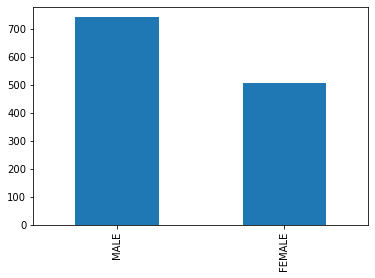

In [ ]:
df['CUS_Gender'].value_counts().plot(kind='bar')

In [ ]:
df['CUS_Gender'].fillna(df['CUS_Gender'].mode()[0],inplace=True)

In [ ]:
df['CUS_Gender'].isna().sum()

0

In [ ]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

CUS_DOB : ['Feb 13 1970 12:00AM' 'Sep 20 1973 12:00AM' 'Jul 18 1966 12:00AM' ...
 'Feb  4 1985 12:00AM' 'Feb  3 1950 12:00AM' 'Feb 23 1961 12:00AM']
AGE : [ 49.  46.  53.  15.  48.  37.  16.  39.  59.  64.  51.  43.  29.  32.
  35.  18.  30.  41.  75.  66.  62.  20.  77.  69.  34.  82.  60.  87.
  54.  36.  52.  33.  58.  45.  40.  65.  50.  27.  42.  31.  44.  76.
  47.  38.  70.  63.  61.  57.  25.  56.  26.  72.  67. 119.  55.  17.
  21.  14.  89.  24.  28.  73.  71.  23.  68.  22.  81.  79.  74.  86.
  19.  83.]
CUS_Month_Income : [7.1166400e+03 1.5000000e+06 5.0000000e+06 5.0000000e+02 9.0000000e+06
 2.5560000e+03 2.0000000e+05 1.0000000e+07 1.5000000e+07 2.8000000e+06
 3.0000000e+03 1.0000000e+06 6.1310000e+06 2.5000000e+05 5.0000000e+05
 2.5000000e+06 2.0000000e+06 6.0000000e+06 1.2000000e+04 3.0000000e+07
 0.0000000e+00 5.6481200e+03 2.5000000e+03 3.5000000e+03 1.0140000e+03
 1.5574700e+06 1.8000000e+02 1.3150000e+03 1.5000000e+03 1.0287000e+04
 6.5000000e+06 5.2500000e+06 6.00

for col in df.columns:
    df[col].replace({'?':np.nan},inplace=True)

<AxesSubplot:>

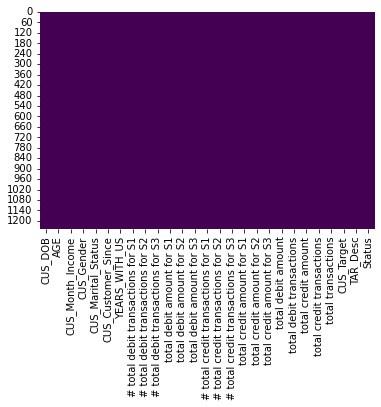

In [ ]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

num_col = ['normalized_losses', 'bore',  'stroke', 'horsepower', 'peak_rpm','price']
for col in num_col:
    auto[col]=pd.to_numeric(auto[col])
    auto[col].fillna(auto[col].mean(), inplace=True)
auto.head()

In [ ]:
#let's see normalize data we have or not and which col required for further analysis


In [ ]:
df.corr(method='pearson')#'pearson', 'spearman', 'kendall', or a callable,

AGE  CUS_Month_Income  YEARS_WITH_US  \
AGE                                 1.000000          0.111369       0.143234   
CUS_Month_Income                    0.111369          1.000000      -0.085297   
YEARS_WITH_US                       0.143234         -0.085297       1.000000   
# total debit transactions for S1  -0.059585          0.121348       0.067141   
# total debit transactions for S2  -0.069276          0.115772       0.074229   
# total debit transactions for S3  -0.054500          0.064805       0.114925   
total debit amount for S1          -0.008780          0.054319       0.004131   
total debit amount for S2          -0.013651          0.042729       0.014114   
total debit amount for S3          -0.010965          0.076395      -0.025472   
# total credit transactions for S1 -0.051233          0.110826       0.099793   
# total credit transactions for S2 -0.077252          0.108270       0.090834   
# total credit transactions for S3 -0.069688          0.030316       0.087701   
total credit amount for S1          0.006012          0.007641       0.026008   
total credit amount for S2         -0.004177          0.056028       0.041630   
total credit amount for S3         -0.020717          0.003160       0.037528   
total debit amount                 -0.013122          0.066561       0.000193   
total debit transactions           -0.063881          0.104774       0.089907   
total credit amount                -0.005686          0.020413       0.036324   
total credit transactions          -0.070961          0.088526       0.099473   
total transactions                 -0.067462          0.106578       0.094888   
CUS_Target                         -0.018540         -0.040980       0.065403   
Status                             -0.012745          0.031681      -0.013241   

                                    # total debit transactions for S1  \
AGE                                                         -0.059585   
CUS_Month_Income                                             0.121348   
YEARS_WITH_US                                                0.067141   
# total debit transactions for S1                            1.000000   
# total debit transactions for S2                            0.892302   
# total debit transactions for S3                            0.828796   
total debit amount for S1                                    0.313907   
total debit amount for S2                                    0.337218   
total debit amount for S3                                    0.445630   
# total credit transactions for S1                           0.640056   
# total credit transactions for S2                           0.615308   
# total credit transactions for S3                           0.542818   
total credit amount for S1                                   0.297500   
total credit amount for S2                                   0.404392   
total credit amount for S3                                   0.346020   
total debit amount                                           0.423062   
total debit transactions                                     0.948161   
total credit amount                                          0.366305   
total credit transactions                                    0.642397   
total transactions                                           0.941300   
CUS_Target                                                  -0.105006   
Status                                                      -0.227776   

                                    # total debit transactions for S2  \
AGE                                                         -0.069276   
CUS_Month_Income                                             0.115772   
YEARS_WITH_US                                                0.074229   
# total debit transactions for S1                            0.892302   
# total debit transactions for S2                            1.000000   
# total debit transactions for S3                          

<AxesSubplot:>

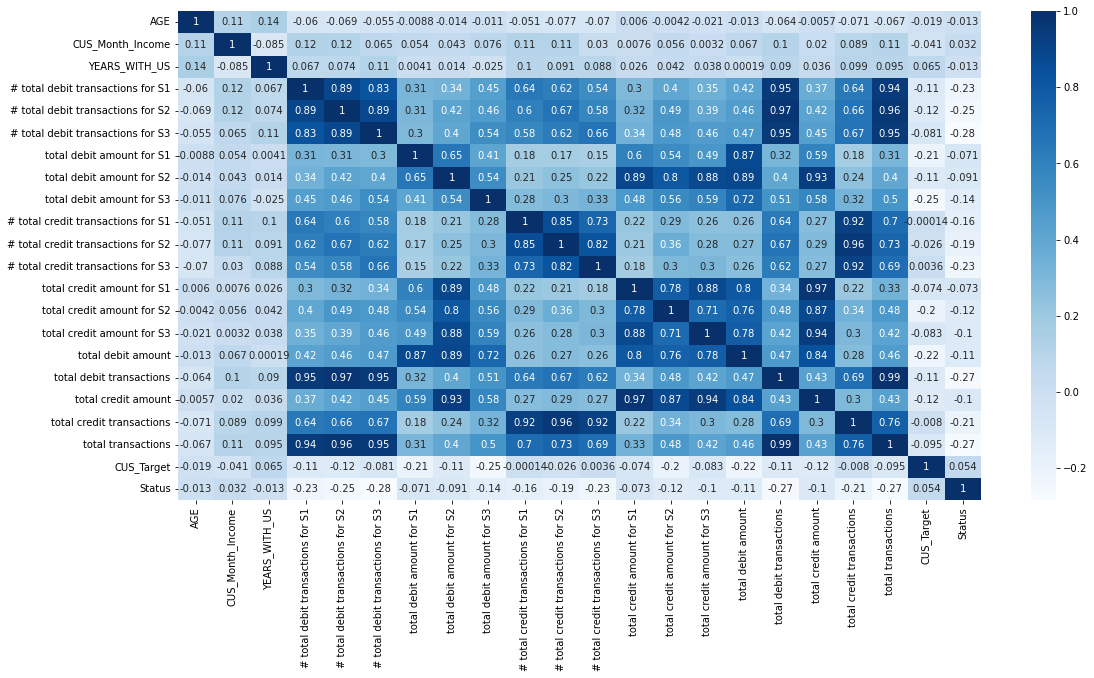

In [ ]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
df.shape

(1249, 27)

In [ ]:
#['CUS_DOB','CUS_Gender','CUS_Marital_Status','CUS_Customer_Since','TAR_Desc'] these columns aren't in anlysis
'''make them order and correlate'''

'make them order and correlate'

In [ ]:
#apply one hot encoding to categorical columns
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(categories='auto')
#apply to categorical columns


In [ ]:
dummies=pd.get_dummies(df,columns=['CUS_Gender','CUS_Marital_Status','TAR_Desc'])
dummies

CUS_DOB   AGE  CUS_Month_Income CUS_Customer_Since  \
0     Feb 13 1970 12:00AM  49.0           7116.64         1994-06-30   
1     Sep 20 1973 12:00AM  46.0        1500000.00         2005-05-19   
2     Jul 18 1966 12:00AM  53.0        5000000.00         2005-05-20   
3     Jan  9 2004 12:00AM  15.0            500.00         2005-05-20   
4     Mar  7 1971 12:00AM  48.0        9000000.00         2014-06-30   
...                   ...   ...               ...                ...   
1244  Sep 10 1951 12:00AM  68.0           4500.00         2005-07-25   
1245  Mar 23 1984 12:00AM  35.0        3500000.00         2005-07-27   
1246  Feb  4 1985 12:00AM  34.0           1000.00         2005-07-25   
1247  Feb  3 1950 12:00AM  69.0        2000000.00         2005-07-26   
1248  Feb 23 1961 12:00AM  58.0        5000000.00         2005-07-26   

      YEARS_WITH_US  # total debit transactions for S1  \
0                25                                277   
1                14                                 37   
2                14                                 31   
3                14                                  0   
4                 5                                 15   
...             ...                                ...   
1244             14                                 13   
1245             14                                 55   
1246             14                                415   
1247             14                                147   
1248             14                                 76   

      # total debit transactions for S2  # total debit transactions for S3  \
0                                   265                                345   
1                                    15                                 45   
2                                    14                                  8   
3                                     1                                  0   
4                                    33                                 12   
...                                 ...                                ...   
1244                                 12                                  1   
1245                                 35                                 37   
1246                                368                                424   
1247                                202                                234   
1248                                 88                                 69   

      total debit amount for S1  total debit amount for S2  ...  \
0                    1459126.64                 1230543.08  ...   
1                      35372.55                   20134.00  ...   
2                      28248.85                    4777.66  ...   
3                          0.00                    4000.00  ...   
4                      69083.38                  223007.51  ...   
...                         ...                        ...  ...   
1244                    3069.60                    2376.00  ...   
1245                  119297.02                  118884.00  ...   
1246                 1068684.72                  571814.89  ...   
1247                  397602.73                  514584.25  ...   
1248                   59730.64                  420105.56  ...   

      CUS_Marital_Status_DIVORCE  CUS_Marital_Status_MARRIED  \
0                              0                           1   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   
...                          ...                         ...   
1244                           0                           0   
1245                           0                           0   
1246                           0                           0   
1247                           0                           0   
1248      

In [ ]:
dff=dummies.copy()

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CUS_DOB                             1249 non-null   object        
 1   AGE                                 1249 non-null   float64       
 2   CUS_Month_Income                    1249 non-null   float64       
 3   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 4   YEARS_WITH_US                       1249 non-null   int64         
 5   # total debit transactions for S1   1249 non-null   int64         
 6   # total debit transactions for S2   1249 non-null   int64         
 7   # total debit transactions for S3   1249 non-null   int64         
 8   total debit amount for S1           1249 non-null   float64       
 9   total debit amount for S2           1249 non-null   float64       
 10  total debit amount for S

In [ ]:
dff.columns

Index(['CUS_DOB', 'AGE', 'CUS_Month_Income', 'CUS_Customer_Since',
       'YEARS_WITH_US', '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'Status', 'CUS_Gender_FEMALE', 'CUS_Gender_MALE',
       'CUS_Marital_Status_DIVORCE', 'CUS_Marital_Status_MARRIED',
       'CUS_Marital_Status_OTHER', 'CUS_Marital_Status_PARTNER',
       'CUS_Marital_Status_SINGLE', 'CUS_Marital_Status_WIDOWED',
       'TAR_Desc_EXECUTIVE', 'TAR_Desc_LOW', 'TAR_D

CUS_DOB,CUS_Customer_Since lets process date columns

In [ ]:
dff['CUS_DOB'].head(),dff['CUS_Customer_Since'].head()

(0    Feb 13 1970 12:00AM
 1    Sep 20 1973 12:00AM
 2    Jul 18 1966 12:00AM
 3    Jan  9 2004 12:00AM
 4    Mar  7 1971 12:00AM
 Name: CUS_DOB, dtype: object,
 0   1994-06-30
 1   2005-05-19
 2   2005-05-20
 3   2005-05-20
 4   2014-06-30
 Name: CUS_Customer_Since, dtype: datetime64[ns])

In [ ]:
dff['CUS_DOB'] = pd.to_datetime(dff['CUS_DOB'])
dff['Date'] = dff['CUS_DOB'].dt.strftime("%Y-%m-%d")
dff['CUS_Customer_Since'] = pd.to_datetime(dff['CUS_Customer_Since'], 
 format = '%Y-%m-%dT%H:%M:%SZ', 
 errors = 'coerce')

In [ ]:
dff['CUS_DOB'].dtype

dtype('<M8[ns]')

In [ ]:
dff['CUS_DOB'].head()

0   1970-02-13
1   1973-09-20
2   1966-07-18
3   2004-01-09
4   1971-03-07
Name: CUS_DOB, dtype: datetime64[ns]

In [ ]:
dff['CUS_Customer_Since'].dtype

dtype('<M8[ns]')

In [ ]:
dff['CUS_Customer_Since'].head()

0   1994-06-30
1   2005-05-19
2   2005-05-20
3   2005-05-20
4   2014-06-30
Name: CUS_Customer_Since, dtype: datetime64[ns]

(<AxesSubplot:>, <AxesSubplot:>)

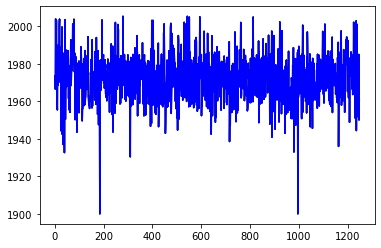

In [ ]:
dff['CUS_DOB'].plot(kind='line',color='black'),dff['Date'].astype('datetime64[ns]').plot(kind='line',color='blue')


<AxesSubplot:>

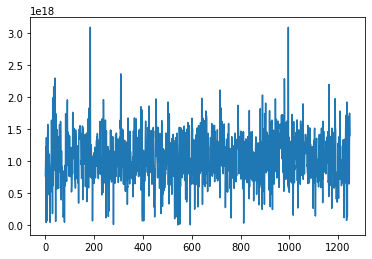

In [ ]:
dff['diffrence']=dff['CUS_Customer_Since']-dff['CUS_DOB']
dff['diffrence'].plot()

In [ ]:
dff.columns.drop(['diffrence','Date'])

Index(['CUS_DOB', 'AGE', 'CUS_Month_Income', 'CUS_Customer_Since',
       'YEARS_WITH_US', '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'Status', 'CUS_Gender_FEMALE', 'CUS_Gender_MALE',
       'CUS_Marital_Status_DIVORCE', 'CUS_Marital_Status_MARRIED',
       'CUS_Marital_Status_OTHER', 'CUS_Marital_Status_PARTNER',
       'CUS_Marital_Status_SINGLE', 'CUS_Marital_Status_WIDOWED',
       'TAR_Desc_EXECUTIVE', 'TAR_Desc_LOW', 'TAR_D

In [ ]:
dff['CUS_DOB'].isna().sum(),dff['CUS_Customer_Since'].isna().sum()

(0, 0)

Whenever I use the format parameter and if I assume all rows should have dates, I like to put an assertion statement to verify I didn’t get the format incorrect.

In [ ]:
assert dff.CUS_DOB.isnull().sum() == 0, 'missing ScheduledDay dates'
assert dff.CUS_Customer_Since.isnull().sum() == 0, 'missing AppointmentDay dates'

In [ ]:
dff['CUS_Customer_Since'].isna().sum()

0

In [ ]:
dd=dff.copy()

In [ ]:
dd['CUS_DOB_year']=dff['CUS_DOB'].dt.year
dd['CUS_DOB_month']=dff['CUS_DOB'].dt.month
dd['CUS_DOB_day']=dff['CUS_DOB'].dt.day

dd['CUS_Customer_Since_year']=dff['CUS_Customer_Since'].dt.year
dd['CUS_Customer_Since_month']=dff['CUS_Customer_Since'].dt.month
dd['CUS_Customer_Since_day']=dff['CUS_Customer_Since'].dt.day

In [ ]:
dd.describe()

AGE  CUS_Month_Income  YEARS_WITH_US  \
count  1249.000000      1.249000e+03    1249.000000   
mean     46.746998      2.750981e+06      14.116894   
std      12.315109      5.387407e+06       2.279882   
min      14.000000      0.000000e+00       0.000000   
25%      39.000000      7.116640e+03      14.000000   
50%      46.000000      1.500000e+06      14.000000   
75%      55.000000      3.000000e+06      14.000000   
max     119.000000      8.000000e+07      28.000000   

       # total debit transactions for S1  # total debit transactions for S2  \
count                        1249.000000                        1249.000000   
mean                           54.262610                          55.680544   
std                            80.732325                          81.020146   
min                             0.000000                           0.000000   
25%                             7.000000                           6.000000   
50%                            22.000000                          24.000000   
75%                            65.000000                          65.000000   
max                           715.000000                         547.000000   

       # total debit transactions for S3  total debit amount for S1  \
count                        1249.000000               1.249000e+03   
mean                           56.966373               3.147439e+05   
std                            84.649516               1.513433e+06   
min                             0.000000               0.000000e+00   
25%                             6.000000               1.155000e+04   
50%                            24.000000               5.395632e+04   
75%                            68.000000               1.892775e+05   
max                           757.000000               3.573349e+07   

       total debit amount for S2  total debit amount for S3  \
count               1.249000e+03               1.249000e+03   
mean                3.090418e+05               3.061457e+05   
std                 1.293928e+06               9.385775e+05   
min                 0.000000e+00               0.000000e+00   
25%                 1.122578e+04               7.085000e+03   
50%                 6.158130e+04               5.907391e+04   
75%                 2.096500e+05               2.250619e+05   
max                 3.723382e+07               1.866511e+07   

       # total credit transactions for S1  ...  TAR_Desc_LOW  TAR_Desc_MIDLE  \
count                         1249.000000  ...   1249.000000     1249.000000   
mean                             7.613291  ...      0.602882        0.325060   
std                             13.543207  ...      0.489497        0.468585   
min                              0.000000  ...      0.000000        0.000000   
25%                              0.000000  ...      0.000000        0.000000   
50%                              6.000000  ...      1.000000        0.000000   
75%                              8.000000  ...      1.000000        1.000000   
max                            189.000000  ...      1.000000        1.000000   

       TAR_Desc_PLATINUM                      diffrence  CUS_DOB_year  \
count        1249.000000                           1249   1249.000000   
mean            0.024820  11959 days 08:06:31.993594880   1972.253002   
std             0.155638   4453 days 19:05:02.640257536     12.315109   
min             0.000000               57 days 00:00:00   1900.000000   
25%             0.000000             9068 days 00:00:00   1964.000000   
50%             0.000000            11592 days 00:00:00   1973.000000   
75%             0.000000            15171 days 00:00:00   1980.000000   
max             1.000000            35813 days 00:00:00   2005.000000   

       CUS_DOB_month  CUS_DOB_day  CUS_Customer_Since_year  \
count    1249.000000  1249.000000              1249.000000   
mean        6.104884    14.405124              2004.883106   
std         3.497625     9.058968 

<AxesSubplot:>

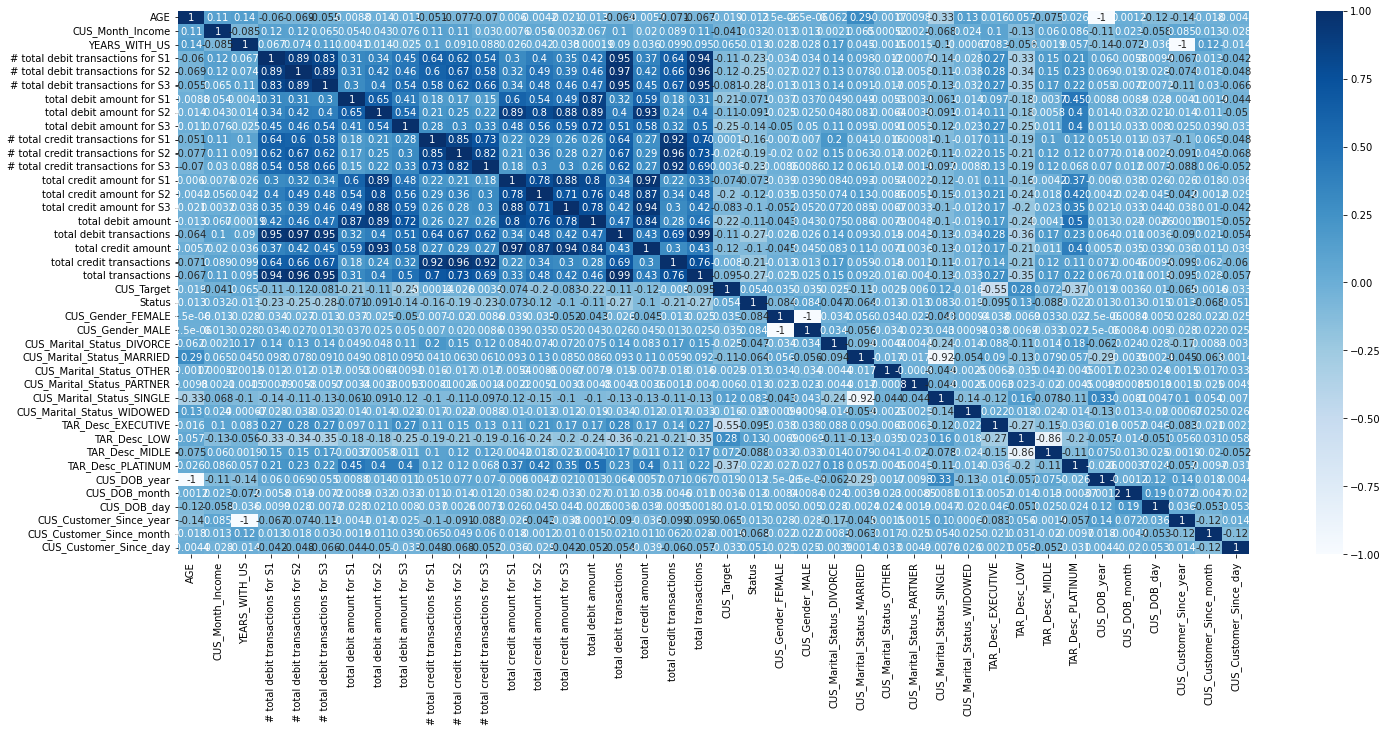

In [ ]:
plt.figure(figsize=(24,10))
sns.heatmap(dd.corr(),cbar=True,annot=True,cmap='Blues')

<AxesSubplot:>

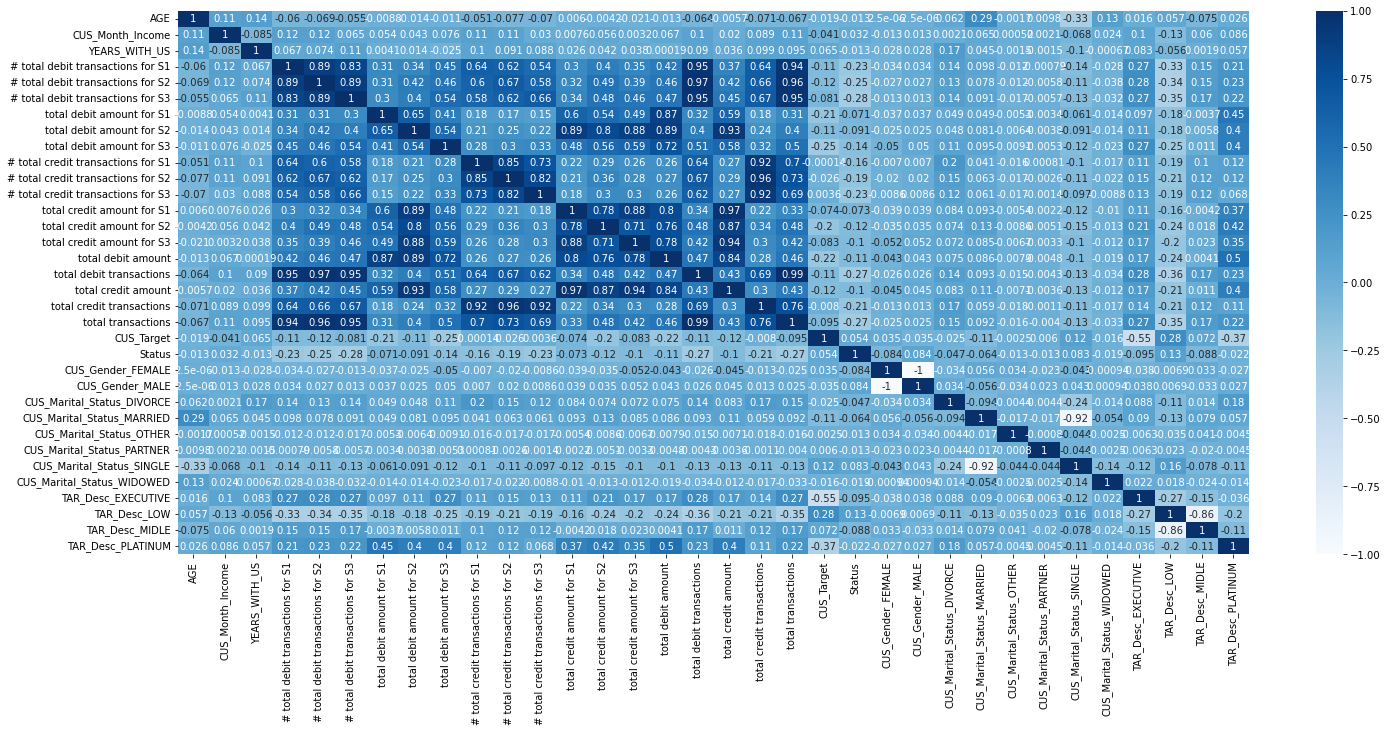

In [ ]:
plt.figure(figsize=(24,10))
sns.heatmap(dff.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
# it sseems like date CUS_DOB and  CUS_Customer_Since are not imp for problem staetment and we can drop them and we need to find
#churn  or not 

In [ ]:
#get z_score and p_value with the help of stats testing and make it normalize before applying the algo


In [ ]:
dff.drop([ 'Date', 'diffrence'],axis=1,inplace=True)

In [ ]:
dff.columns

Index(['CUS_DOB', 'AGE', 'CUS_Month_Income', 'CUS_Customer_Since',
       'YEARS_WITH_US', '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'Status', 'CUS_Gender_FEMALE', 'CUS_Gender_MALE',
       'CUS_Marital_Status_DIVORCE', 'CUS_Marital_Status_MARRIED',
       'CUS_Marital_Status_OTHER', 'CUS_Marital_Status_PARTNER',
       'CUS_Marital_Status_SINGLE', 'CUS_Marital_Status_WIDOWED',
       'TAR_Desc_EXECUTIVE', 'TAR_Desc_LOW', 'TAR_D

In [ ]:
 """  '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions',"""

"  '# total debit transactions for S1',\n      '# total debit transactions for S2',\n      '# total debit transactions for S3', 'total debit amount for S1',\n      'total debit amount for S2', 'total debit amount for S3',\n      '# total credit transactions for S1',\n      '# total credit transactions for S2',\n      '# total credit transactions for S3', 'total credit amount for S1',\n      'total credit amount for S2', 'total credit amount for S3',\n      'total debit amount', 'total debit transactions', 'total credit amount',\n      'total credit transactions', 'total transactions',"

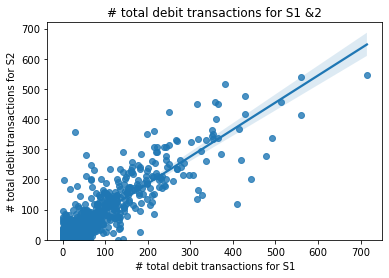

In [ ]:
sns.regplot(x="# total debit transactions for S1",y="# total debit transactions for S2",data=data)
plt.ylim(0,)
plt.title("# total debit transactions for S1 &2")
plt.show()

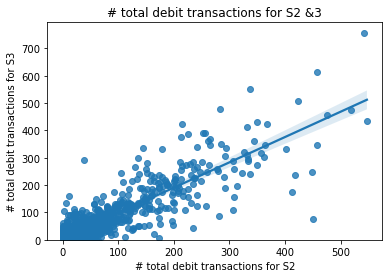

In [ ]:
sns.regplot(x="# total debit transactions for S2",y="# total debit transactions for S3",data=data)
plt.ylim(0,)
plt.title("# total debit transactions for S2 &3")
plt.show()

<AxesSubplot:xlabel='Status', ylabel='# total debit transactions for S2'>

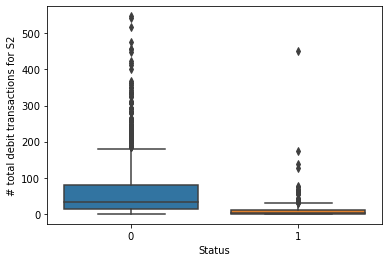

In [ ]:
sns.boxplot(x="Status",y="# total debit transactions for S2",data=dff)

<AxesSubplot:xlabel='total debit transactions', ylabel='total transactions'>

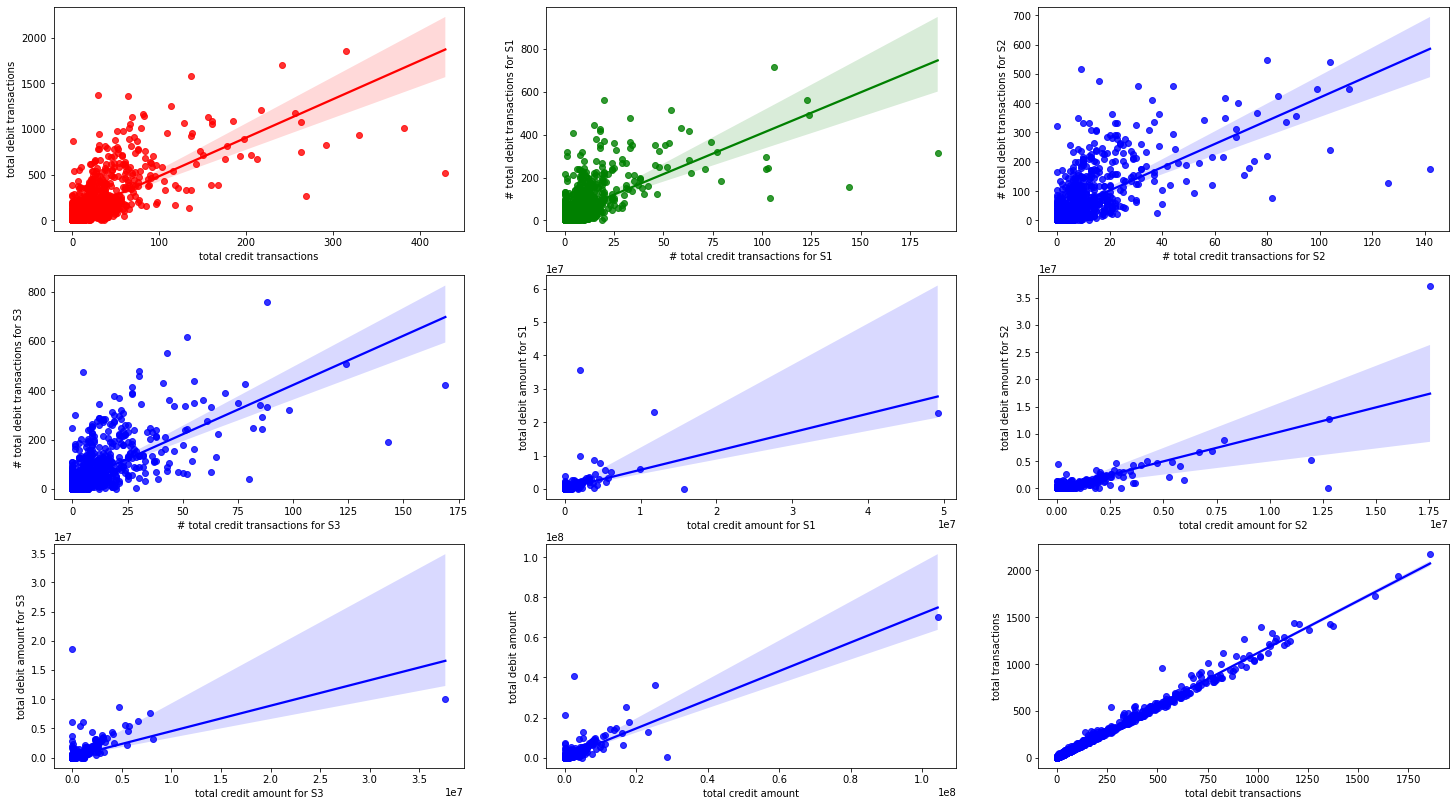

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(25,14))
sns.regplot(y='total debit transactions',x='total credit transactions',data=dff,color='red',ax=axes[0,0])
sns.regplot(y='# total debit transactions for S1',x='# total credit transactions for S1',data=dff,color='green',ax=axes[0,1])
sns.regplot(y='# total debit transactions for S2',x='# total credit transactions for S2',data=dff,color='blue',ax=axes[0,2])
sns.regplot(y='# total debit transactions for S3',x='# total credit transactions for S3',data=dff,color='blue',ax=axes[1,0])
sns.regplot(y='total debit amount for S1',x='total credit amount for S1',data=dff,color='blue',ax=axes[1,1])
sns.regplot(y='total debit amount for S2',x='total credit amount for S2',data=dff,color='blue',ax=axes[1,2])
sns.regplot(y='total debit amount for S3',x='total credit amount for S3',data=dff,color='blue',ax=axes[2,0])
sns.regplot(y='total debit amount',x='total credit amount',data=dff,color='blue',ax=axes[2,1])
sns.regplot(y='total transactions',x='total debit transactions',data=dff,color='blue',ax=axes[2,2])

<AxesSubplot:xlabel='CUS_Month_Income', ylabel='total transactions'>

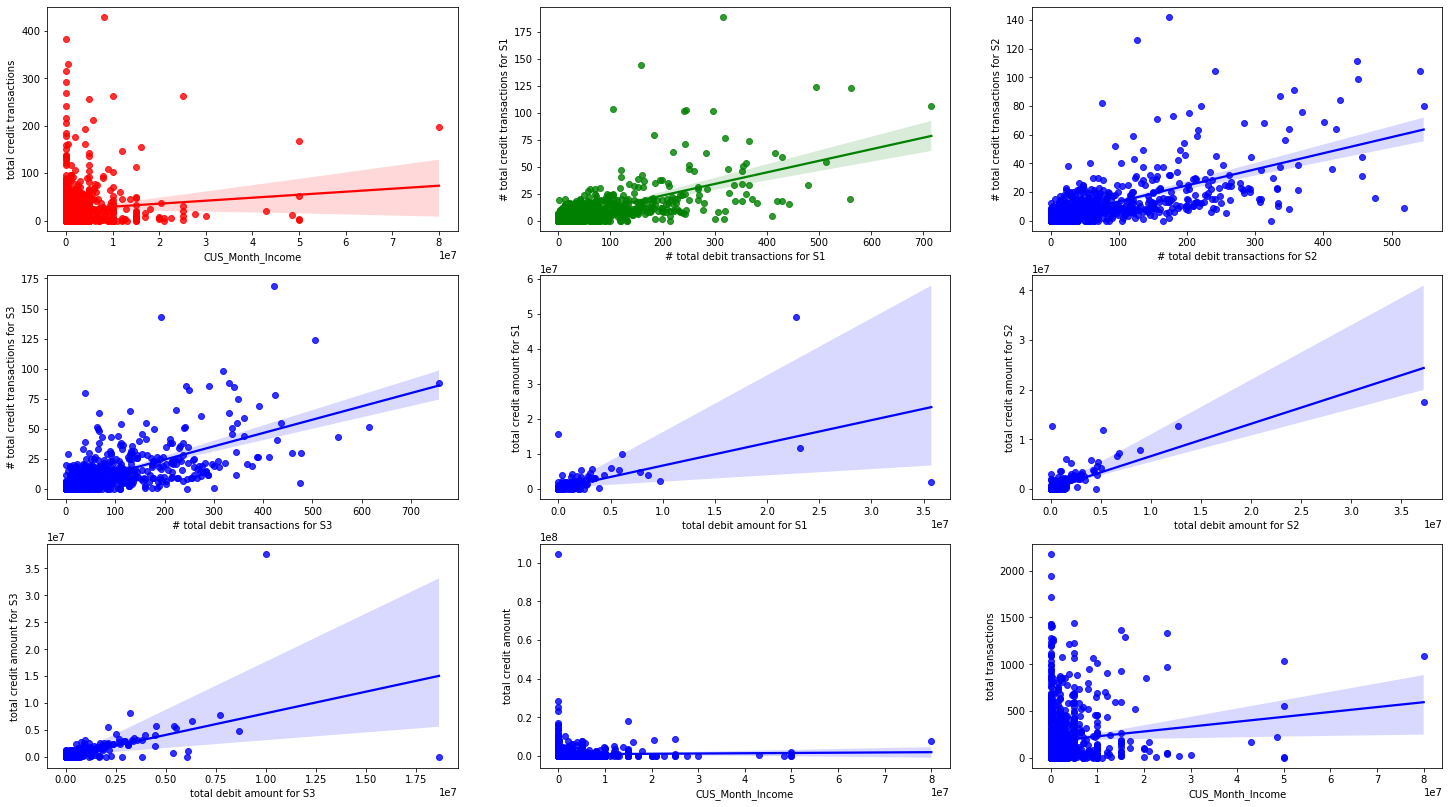

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(25,14))
sns.regplot(y='total credit transactions',x='CUS_Month_Income',data=dff,color='red',ax=axes[0,0])
sns.regplot(y='# total credit transactions for S1',x='# total debit transactions for S1',data=dff,color='green',ax=axes[0,1])
sns.regplot(y='# total credit transactions for S2',x='# total debit transactions for S2',data=dff,color='blue',ax=axes[0,2])
sns.regplot(y='# total credit transactions for S3',x='# total debit transactions for S3',data=dff,color='blue',ax=axes[1,0])
sns.regplot(y='total credit amount for S1',x='total debit amount for S1',data=dff,color='blue',ax=axes[1,1])
sns.regplot(y='total credit amount for S2',x='total debit amount for S2',data=dff,color='blue',ax=axes[1,2])
sns.regplot(y='total credit amount for S3',x='total debit amount for S3',data=dff,color='blue',ax=axes[2,0])
sns.regplot(y='total credit amount',x='CUS_Month_Income',data=dff,color='blue',ax=axes[2,1])
sns.regplot(y='total transactions',x='CUS_Month_Income',data=dff,color='blue',ax=axes[2,2])

In [ ]:
new_df=dff[['# total debit transactions for S1','# total debit transactions for S2','# total debit transactions for S3', 'total debit amount for S1','total debit amount for S2', 'total debit amount for S3',
'# total credit transactions for S1','# total credit transactions for S2','# total credit transactions for S3', 'total credit amount for S1',
'total credit amount for S2', 'total credit amount for S3','total debit amount', 'total debit transactions', 'total credit amount','total credit transactions', 'total transactions','Status']]

In [ ]:
new_df.columns

Index(['# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'Status'],
      dtype='object')

<AxesSubplot:xlabel='total debit transactions', ylabel='Density'>

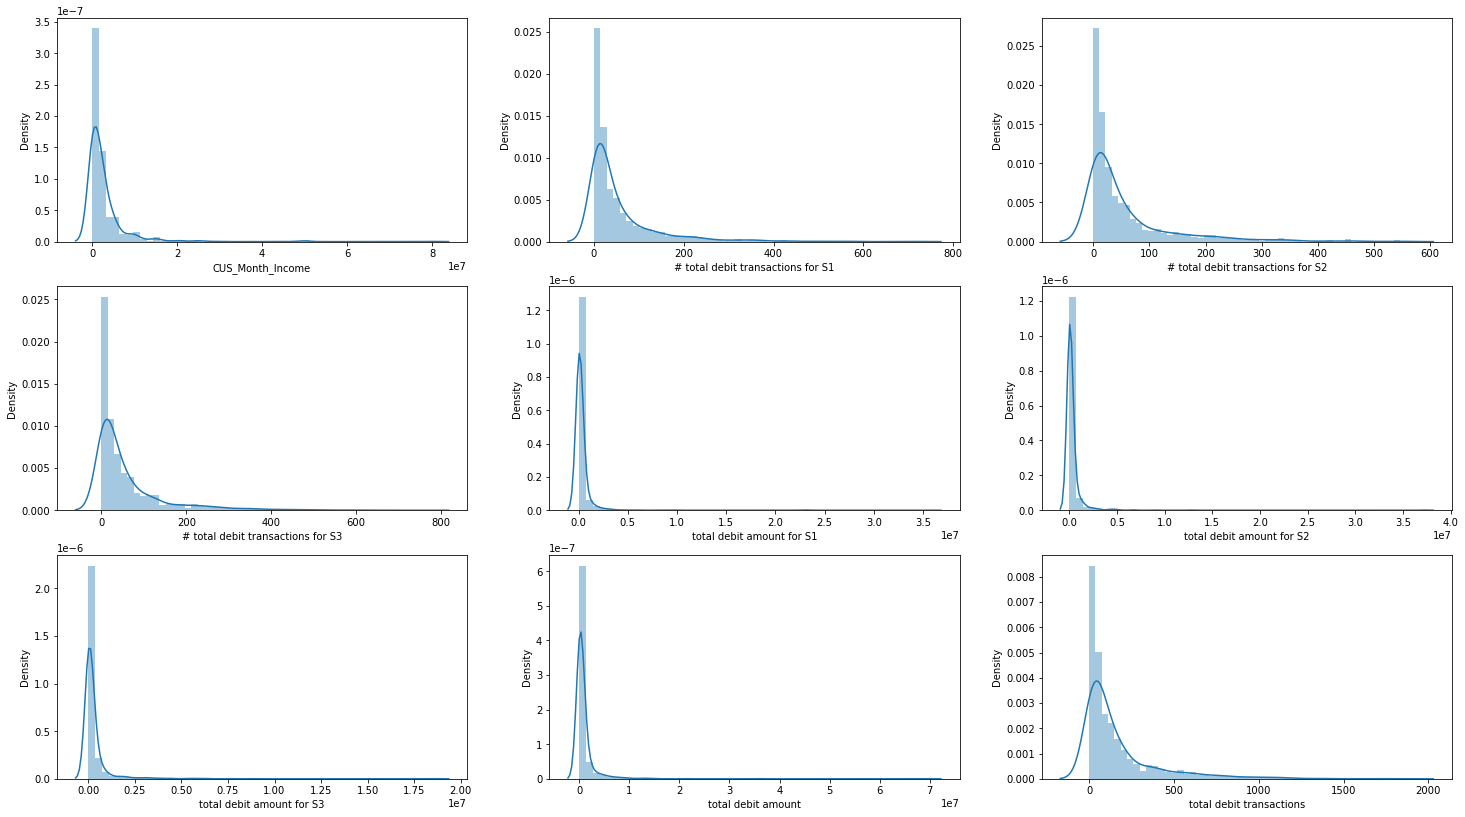

In [ ]:
#plot histogram for every column
fig, axes = plt.subplots(3, 3, figsize=(25,14))
sns.distplot(dff['CUS_Month_Income'],ax=axes[0,0])
sns.distplot(dff['# total debit transactions for S1'],ax=axes[0,1])
sns.distplot(dff['# total debit transactions for S2'],ax=axes[0,2])
sns.distplot(dff['# total debit transactions for S3'],ax=axes[1,0])
sns.distplot(dff['total debit amount for S1'],ax=axes[1,1])
sns.distplot(dff['total debit amount for S2'],ax=axes[1,2])
sns.distplot(dff['total debit amount for S3'],ax=axes[2,0])
sns.distplot(dff['total debit amount'],ax=axes[2,1])
sns.distplot(dff['total debit transactions'],ax=axes[2,2])

<AxesSubplot:xlabel='total credit transactions', ylabel='Density'>

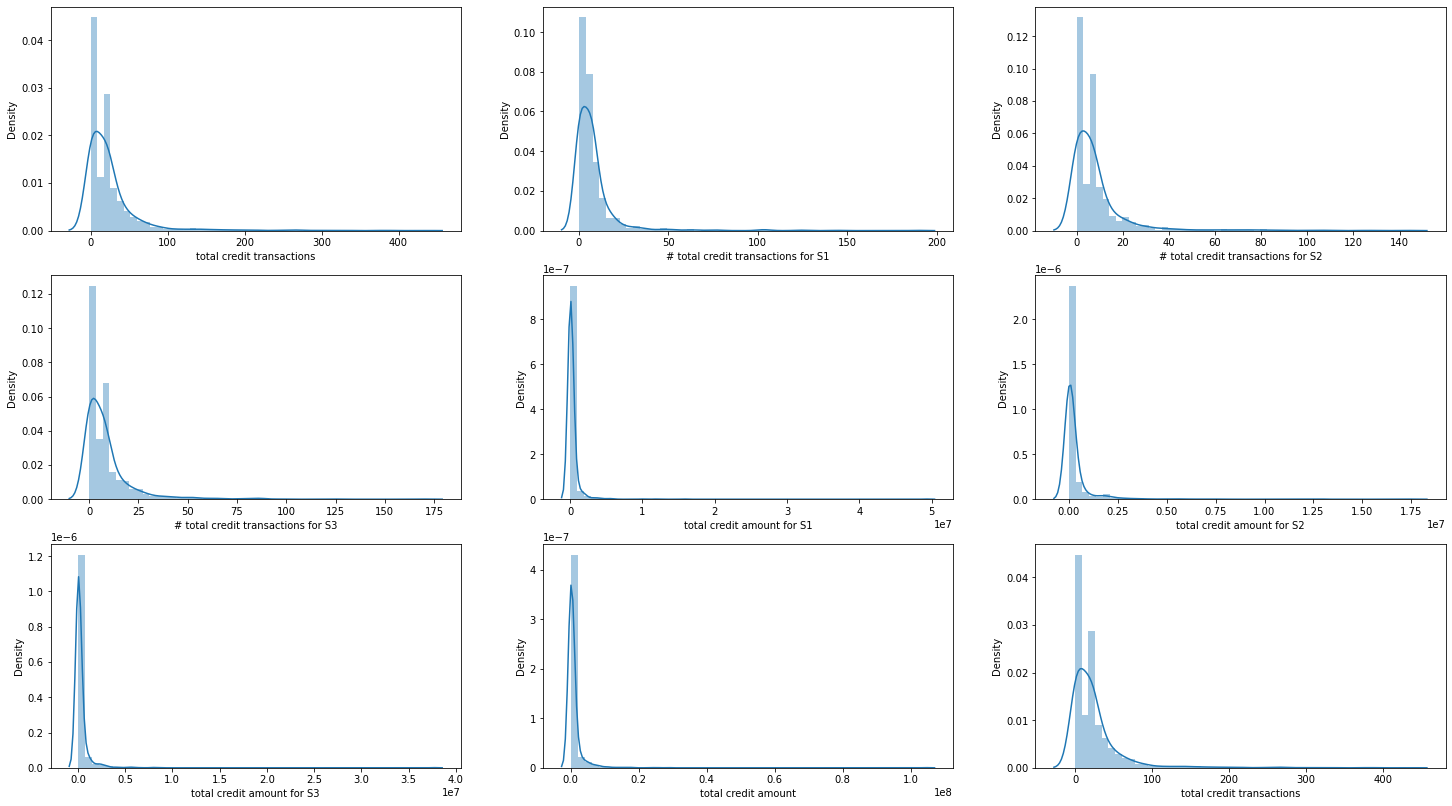

In [ ]:
#plot histogram for every column
fig, axes = plt.subplots(3, 3, figsize=(25,14))
sns.distplot(dff['total credit transactions'],ax=axes[0,0])
sns.distplot(dff['# total credit transactions for S1'],ax=axes[0,1])
sns.distplot(dff['# total credit transactions for S2'],ax=axes[0,2])
sns.distplot(dff['# total credit transactions for S3'],ax=axes[1,0])
sns.distplot(dff['total credit amount for S1'],ax=axes[1,1])
sns.distplot(dff['total credit amount for S2'],ax=axes[1,2])
sns.distplot(dff['total credit amount for S3'],ax=axes[2,0])
sns.distplot(dff['total credit amount'],ax=axes[2,1])
sns.distplot(dff['total credit transactions'],ax=axes[2,2])

<AxesSubplot:xlabel='total transactions', ylabel='Density'>

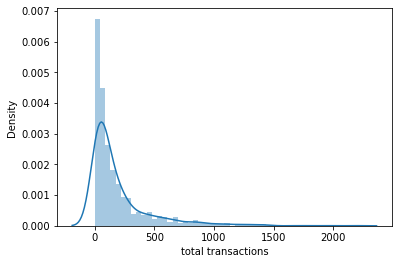

In [ ]:
sns.distplot(dff['total transactions'])

In [ ]:
#seems like all the columns +ve Skewness make it normal distribution # sklearn.linear_model.RidgeClassifier
#create a function for skewness
#import skewness
def skewness(new_df):
    skewness_list = []
    for col in new_df.columns:
        skewness_list.append(new_df[col].skew())
    return skewness_list

In [ ]:
skewness(new_df)
#with column names
#skewness(new_df.rename(columns={'CUS_Month_Income':'CUS_Month_Income','# total debit transactions for S1':'# total debit transactions for S1','# total debit transactions for S2':'# total debit transactions for S2','# total debit transactions for S3':'# total debit transactions for S3','total debit amount for S1':'total debit amount for S1','total debit amount for S2':'total debit amount for S2','total debit amount for S3':'total debit amount for S3','total debit amount':'total debit amount','total debit transactions':'total debit transactions','total credit transactions':'total credit transactions','# total credit transactions for S1':'# total credit transactions for S1','# total credit transactions for S2':'# total credit transactions for S2','# total credit transactions for S3':'# total credit transactions for S3','total credit amount for S1':'total credit amount for S1','total credit amount for S2':'total credit amount for S2','total credit amount for S3':'total credit amount for S3','total credit amount':'total credit amount','total credit transactions':'total credit transactions'}))

[2.9392922586693984,
 2.54471880261769,
 2.815952435596654,
 16.29616380121377,
 20.18750781649729,
 9.573946167680988,
 6.144898956638864,
 4.411057047804638,
 4.479343934304058,
 22.980121519799805,
 8.947779897201158,
 21.175667118282888,
 12.574292253890004,
 2.6417023666156014,
 19.09595929515135,
 4.618275637716399,
 2.6877306499814586,
 1.6525355483600805]

In [ ]:
df['AGE'] = df['AGE']
surv_status_df = pd.crosstab(index=dff["Status"], 
                           columns=dff["AGE"])
surv_status_df

AGE     14.0   15.0   16.0   17.0   18.0   19.0   20.0   21.0   22.0   23.0   \
Status                                                                         
0           4      1      7      5      6      1      2      2      2      2   
1           1      0      1      0      2      0      2      0      5      1   

AGE     ...  76.0   77.0   79.0   81.0   82.0   83.0   86.0   87.0   89.0   \
Status  ...                                                                  
0       ...      1      3      1      1      1      1      1      1      0   
1       ...      2      0      0      0      0      0      0      0      1   

AGE     119.0  
Status         
0           0  
1           2  

[2 rows x 72 columns]

{'ACTIVE': 0,'CHURN': 1}

# create plot
fig, ax = plt.subplots()
index = dff['AGE'].unique()
#index = index.astype(int)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, 1, bar_width,
                 alpha=opacity,
                 color='b',
                 label='CHURN')
 
rects2 = plt.bar(index + bar_width, 1, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Survived')
 
plt.xlabel('Year')
plt.ylabel('count')
plt.title('CHURN by Year')
 
plt.tight_layout()
plt.show()

active_dff = dff[dff['Status'] == '0']
churn_dff = dff[dff['Status'] == '1']
data = [dff, active_dff, churn_dff]
for d in data:
    plt.close();
    sns.set_style('whitegrid')
    sns.FacetGrid(d, hue='Status', size= 6)\
    .map(sns.distplot, '# total debit transactions for S1')\
    .add_legend()
    plt.show()

active_dff = dff[dff['Status'] == '0']
churn_dff = dff[dff['Status'] == '1']
data = [dff, active_dff, churn_dff]
for d in data:
    plt.close();
    sns.set_style('whitegrid')
    sns.FacetGrid(d, hue='Status', size= 6)\
    .map(sns.distplot, '# total debit transactions for S2')\
    .add_legend()
    plt.show()

sns.distplot(dff['# total debit transactions for S2'])

In [ ]:
#make Normalized new_df
new_df_norm = (new_df - new_df.min()) / (new_df.max() - new_df.min())
new_df_norm

# total debit transactions for S1  # total debit transactions for S2  \
0                              0.387413                           0.484461   
1                              0.051748                           0.027422   
2                              0.043357                           0.025594   
3                              0.000000                           0.001828   
4                              0.020979                           0.060329   
...                                 ...                                ...   
1244                           0.018182                           0.021938   
1245                           0.076923                           0.063985   
1246                           0.580420                           0.672761   
1247                           0.205594                           0.369287   
1248                           0.106294                           0.160878   

      # total debit transactions for S3  total debit amount for S1  \
0                              0.455746                   0.040834   
1                              0.059445                   0.000990   
2                              0.010568                   0.000791   
3                              0.000000                   0.000000   
4                              0.015852                   0.001933   
...                                 ...                        ...   
1244                           0.001321                   0.000086   
1245                           0.048877                   0.003339   
1246                           0.560106                   0.029907   
1247                           0.309115                   0.011127   
1248                           0.091149                   0.001672   

      total debit amount for S2  total debit amount for S3  \
0                      0.033049                   0.110829   
1                      0.000541                   0.004493   
2                      0.000128                   0.000233   
3                      0.000107                   0.000000   
4                      0.005989                   0.002485   
...                         ...                        ...   
1244                   0.000064                   0.000011   
1245                   0.003193                   0.007905   
1246                   0.015357                   0.044635   
1247                   0.013820                   0.024627   
1248                   0.011283                   0.015108   

      # total credit transactions for S1  # total credit transactions for S2  \
0                               0.052910                            0.169014   
1                               0.010582                            0.028169   
2                               0.074074                            0.056338   
3                               0.026455                            0.028169   
4                               0.042328                            0.049296   
...                                  ...                                 ...   
1244                            0.000000                            0.000000   
1245                            0.037037                            0.042254   
1246                            0.333333                            0.535211   
1247                            0.058201                            0.098592   
1248                            0.021164                            0.098592   

      # total credit transactions for S3  total credit amount for S1  \
0                               0.183432                    0.030829   
1                               0.023669                    0.000203   
2                               0.029586                    0.014421   
3                               0.017751                    0.000612   
4                               0.035503                    0.003975   
...                                  ...                         ...   
1244              

In [ ]:
skewness(new_df_norm)

[2.939292258669399,
 2.5447188026176892,
 2.815952435596655,
 16.296163801213773,
 20.187507816497295,
 9.573946167680988,
 6.144898956638864,
 4.411057047804637,
 4.479343934304056,
 22.980121519799813,
 8.94777989720116,
 21.17566711828288,
 12.574292253890002,
 2.641702366615602,
 19.095959295151346,
 4.618275637716399,
 2.6877306499814586,
 1.6525355483600805]

In [ ]:
new_df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   # total debit transactions for S1   1249 non-null   float64
 1   # total debit transactions for S2   1249 non-null   float64
 2   # total debit transactions for S3   1249 non-null   float64
 3   total debit amount for S1           1249 non-null   float64
 4   total debit amount for S2           1249 non-null   float64
 5   total debit amount for S3           1249 non-null   float64
 6   # total credit transactions for S1  1249 non-null   float64
 7   # total credit transactions for S2  1249 non-null   float64
 8   # total credit transactions for S3  1249 non-null   float64
 9   total credit amount for S1          1249 non-null   float64
 10  total credit amount for S2          1249 non-null   float64
 11  total credit amount for S3          1249 no

<AxesSubplot:xlabel='total credit transactions', ylabel='Density'>

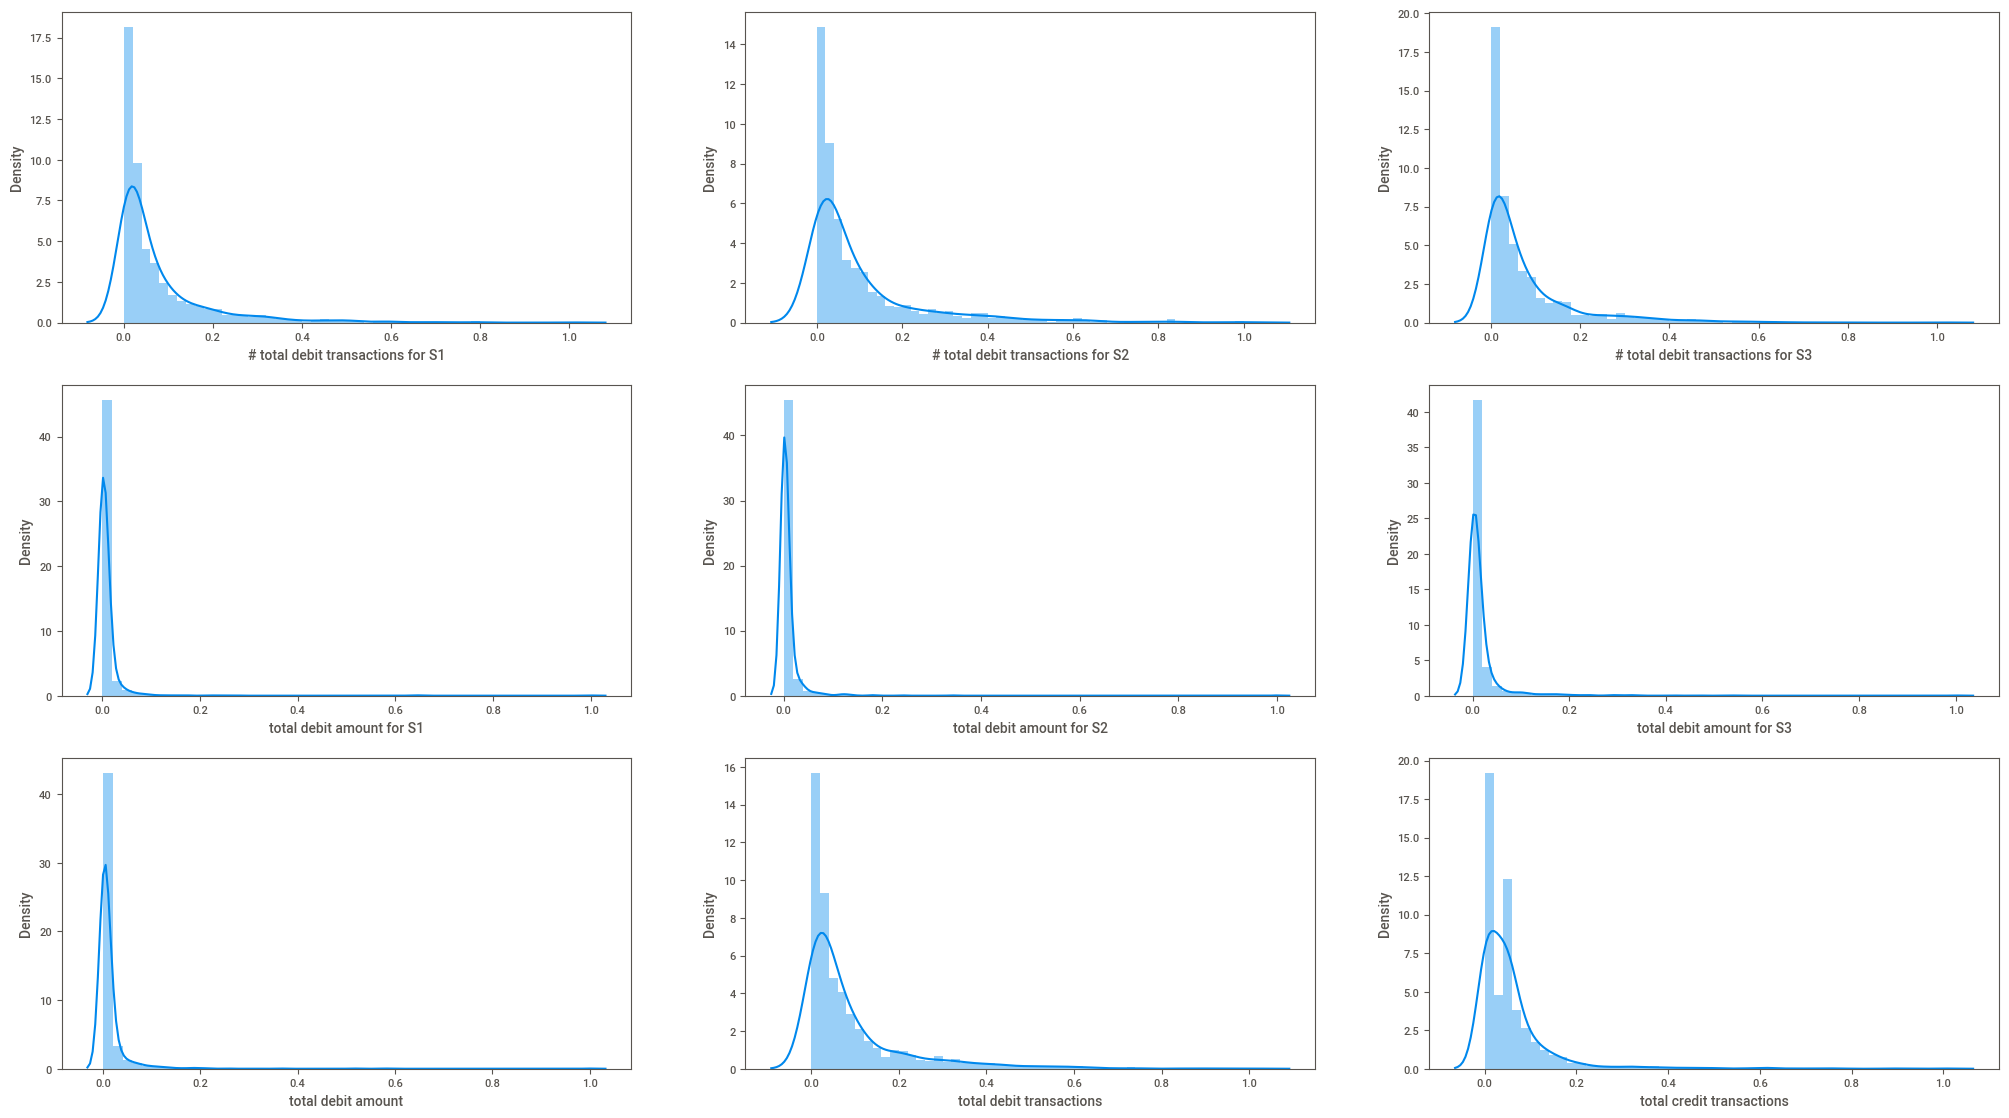

In [ ]:
#plot distplot for new_df_norm
#new_df_norm['# total debit transactions for S1'].plot(kind='line', figsize=(20,10))
#plot all the columns
fig, axes = plt.subplots(3, 3, figsize=(25,14))
sns.distplot(new_df_norm['# total debit transactions for S1'],ax=axes[0,0])
sns.distplot(new_df_norm['# total debit transactions for S2'],ax=axes[0,1])
sns.distplot(new_df_norm['# total debit transactions for S3'],ax=axes[0,2])
sns.distplot(new_df_norm['total debit amount for S1'],ax=axes[1,0])
sns.distplot(new_df_norm['total debit amount for S2'],ax=axes[1,1])
sns.distplot(new_df_norm['total debit amount for S3'],ax=axes[1,2])
sns.distplot(new_df_norm['total debit amount'],ax=axes[2,0])
sns.distplot(new_df_norm['total debit transactions'],ax=axes[2,1])
sns.distplot(new_df_norm['total credit transactions'],ax=axes[2,2])


<AxesSubplot:xlabel='total credit transactions', ylabel='Density'>

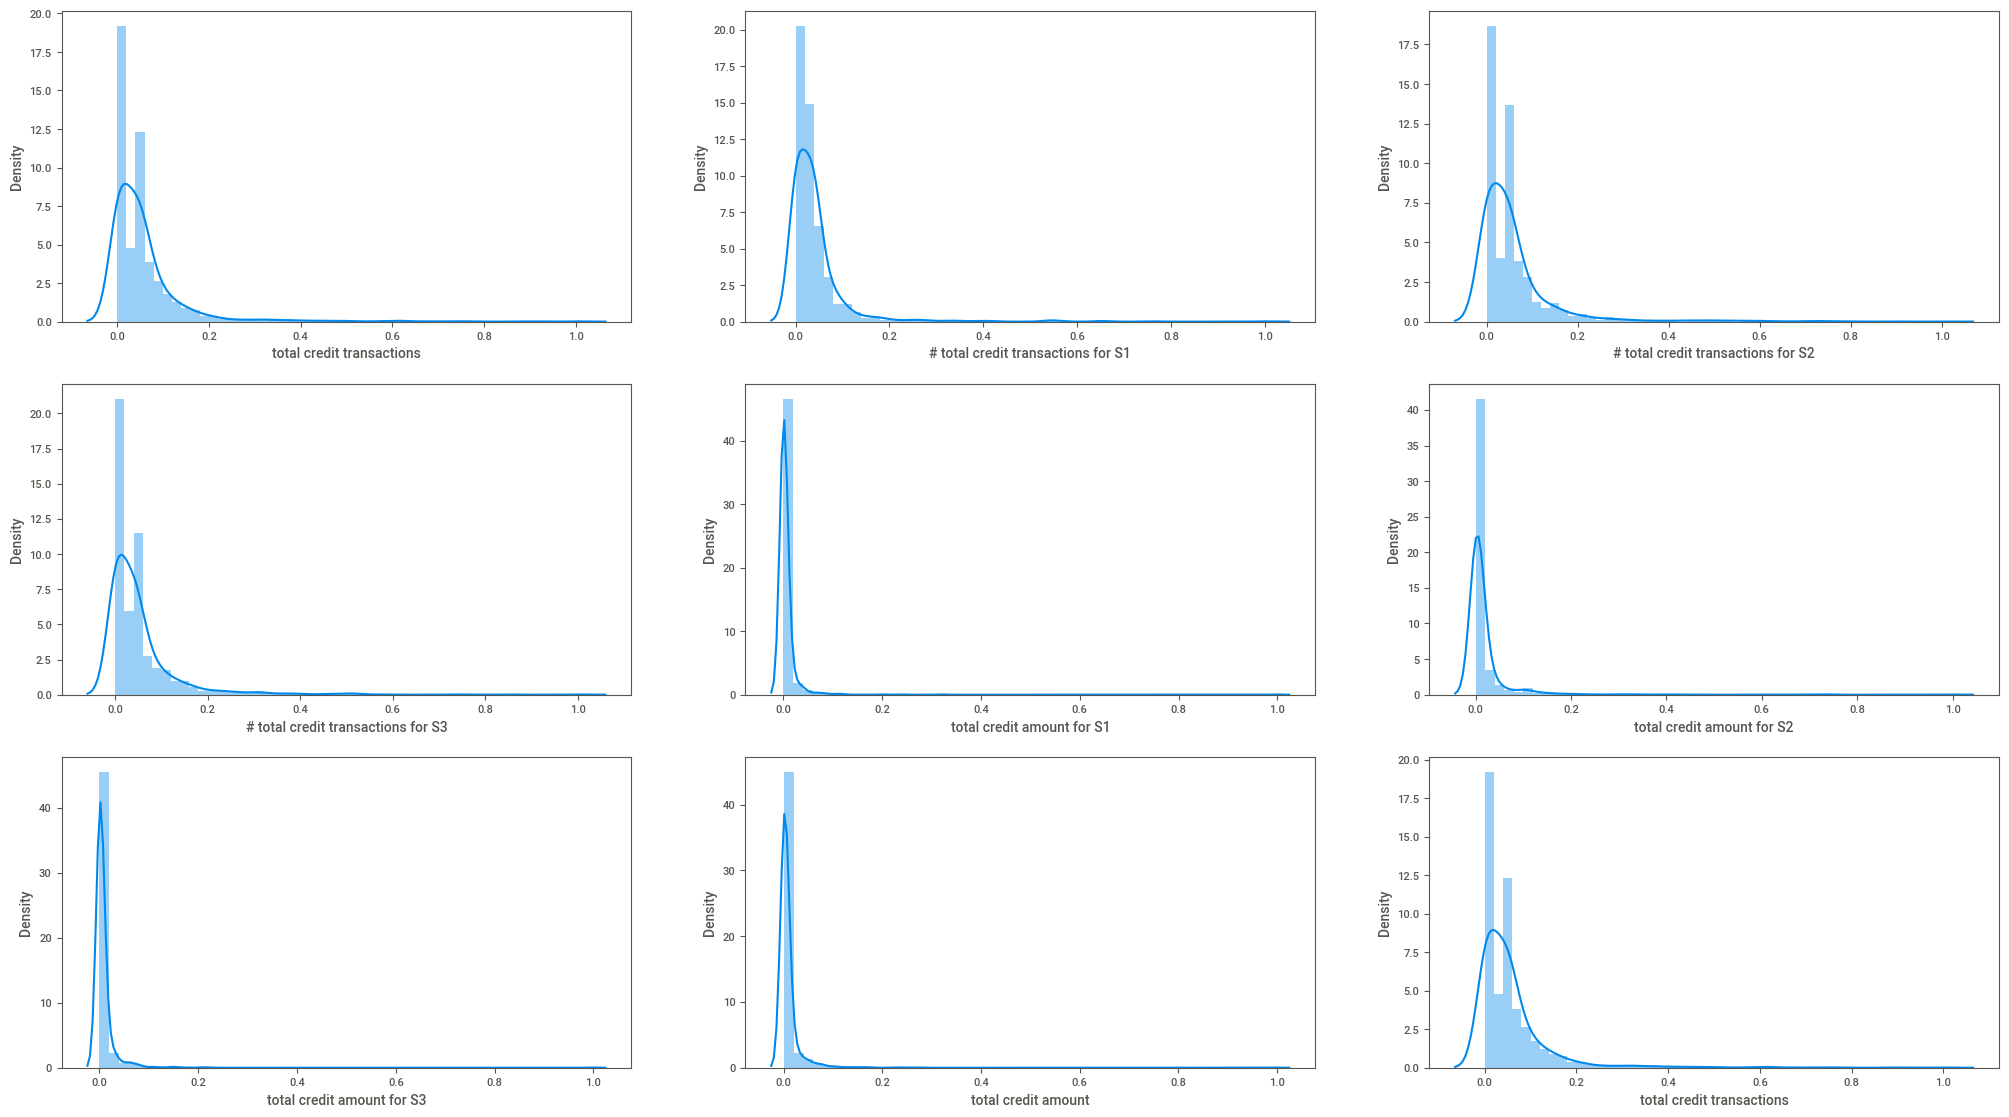

In [ ]:
#apply for remaining columns
fig, axes = plt.subplots(3, 3, figsize=(25,14))
sns.distplot(new_df_norm['total credit transactions'],ax=axes[0,0])
sns.distplot(new_df_norm['# total credit transactions for S1'],ax=axes[0,1])
sns.distplot(new_df_norm['# total credit transactions for S2'],ax=axes[0,2])
sns.distplot(new_df_norm['# total credit transactions for S3'],ax=axes[1,0])
sns.distplot(new_df_norm['total credit amount for S1'],ax=axes[1,1])
sns.distplot(new_df_norm['total credit amount for S2'],ax=axes[1,2])
sns.distplot(new_df_norm['total credit amount for S3'],ax=axes[2,0])
sns.distplot(new_df_norm['total credit amount'],ax=axes[2,1])
sns.distplot(new_df_norm['total credit transactions'],ax=axes[2,2])


In [ ]:
#apply anova test to find the significant variables

In [ ]:
#apply hypothesis testing
from scipy import stats
pearson_coef,p_value = stats.pearsonr(new_df['# total debit transactions for S1'],new_df['Status'])
print("corvalue",pearson_coef,"p_value",p_value)#<0.0.5 reject null accept alternetive

corvalue -0.2277763358221332 p_value 3.6640218346941213e-16


In [ ]:
#make a function to check p value and pearson coefficent
def check_p_value(x,y):
    pearson_coef,p_value = stats.pearsonr(x,y)
    print("corvalue",pearson_coef,"p_value",p_value)
    if p_value < 0.05:
        return True
    else:
        return False
        

from pandas_profiling import ProfileReport
profile = ProfileReport(new_df,title='Data Profiling Report')
#apply profile report
profile.to_file("profile_report.html")

import sweetviz as sv
analyze_report=sv.analyze(df)
analyze_report("analyze_report.html",title="Analyze Report",open_browser=True)

import autoviz as av
from autoviz.AutoViz_class import AutoViz_class
AV= AutoViz_class()
AV.analyze(df)

In [ ]:
#download new_df to csv
new_df.to_csv('new_df.csv')

In [ ]:
#create a function for anova test
def anova_test(x,y):
    F, p = stats.f_oneway(x, y)
    print("F-value:",F,"P-value:",p)
    if p < 0.05:
        return True
    else:
        return False


In [ ]:
#import 2 proportional test
from scipy import stats
def two_proportional_test(x,y):
    F, p = stats.fisher_exact([[x,y],[dff['Status'].count()-x,dff['Status'].count()-y]])
    print("F-value:",F,"P-value:",p)
    if p < 0.05:
        return True
    else:
        return False

In [ ]:
#apply the function on every column
anova_test(dff['# total debit transactions for S2'],dff['Status']),anova_test(dff['# total debit transactions for S3'],dff['Status'])

F-value: 586.0487173706471 P-value: 1.7886767639596204e-116
F-value: 562.0384485326354 P-value: 3.1534807301539143e-112


(True, True)

In [ ]:
anova_test(dff['# total credit transactions for S1'],dff['Status']),anova_test(dff['# total credit transactions for S2'],dff['Status']),anova_test(dff['# total credit transactions for S3'],dff['Status'])

F-value: 375.7728695748037 P-value: 4.301959137568644e-78
F-value: 438.5896771228441 P-value: 7.535896085894503e-90
F-value: 453.72071755858985 P-value: 1.2119786712665296e-92


(True, True, True)

In [ ]:
anova_test(dff['total credit amount for S1'],dff['Status']),anova_test(dff['total credit amount for S2'],dff['Status']),anova_test(dff['total credit amount for S3'],dff['Status'])

F-value: 44.7938861939443 P-value: 2.6935907770189563e-11
F-value: 114.4554488593078 P-value: 3.7836815025443253e-26
F-value: 70.2215180254209 P-value: 8.726894592320533e-17


(True, True, True)

In [ ]:
anova_test(dff['total debit amount'],dff['Status']),anova_test(dff['total credit amount'],dff['Status'])
'''#0.0000000000000000000000004468004567198755  
#= 4.468004567198755 × 10-25
scientific notation

= 4.468004567198755e-25
scientific e notatio= 4.468004567198755 × 10-25
scientific notation

= 4.468004567198755e-25
scientific e notatio'''

F-value: 109.3413249564736 P-value: 4.468004567198755e-25
F-value: 79.24366642439239 P-value: 1.0324089186816894e-18


'#0.0000000000000000000000004468004567198755  \n#= 4.468004567198755 × 10-25\nscientific notation\n\n= 4.468004567198755e-25\nscientific e notatio= 4.468004567198755 × 10-25\nscientific notation\n\n= 4.468004567198755e-25\nscientific e notatio'

In [ ]:
anova_test(dff['total debit transactions'],dff['Status']),anova_test(dff['total credit transactions'],dff['Status'])

F-value: 626.6364889527968 P-value: 1.4119831400848417e-123
F-value: 501.57166891764876 P-value: 2.205152372006595e-101


(True, True)

In [ ]:
 """  '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions','Status'  """

In [ ]:
new_df=dff[['# total debit transactions for S1','# total debit transactions for S2','# total debit transactions for S3', 'total debit amount for S1','total debit amount for S2', 'total debit amount for S3',
'# total credit transactions for S1','# total credit transactions for S2','# total credit transactions for S3', 'total credit amount for S1',
'total credit amount for S2', 'total credit amount for S3','total debit amount', 'total debit transactions', 'total credit amount','total credit transactions', 'total transactions','Status']]

<AxesSubplot:>

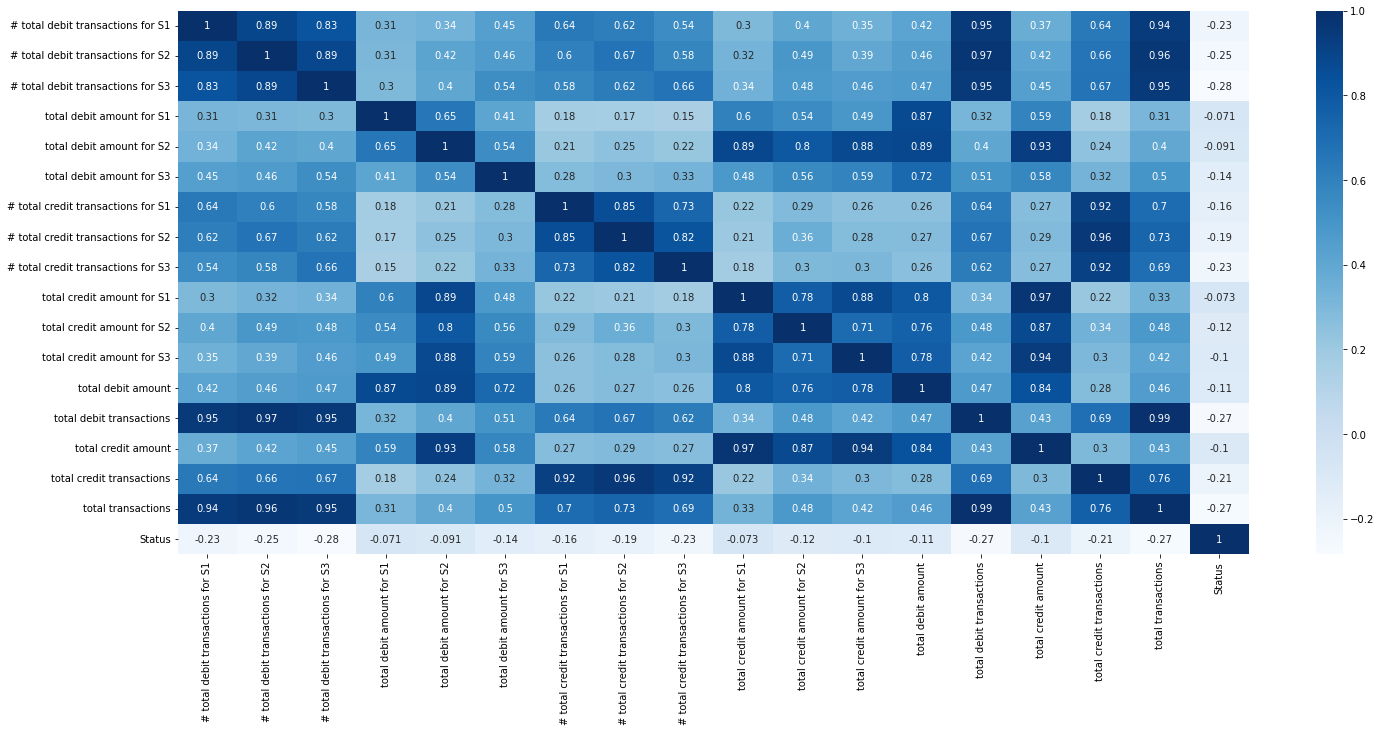

In [ ]:
plt.figure(figsize=(24,10))
sns.heatmap(new_df.corr(),cbar=True,annot=True,cmap='Blues')

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris()
LR_classifier = LogisticRegression(random_state=0)
LR_classifier.fit(X, y)
LR_classifier.predict(X[:3, :]) 
#to predict null value with algo

In [66]:
#import classification model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score, precision_recall_fscore_support

import pandas as pd
df=pd.read_excel("data.xlsx")

In [68]:
df['Status'].value_counts()

0    1022
1     227
Name: Status, dtype: int64

In [69]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [70]:
df.columns
df.drop(['# total debit transactions for S1','# total debit transactions for S2','# total debit transactions for S3',
 '# total credit transactions for S1','# total credit transactions for S2', '# total credit transactions for S3'],axis=1,inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGE                        1249 non-null   int64  
 1   CUS_Month_Income           1249 non-null   float64
 2   YEARS_WITH_US              1249 non-null   int64  
 3   total_debit_amount         1249 non-null   float64
 4   total_debit_transactions   1249 non-null   int64  
 5   total_credit_amount        1249 non-null   float64
 6   total_credit_transactions  1249 non-null   int64  
 7   total_transactions         1249 non-null   int64  
 8   Status                     1249 non-null   int64  
 9   CUS_Gender_MALE            1249 non-null   int64  
 10  CUS_Target                 1249 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 107.5 KB


In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X=df.drop(['Status'],axis=1)
y=df['Status']
model = LogisticRegression()
rfe = RFE(model) 
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)
f = rfe.get_support(1) #the most important features
X = df[df.columns[f]] # final features`

[ True False  True False False False  True  True  True False]
[1 5 1 6 2 4 1 1 1 3]


In [72]:
X=df.drop(['Status'],axis=1)
y=df['Status']
#apply scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [73]:
#apply smote
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_tee,Y_tee=smote.fit_resample(X,y)
from collections import Counter
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(X_tee))
print('Resample dataset shape', Counter(Y_tee))

Original dataset shape Counter({0: 1022, 1: 227})
Resample dataset shape Counter({'AGE': 1, 'CUS_Month_Income': 1, 'YEARS_WITH_US': 1, 'total_debit_amount': 1, 'total_debit_transactions': 1, 'total_credit_amount': 1, 'total_credit_transactions': 1, 'total_transactions': 1, 'CUS_Gender_MALE': 1, 'CUS_Target': 1})
Resample dataset shape Counter({0: 1022, 1: 1022})


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tee,Y_tee,test_size=0.1,random_state=0,stratify=Y_tee,shuffle=True)

In [75]:
df.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1249, 11), (1839, 10), (205, 10), (1839,), (205,))

In [76]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [77]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
#import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor,  DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier, AdaBoostClassifier,AdaBoostRegressor, BaggingClassifier, BaggingRegressor, ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, cross_validate, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LogisticRegression, LinearRegression, SGDClassifier, SGDRegressor, Perceptron, PassiveAggressiveClassifier, PassiveAggressiveRegressor
# import knn 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
#cross_validation 
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold, GridSearchCV, RandomizedSearchCV, learning_curve
#import ensemble
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier,AdaBoostRegressor, BaggingClassifier, BaggingRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#import repeated cross validation
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold

In [78]:
#apply catboost and lightboost
from catboost import CatBoostClassifier
import lightgbm 
from lightgbm import LGBMClassifier
#apply
model=LGBMClassifier(iterations=100,learning_rate=0.1,depth=15,loss_function='Logloss',random_seed=124,class_weights='balanced',n_estimators=100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))

[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: class_weights
0.9365853658536586
Train Accuracy : 0.9956498096791735
Train Confusion Matrix:
[[912   7]
 [  1 919]]
--------------------------------------------------
Test Accuracy : 0.8926829268292683
Test Confusion Matrix:
[[90 13]
 [ 9 93]]
None


0.9367028364743957
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       103
           1       0.92      0.96      0.94       102

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205

0.8994828749826806
0.9158878504672897
0.9607843137254902
0.9377990430622011
(array([0.95918367, 0.91588785]), array([0.91262136, 0.96078431]), array([0.93532338, 0.93779904]), array([103, 102], dtype=int64))
(array([0.49756098, 0.91588785, 1.        ]), array([1.        , 0.96078431, 0.        ]), array([0, 1], dtype=int64))


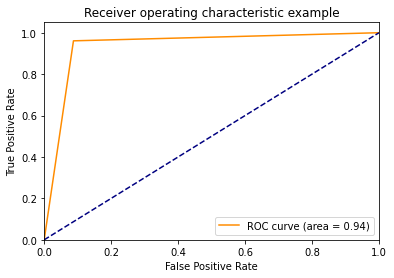

In [80]:
print(roc_auc_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
print(average_precision_score(y_test,y_decsion))
print(precision_score(y_test,y_decsion))
print(recall_score(y_test,y_decsion))
print(f1_score(y_test,y_decsion))
print(precision_recall_fscore_support(y_test,y_decsion))
print(precision_recall_curve(y_test,y_decsion))
#get auc roc curve
from sklearn.metrics import roc_curve, auc
#build
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
#plot
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [82]:
#get score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(average_precision_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_recall_fscore_support(y_test,y_pred))
print(precision_recall_curve(y_test,y_pred))

0.8926829268292683
[[90 13]
 [ 9 93]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       103
           1       0.88      0.91      0.89       102

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205

0.8927755568246716
0.8438469451287188
0.8773584905660378
0.9117647058823529
0.8942307692307693
(array([0.90909091, 0.87735849]), array([0.87378641, 0.91176471]), array([0.89108911, 0.89423077]), array([103, 102], dtype=int64))
(array([0.49756098, 0.87735849, 1.        ]), array([1.        , 0.91176471, 0.        ]), array([0, 1], dtype=int64))


In [83]:
from sklearn.linear_model import LogisticRegression
Logistic=LogisticRegression()
Logistic.fit(X_train,y_train)
y_pred=Logistic.predict(X_test)

In [84]:
#get score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(average_precision_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_recall_fscore_support(y_test,y_pred))
print(precision_recall_curve(y_test,y_pred))

0.8195121951219512
[[73 30]
 [ 7 95]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       103
           1       0.76      0.93      0.84       102

    accuracy                           0.82       205
   macro avg       0.84      0.82      0.82       205
weighted avg       0.84      0.82      0.82       205

0.820055206548639
0.7419894787183167
0.76
0.9313725490196079
0.8370044052863437
(array([0.9125, 0.76  ]), array([0.70873786, 0.93137255]), array([0.79781421, 0.83700441]), array([103, 102], dtype=int64))
(array([0.49756098, 0.76      , 1.        ]), array([1.        , 0.93137255, 0.        ]), array([0, 1], dtype=int64))


In [ ]:
#Due to  0 active sample is more 
#let's balanced

In [ ]:
!pip install imblearn

https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

In [ ]:
#apply catboost and lightboost
from catboost import CatBoostClassifier
import lightgbm 
from lightgbm import LGBMClassifier
#apply
model=LGBMClassifier(iterations=100,learning_rate=0.1,loss_function='Logloss',random_seed=124,class_weights='balanced',n_estimators=100,random_state=00)
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
#import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor,  DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier, AdaBoostClassifier,AdaBoostRegressor, BaggingClassifier, BaggingRegressor, ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, cross_validate, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LogisticRegression, LinearRegression, SGDClassifier, SGDRegressor, Perceptron, PassiveAggressiveClassifier, PassiveAggressiveRegressor
# import knn 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
#cross_validation 
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold, GridSearchCV, RandomizedSearchCV, learning_curve
#import ensemble
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier,AdaBoostRegressor, BaggingClassifier, BaggingRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#import repeated cross validation
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold

In [85]:
Logistic=LogisticRegression()
Logistic.fit(X_train,y_train)
y_pred=Logistic.predict(X_test)

In [86]:
#get score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(average_precision_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_recall_fscore_support(y_test,y_pred))
print(precision_recall_curve(y_test,y_pred))

0.8195121951219512
[[73 30]
 [ 7 95]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       103
           1       0.76      0.93      0.84       102

    accuracy                           0.82       205
   macro avg       0.84      0.82      0.82       205
weighted avg       0.84      0.82      0.82       205

0.820055206548639
0.7419894787183167
0.76
0.9313725490196079
0.8370044052863437
(array([0.9125, 0.76  ]), array([0.70873786, 0.93137255]), array([0.79781421, 0.83700441]), array([103, 102], dtype=int64))
(array([0.49756098, 0.76      , 1.        ]), array([1.        , 0.93137255, 0.        ]), array([0, 1], dtype=int64))


In [76]:
# apply logistic with cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate

In [79]:
# prepare the cross-validation procedure
from sklearn.model_selection import KFold
cv = KFold(n_splits=100, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_tee, Y_tee, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
#import mean and standard deviation
print('Accuracy: %.3f +/- %.3f' % (scores.mean(), scores.std()))
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.700 +/- 0.110


In [82]:
pred=cross_val_predict(model,X_tee,Y_tee,cv=cv)
pred
#get score
print(accuracy_score(Y_tee,pred))
print(confusion_matrix(Y_tee,pred))
print(classification_report(Y_tee,pred))
print(roc_auc_score(Y_tee,pred))

0.6996086105675147
[[802 220]
 [394 628]]
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1022
           1       0.74      0.61      0.67      1022

    accuracy                           0.70      2044
   macro avg       0.71      0.70      0.70      2044
weighted avg       0.71      0.70      0.70      2044

0.6996086105675146


In [ ]:
#get accuracy_score
print(accuracy_score(y_ros,pred))
#get confusion matrix,classification report,roc_auc_score,average_precision_score,precision_score,recall_score,f1_score,precision_recall_fscore_support,precision_recall_curve
print(confusion_matrix(y_ros,pred))
print(classification_report(y_ros,pred))
print(roc_auc_score(y_ros,pred))
print(average_precision_score(y_ros,pred))
print(precision_score(y_ros,pred))
print(recall_score(y_ros,pred))
print(f1_score(y_ros,pred))
print(precision_recall_fscore_support(y_ros,pred))
print(precision_recall_curve(y_ros,pred))

In [ ]:
#get fetaure selction with rfe score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [90]:
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
cv = RepeatedKFold(n_splits=100, random_state=1)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_tee, Y_tee, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
#import mean and standard deviation
print('Accuracy: %.3f +/- %.3f' % (scores.mean(), scores.std()))
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.753 +/- 0.104


In [94]:
#use Stratified K-Fold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

cv = StratifiedKFold(random_state=1, shuffle=True)
# create model
model = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=5, min_samples_leaf=1, min_samples_split=2, max_features='auto',  random_state=1, n_jobs=-1)
# evaluate model
scores = cross_val_score(model, X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
#import mean and standard deviation
print('Accuracy: %.3f +/- %.3f' % (scores.mean(), scores.std()))
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.812 +/- 0.011


In [96]:
valid=cross_val_predict(model,X_test,y_test,cv=cv)
valid

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [98]:
#get score
print(accuracy_score(y_test,valid))
print(confusion_matrix(y_test,valid))
print(classification_report(y_test,valid))

0.8097560975609757
[[77 26]
 [13 89]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       103
           1       0.77      0.87      0.82       102

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205



In [ ]:
X.shape,y.shape

((1249, 18), (1249,))

In [ ]:
# import library
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(x_smote))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 1022, 1: 227})
Resample dataset shape Counter({'Unnamed: 0': 1, '# total debit transactions for S1': 1, '# total debit transactions for S2': 1, '# total debit transactions for S3': 1, 'total debit amount for S1': 1, 'total debit amount for S2': 1, 'total debit amount for S3': 1, '# total credit transactions for S1': 1, '# total credit transactions for S2': 1, '# total credit transactions for S3': 1, 'total credit amount for S1': 1, 'total credit amount for S2': 1, 'total credit amount for S3': 1, 'total debit amount': 1, 'total debit transactions': 1, 'total credit amount': 1, 'total credit transactions': 1, 'total transactions': 1})
Resample dataset shape Counter({0: 1022, 1: 1022})


In [ ]:
#balanced Status column with oversampling
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=22)
#get shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1635, 18), (409, 18), (1635,), (409,))

In [ ]:
X_train.drop(['Unnamed: 0'],axis=1,inplace=True)
X_test.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1635, 17), (409, 17), (1635,), (409,))

In [ ]:
# prepare the cross-validation procedure
from sklearn.model_selection import KFold
cv = KFold(n_splits=100, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, x_smote, y_smote, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
#import mean and standard deviation
print('Accuracy: %.3f +/- %.3f' % (scores.mean(), scores.std()))
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.767 +/- 0.100


In [ ]:
#get scores
pred=cross_val_predict(model,X_train,y_train,cv=cv)
pred

In [ ]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


0.7666340508806262
[[717 305]
 [172 850]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1022
           1       0.74      0.83      0.78      1022

    accuracy                           0.77      2044
   macro avg       0.77      0.77      0.77      2044
weighted avg       0.77      0.77      0.77      2044



In [ ]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

In [ ]:
from sklearn.model_selection import GridSearchCV
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)

In [ ]:
y_pred = logModel_grid.predict(X_test)
print(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[178  30]
 [ 17 184]] : is the confusion matrix 

0.8850855745721271 : is the accuracy score
0.8598130841121495 : is the precision score
0.9154228855721394 : is the recall score
0.8867469879518074 : is the f1 score


In [ ]:
model = LogisticRegression()#max_iter=1000, solver='newton-cg', class_weight='balanced'
# define evaluation
#import repeatedStratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']

In [ ]:
# define search
#import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)


In [ ]:

# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_) #86%

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=500. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py",

Best Score: 0.8676891615541924
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1'}


In [ ]:
#get shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape,X.shape,y.shape

((1635, 17), (409, 17), (1635,), (409,), (1249, 17), (1249,))

In [ ]:

search.fit(X_train, y_train)
y_pred = search.predict(X_test)
#get score
print(accuracy_score(y_test, y_pred), ": is the accuracy score") #85%


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=500. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py",

0.8581907090464548 : is the accuracy score


In [99]:
#lets apply Descision Tree
from sklearn.tree import DecisionTreeClassifier
Dcsion=DecisionTreeClassifier()
Dcsion.fit(X_train,y_train)
pred=Dcsion.predict(X_test)


In [100]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape,X.shape,y.shape

((1839, 10), (205, 10), (1839,), (205,), (1249, 10), (1249,))

In [101]:
#get score
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred)) #86%

0.8097560975609757
[[86 17]
 [22 80]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       103
           1       0.82      0.78      0.80       102

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205



In [102]:
#apply cross validation with decision tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
#apply
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = DecisionTreeClassifier()
# evaluate model
scores = cross_val_score(model, X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
#import mean and standard deviation
print('Accuracy: %.3f +/- %.3f' % (scores.mean(), scores.std()))
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.806 +/- 0.034


In [ ]:
pred=cross_val_predict(model,X_test,y_test,cv=cv)
pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,

In [ ]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.78239608801956
[[164  44]
 [ 45 156]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       208
           1       0.78      0.78      0.78       201

    accuracy                           0.78       409
   macro avg       0.78      0.78      0.78       409
weighted avg       0.78      0.78      0.78       409



In [ ]:
new_df.columns

Index(['Unnamed: 0', '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'Status'],
      dtype='object')

In [ ]:
new_df=dff[['# total debit transactions for S1','# total debit transactions for S2','# total debit transactions for S3', 'total debit amount for S1','total debit amount for S2', 'total debit amount for S3',
'# total credit transactions for S1','# total credit transactions for S2','# total credit transactions for S3', 'total credit amount for S1',
'total credit amount for S2', 'total credit amount for S3','total debit amount', 'total debit transactions', 'total credit amount','total credit transactions', 'total transactions','Status']]

In [83]:
#apply with grid search and cross validation
param_grid_dt = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 23, 24, 27, 29, 30],
    'min_samples_split': [2, 3, 20, 21, 22, 23, 24, 25, 26, 27,  30],
    'min_samples_leaf': [1, 2, 3, 4, 24, 25, 26, 27, 28, 29]
}
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=100, random_state=1)

In [89]:
#apply
from sklearn.model_selection import GridSearchCV
dtModel_grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234), param_grid=param_grid_dt, verbose=1, cv=10, n_jobs=-1)
dtModel_grid.fit(X_train, y_train)
print(dtModel_grid.best_estimator_)

Fitting 10 folds for each of 1650 candidates, totalling 16500 fits
DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, random_state=1234)


In [94]:
dtModel_grid = DecisionTreeClassifier(random_state=1234,max_depth=6, min_samples_leaf=2) 
dtModel_grid.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, random_state=1234)

In [95]:
y_decsion=dtModel_grid.predict(X_test)
#get score
print(accuracy_score(y_test,y_decsion))
print(confusion_matrix(y_test,y_decsion))
print(classification_report(y_test,y_decsion)) #85%

0.8195121951219512
[[86 17]
 [20 82]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       103
           1       0.83      0.80      0.82       102

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205



In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1635, 18), (409, 18), (1635,), (409,))

In [ ]:
#apply with random search and cross validation

In [96]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',random_state=33)
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
# Params for classifier
params = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              # "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


In [97]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
 #Classifier Pipeline
pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier())
])    

In [99]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(estimator = pipeline,param_distributions = random_grid,n_iter = 100, cv = cv, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
sorted(pipeline.get_params().keys())

['classifier',
 'classifier__ccp_alpha',
 'classifier__class_weight',
 'classifier__criterion',
 'classifier__max_depth',
 'classifier__max_features',
 'classifier__max_leaf_nodes',
 'classifier__min_impurity_decrease',
 'classifier__min_samples_leaf',
 'classifier__min_samples_split',
 'classifier__min_weight_fraction_leaf',
 'classifier__random_state',
 'classifier__splitter',
 'memory',
 'steps',
 'verbose']

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1635, 18), (1635,), (409, 18), (409,))

In [100]:
#apply decision tree with cross validation
#apply
from sklearn.model_selection import KFold
cv = KFold(n_splits=100, random_state=1, shuffle=True)
# create model
model = DecisionTreeClassifier()
# evaluate model
scores = cross_val_score(model, X_train,y_train, scoring='accuracy', cv=cv)
#fit model
model.fit( X_train,y_train)
#predict
y_decsion=cross_val_predict(model,X_test,y_test,cv=cv)
#classification report
print(accuracy_score(y_test,y_decsion))  #79%

0.7853658536585366


In [101]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(loss='log',random_state=33,max_iter=1000,penalty='l1')
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))

0.5365853658536586


In [105]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(random_state=3,loss='squared_hinge',penalty='l2',max_iter=1000)
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))

0.5024390243902439


In [106]:

cv=KFold(n_splits=10,random_state=1,shuffle=True)
model=SGDClassifier(loss='log',random_state=33,max_iter=1000,penalty='l1')
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))

0.5365853658536586


In [110]:
dt_classifier=DecisionTreeClassifier(random_state=14,max_depth=2,min_samples_split=6,min_samples_leaf=2,criterion='entropy')
dt_classifier.fit(X_train,y_train)
y_decsion=dt_classifier.predict(X_test)
print(accuracy_score(y_test,y_decsion)) #82%

0.8341463414634146


In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [ ]:
evaluate_model(dt_classifier) #nooooo

Train Accuracy : 0.818348623853211
Train Confusion Matrix:
[[620 194]
 [103 718]]
--------------------------------------------------
Test Accuracy : 0.8264058679706602
Test Confusion Matrix:
[[164  44]
 [ 27 174]]


In [104]:
#let's apply random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
cv=KFold(n_splits=10,random_state=1,shuffle=True)
model=RandomForestClassifier(n_estimators=100,random_state=1234,criterion='gini',max_depth=20,max_features=3,min_samples_split=2,min_samples_leaf=1)
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))

0.9024390243902439


In [112]:
evaluate_model(model) #ok we can consider

Train Accuracy : 1.0
Train Confusion Matrix:
[[919   0]
 [  0 920]]
--------------------------------------------------
Test Accuracy : 0.9024390243902439
Test Confusion Matrix:
[[93 10]
 [10 92]]


In [114]:
#apply random forest with cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#import stratified k fold
from sklearn.model_selection import StratifiedKFold

cv=StratifiedKFold(n_splits=100,random_state=1,shuffle=True)
model=RandomForestClassifier(n_estimators=100,random_state=1234,criterion='entropy',max_depth=17,max_features=3,min_samples_split=2,min_samples_leaf=1)
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
print(scores.mean())

0.8853801169590644


In [115]:
print(scores.max())
#test on test set
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model)) #ok we can 

1.0
0.8926829268292683
Train Accuracy : 1.0
Train Confusion Matrix:
[[919   0]
 [  0 920]]
--------------------------------------------------
Test Accuracy : 0.8926829268292683
Test Confusion Matrix:
[[90 13]
 [ 9 93]]
None


In [105]:
from sklearn.utils import shuffle
#import extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
#apply 
model=ExtraTreesClassifier(n_estimators=1000,random_state=124,criterion='gini',max_depth=10,max_features=3,min_samples_split=2,min_samples_leaf=1)
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))

0.8634146341463415


In [106]:
#print(scores.max())
#test on test set
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))

0.8634146341463415
Train Accuracy : 0.8477433387710712
Train Confusion Matrix:
[[735 184]
 [ 96 824]]
--------------------------------------------------
Test Accuracy : 0.8634146341463415
Test Confusion Matrix:
[[84 19]
 [ 9 93]]
None


In [116]:
#apply with best Cross Validation
from sklearn.ensemble import ExtraTreesClassifier
#apply
cv= RepeatedStratifiedKFold(n_splits=20,random_state=1,n_repeats=10)
model=ExtraTreesClassifier(n_estimators=100,random_state=4,criterion='entropy',max_depth=15,max_features=13,min_samples_split=2,min_samples_leaf=1)
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
print(scores.mean())

0.8790605590062113


In [117]:
print(scores.max())
#test on test set
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model)) #this one also we can cosider 

0.9456521739130435
0.9024390243902439
Train Accuracy : 0.9858618814573138
Train Confusion Matrix:
[[893  26]
 [  0 920]]
--------------------------------------------------
Test Accuracy : 0.9024390243902439
Test Confusion Matrix:
[[91 12]
 [ 8 94]]
None


In [108]:
X_train.columns

Index(['AGE', 'CUS_Month_Income', 'YEARS_WITH_US', 'total_debit_amount',
       'total_debit_transactions', 'total_credit_amount',
       'total_credit_transactions', 'total_transactions', 'CUS_Gender_MALE',
       'CUS_Target'],
      dtype='object')

In [131]:
#gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
#apply
model=GradientBoostingClassifier(n_estimators=1000,random_state=34,max_depth=20,min_samples_split=10,min_samples_leaf=11,learning_rate=1,
                                 subsample=1,loss='deviance',max_features=8,verbose=1) 

model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))

      Iter       Train Loss   Remaining Time 
         1           0.6798           11.92s
         2           0.4454           15.89s
         3           0.2729           18.21s
         4           0.1765           19.75s
         5           0.1165           19.39s
         6           0.0762           19.08s
         7           0.0509           19.03s
         8           0.0341           19.11s
         9           0.0240           19.38s
        10           0.0167           19.90s
        20           0.0008           20.92s
        30           0.0001           20.34s
        40           0.0000           20.32s
        50           0.0000           20.06s
        60           0.0000           19.27s
        70           0.0000           17.21s
        80           0.0000           15.52s
        90           0.0000           13.96s
       100           0.0000           12.47s
       200           0.0000            5.76s
       300           0.0000            3.51s
       40

In [132]:
#print(scores.max())
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))#boosting working good

0.926829268292683
Train Accuracy : 1.0
Train Confusion Matrix:
[[919   0]
 [  0 920]]
--------------------------------------------------
Test Accuracy : 0.926829268292683
Test Confusion Matrix:
[[95  8]
 [ 7 95]]
None


0.9367028364743957
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       103
           1       0.92      0.96      0.94       102

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205

0.8994828749826806
0.9158878504672897
0.9607843137254902
0.9377990430622011
(array([0.95918367, 0.91588785]), array([0.91262136, 0.96078431]), array([0.93532338, 0.93779904]), array([103, 102], dtype=int64))
(array([0.49756098, 0.91588785, 1.        ]), array([1.        , 0.96078431, 0.        ]), array([0, 1], dtype=int64))


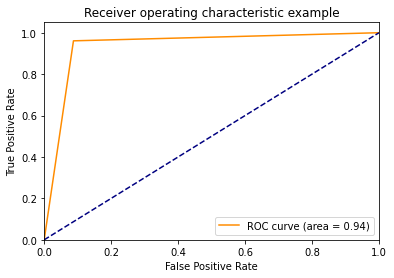

In [64]:
print(roc_auc_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
print(average_precision_score(y_test,y_decsion))
print(precision_score(y_test,y_decsion))
print(recall_score(y_test,y_decsion))
print(f1_score(y_test,y_decsion))
print(precision_recall_fscore_support(y_test,y_decsion))
print(precision_recall_curve(y_test,y_decsion))
#get auc roc curve
from sklearn.metrics import roc_curve, auc
#build
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
#plot
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [133]:
#save this model in pickle
import pickle
pickle.dump(model, open('model.pkl','wb'))
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
model

GradientBoostingClassifier(learning_rate=1, max_depth=20, max_features=8,
                           min_samples_leaf=11, min_samples_split=10,
                           n_estimators=1000, random_state=34, subsample=1,
                           verbose=1)

#this ios final model

In [ ]:
#apply with Reapeted Stratified k fold to Gradient Booasting
from sklearn.ensemble import GradientBoostingClassifier
#apply
cv= RepeatedStratifiedKFold(n_splits=20,random_state=1,n_repeats=10)
model=GradientBoostingClassifier(n_estimators=100,random_state=4,max_depth=9,min_samples_split=5,min_samples_leaf=5)
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
print(scores.mean())
#test on test set
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))


In [ ]:
#print(scores.max())
#test on test set
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))#boosting working good

In [ ]:
#with cross validation
from sklearn.ensemble import GradientBoostingClassifier
#apply
cv=StratifiedKFold(n_splits=100,random_state=1,shuffle=True)
model=GradientBoostingClassifier(n_estimators=100,random_state=1234,max_depth=20,max_features=3,min_samples_split=2,min_samples_leaf=1,learning_rate=0.001)
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
print(scores)
print(scores.mean())

[0.94117647 0.88235294 0.82352941 0.76470588 1.         0.82352941
 0.82352941 0.88235294 0.82352941 0.88235294 0.88235294 0.82352941
 0.76470588 0.88235294 0.76470588 0.82352941 0.82352941 0.88235294
 0.88235294 1.         0.88235294 0.88235294 0.82352941 1.
 0.94117647 0.82352941 0.88235294 0.88235294 0.88235294 0.76470588
 1.         1.         0.82352941 0.82352941 0.76470588 1.
 1.         1.         0.8125     1.         0.875      0.875
 0.9375     0.875      0.8125     1.         1.         0.875
 0.75       1.         0.8125     0.9375     0.9375     0.9375
 0.75       1.         0.8125     1.         0.9375     0.8125
 0.875      0.9375     0.875      0.875      1.         1.
 0.875      0.8125     0.75       0.9375     0.875      0.875
 0.875      0.9375     0.875      0.8125     1.         0.9375
 0.8125     0.9375     0.9375     0.875      0.9375     0.9375
 0.9375     0.9375     0.9375     0.875      0.875      0.9375
 1.         0.875      0.875      1.         1.       

In [ ]:
print(scores.max())
#test on test set
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
print(evaluate_model(model)) #an overfit but  good model

1.0
0.9070904645476773
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       208
           1       0.88      0.94      0.91       201

    accuracy                           0.91       409
   macro avg       0.91      0.91      0.91       409
weighted avg       0.91      0.91      0.91       409

Train Accuracy : 1.0
Train Confusion Matrix:
[[814   0]
 [  0 821]]
--------------------------------------------------
Test Accuracy : 0.9070904645476773
Test Confusion Matrix:
[[183  25]
 [ 13 188]]
None


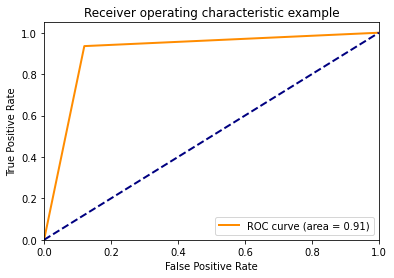

In [ ]:
#plot auc roc curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#apply on test set
y_decsion=model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
roc_auc = auc(fpr, tpr)
#plot
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [34]:
#apply adaboost
from sklearn.ensemble import AdaBoostClassifier
#apply
model=AdaBoostClassifier(n_estimators=200,random_state=1234,learning_rate=0.001,algorithm='SAMME',
base_estimator=RandomForestClassifier(max_depth=19,n_estimators=2000,random_state=12,criterion='entropy'))
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))

0.8975609756097561


In [37]:

#test on test set
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model)) #in boosting having error bt we can cosidered
print(classification_report(y_test,y_decsion))
print(f1_score(y_test,y_decsion)) #from confusion matrix hits diffrent

0.8975609756097561
Train Accuracy : 1.0
Train Confusion Matrix:
[[919   0]
 [  0 920]]
--------------------------------------------------
Test Accuracy : 0.8975609756097561
Test Confusion Matrix:
[[93 10]
 [11 91]]
None
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       103
           1       0.90      0.89      0.90       102

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205

0.8965517241379312


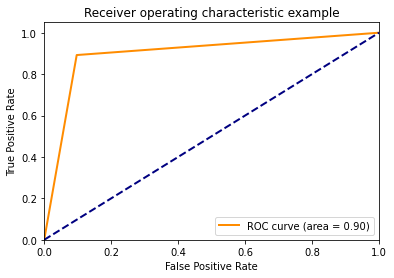

In [38]:
#plot auc roc curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#apply on test set
y_decsion=model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
roc_auc = auc(fpr, tpr)
#plot
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#apply with cross validation
from sklearn.ensemble import AdaBoostClassifier
#apply
cv=StratifiedKFold(n_splits=100,random_state=1,shuffle=True)
model=AdaBoostClassifier(n_estimators=2000,random_state=1234,learning_rate=0.01,algorithm='SAMME',
base_estimator=RandomForestClassifier(max_depth=19,max_features=17,n_estimators=2000,random_state=12,criterion='entropy'))
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
print(scores)
print(scores.mean())

[0.88235294 0.88235294 0.82352941 0.70588235 1.         0.82352941
 0.88235294 0.88235294 0.82352941 0.82352941 0.88235294 0.76470588
 0.82352941 0.94117647 0.70588235 0.76470588 0.94117647 0.88235294
 0.94117647 1.         0.88235294 0.88235294 0.88235294 1.
 0.94117647 0.70588235 0.88235294 0.94117647 0.94117647 0.76470588
 1.         0.94117647 0.88235294 0.82352941 0.76470588 1.
 1.         1.         0.8125     1.         0.8125     0.8125
 0.9375     0.75       0.875      0.9375     0.9375     0.8125
 0.8125     1.         0.6875     1.         0.8125     0.875
 0.875      1.         0.8125     1.         0.9375     0.8125
 1.         1.         0.875      0.8125     0.9375     1.
 0.875      0.875      0.875      0.9375     0.9375     0.9375
 0.8125     0.9375     0.875      0.875      1.         0.875
 0.875      0.9375     0.875      0.75       0.9375     1.
 0.9375     0.9375     1.         0.875      0.875      0.9375
 1.         0.9375     0.875      0.9375     0.9375     0

In [ ]:
print(scores.max())
#test on test set
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))
print(classification_report(y_test,y_decsion))
print(f1_score(y_test,y_decsion))

1.0
0.8948655256723717
Train Accuracy : 1.0
Train Confusion Matrix:
[[814   0]
 [  0 821]]
--------------------------------------------------
Test Accuracy : 0.8948655256723717
Test Confusion Matrix:
[[180  28]
 [ 15 186]]
None
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       208
           1       0.87      0.93      0.90       201

    accuracy                           0.89       409
   macro avg       0.90      0.90      0.89       409
weighted avg       0.90      0.89      0.89       409

0.8963855421686747


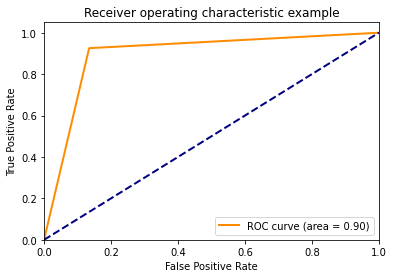

In [ ]:
#plot auc roc curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#apply on test set
y_decsion=model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
roc_auc = auc(fpr, tpr)
#plot
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [50]:
#xgboost
from xgboost import XGBClassifier
#apply
model=XGBClassifier(n_estimators=2000,random_state=12,learning_rate=0.1,max_depth=10,max_features=8,min_child_weight=1,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.01,reg_lambda=0.01)
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))

d:\anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
d:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
d:\anaconda\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:47:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:47:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9121951219512195


In [52]:

print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))
print(classification_report(y_test,y_decsion))
print(f1_score(y_test,y_decsion))

0.9121951219512195
Train Accuracy : 1.0
Train Confusion Matrix:
[[919   0]
 [  0 920]]
--------------------------------------------------
Test Accuracy : 0.9121951219512195
Test Confusion Matrix:
[[93 10]
 [ 8 94]]
None
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       103
           1       0.90      0.92      0.91       102

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205

0.9126213592233009


d:\anaconda\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
d:\anaconda\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
d:\anaconda\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
d:\anaconda\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtyp

d:\anaconda\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


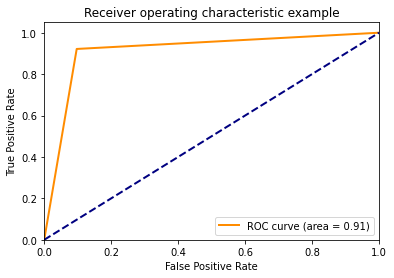

In [53]:
#plot auc roc curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#apply on test set
y_decsion=model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
roc_auc = auc(fpr, tpr)
#plot
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#with cross validation
from xgboost import XGBClassifier
#apply
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
model=XGBClassifier(n_estimators=200,random_state=1234,learning_rate=0.01,max_depth=20,max_features=3,min_child_weight=1,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.01,reg_lambda=0.01,
base_estimator=RandomForestClassifier(max_depth=19,max_features=17,n_estimators=200,random_state=12,criterion='entropy'))
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
print(scores)
print(scores.mean())

[0.88414634 0.83536585 0.8902439  0.88414634 0.8902439  0.89570552
 0.92638037 0.89570552 0.88957055 0.88957055]
0.8881078856800839


In [ ]:
print(scores.max())
#test on test set
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))
print(classification_report(y_test,y_decsion))
print(f1_score(y_test,y_decsion))

0.9263803680981595
0.8924205378973105
Train Accuracy : 0.9957186544342508
Train Confusion Matrix:
[[809   5]
 [  2 819]]
--------------------------------------------------
Test Accuracy : 0.8924205378973105
Test Confusion Matrix:
[[182  26]
 [ 18 183]]
None
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       208
           1       0.88      0.91      0.89       201

    accuracy                           0.89       409
   macro avg       0.89      0.89      0.89       409
weighted avg       0.89      0.89      0.89       409

0.8926829268292683


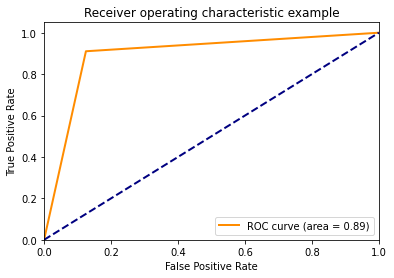

In [ ]:
#plot auc roc curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#apply on test set
y_decsion=model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
roc_auc = auc(fpr, tpr)
#plot
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#changing base estimator
from xgboost import XGBClassifier
#apply
cv=StratifiedKFold(n_splits=100,random_state=1,shuffle=True)
model=XGBClassifier(n_estimators=2000,random_state=1234,learning_rate=0.01,max_depth=20,max_features=3,min_child_weight=1,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.01,reg_lambda=0.01,
base_estimator=LogisticRegression(solver='liblinear',random_state=1234,max_iter=1000,class_weight='balanced'))
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
print(scores)
print(scores.mean())

[0.82352941 0.94117647 0.94117647 0.94117647 0.94117647 0.88235294
 0.88235294 0.94117647 0.82352941 0.88235294 0.82352941 0.76470588
 0.82352941 0.94117647 0.76470588 0.76470588 0.88235294 0.88235294
 0.88235294 1.         0.88235294 0.94117647 0.70588235 0.94117647
 0.94117647 0.76470588 0.88235294 0.94117647 0.94117647 0.88235294
 1.         1.         1.         0.76470588 0.88235294 0.9375
 0.875      0.875      0.75       1.         0.9375     0.8125
 0.9375     0.875      0.9375     1.         1.         0.875
 0.6875     0.9375     0.75       0.9375     0.9375     0.875
 0.9375     1.         0.875      1.         0.9375     0.8125
 0.8125     0.9375     0.8125     1.         0.9375     1.
 0.875      0.9375     0.9375     0.9375     0.9375     0.9375
 0.8125     1.         0.9375     0.9375     0.9375     0.75
 0.9375     0.9375     0.875      0.875      0.9375     0.9375
 1.         1.         0.9375     0.875      0.875      0.9375
 1.         0.9375     0.9375     0.875    

In [ ]:
print(scores.max())
#test on test set
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))
print(classification_report(y_test,y_decsion))
print(f1_score(y_test,y_decsion))

1.0
0.8850855745721271
Train Accuracy : 1.0
Train Confusion Matrix:
[[814   0]
 [  0 821]]
--------------------------------------------------
Test Accuracy : 0.8850855745721271
Test Confusion Matrix:
[[184  24]
 [ 23 178]]
None
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       208
           1       0.88      0.89      0.88       201

    accuracy                           0.89       409
   macro avg       0.89      0.89      0.89       409
weighted avg       0.89      0.89      0.89       409

0.8833746898263026


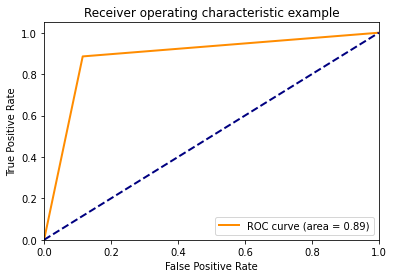

In [ ]:
#plot auc roc curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#apply on test set
y_decsion=model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
roc_auc = auc(fpr, tpr)
#plot
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model=RandomForestClassifier(max_depth=19,max_features=17,n_estimators=20,random_state=12,criterion='entropy')
param_dist={'max_depth':[19],
'n_estimators':[300,1000],
'n_jobs':[-1],
'max_features':[14.17,18],
'criterion':['gini','entropy']}
#apply
cv=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
model=GridSearchCV(model,param_dist,scoring='accuracy',cv=cv,n_jobs=-1)
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
print(scores)

No handles with labels found to put in legend.


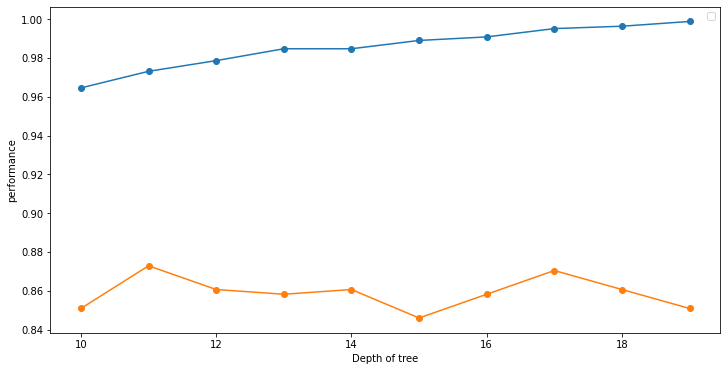

In [ ]:
train_accuracy = []
validation_accuracy = []
for depth in range(10,20):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_test, y_test))
frame = pd.DataFrame({'max_depth':range(10,20), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [ ]:
x_smote.shape,y_smote.shape

((2044, 18), (2044,))

In [ ]:
X_tr,X_te,y_tr,y_te=train_test_split(x_smote,y_smote,test_size=0.1,random_state=17,stratify=y_smote,shuffle=True)

x_smote.shape,y_smote.shape,X_tr.shape,y_tr.shape,X_te.shape,y_te.shape

((2044, 17), (2044,), (1839, 17), (1839,), (205, 17), (205,))

In [ ]:
x_smote.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
x_smote.shape,y_smote.shape

((2044, 17), (2044,))

In [ ]:
X_tr,X_te,y_tr,y_te=train_test_split(x_smote,y_smote,test_size=0.1,random_state=17,stratify=y_smote,shuffle=True)

x_smote.shape,y_smote.shape,X_tr.shape,y_tr.shape,X_te.shape,y_te.shape

((2044, 17), (2044,), (1839, 17), (1839,), (205, 17), (205,))

In [ ]:
#create a funtion and scale the data
def scale_data(X_train,X_test):
    scaler=RobustScaler()
    X_tr=scaler.fit_transform(x_smote)
    X_te=scaler.transform(X_test)
    X_tr=pd.DataFrame(X_tr)
    X_te=pd.DataFrame(X_te)
    return X_tr,X_te

In [ ]:
#lets make X_tr ,y_yr,X_te,y_te Normalize
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_tr=scaler.fit_transform(X_tr)
X_te=scaler.transform(X_te)
X_tr=pd.DataFrame(X_tr)
X_te=pd.DataFrame(X_te)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.1,random_state=17,stratify=y_smote,shuffle=True)
X_train.shape,X_test.shape

((1839, 17), (205, 17))

In [ ]:
#applying Knn
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
cv=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
model=KNeighborsClassifier(n_neighbors=17,weights='distance',algorithm='auto',metric='euclidian',n_jobs=1)
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
print(scores)
print(scores.mean())

In [ ]:
print(scores.max())
#test on test set
model.fit(X_tr,y_tr)
y_decsion=model.predict(X_te)
print(accuracy_score(y_te,y_decsion))
print(evaluate_model(model))
print(classification_report(y_te,y_decsion))
print(f1_score(y_te,y_decsion))

1.0
0.824390243902439


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Train Accuracy : 0.4978593272171254
Train Confusion Matrix:
[[814   0]
 [821   0]]
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Test Accuracy : 0.508557457212714
Test Confusion Matrix:
[[208   0]
 [201   0]]
None
              precision    recall  f1-score   support

           0       0.85      0.78      0.82       102
           1       0.80      0.86      0.83       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205

0.8317757009345795


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
#apply KNN
from sklearn.neighbors import KNeighborsClassifier
#apply
model=KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='auto',metric='euclidean')
model.fit(X_tr,y_tr)
y_decsion=model.predict(X_te)
print(accuracy_score(y_te,y_decsion))

0.8439024390243902


In [ ]:
print(scores.max())
#test on test set
model.fit(X_tr,y_tr)
y_decsion=model.predict(X_te)
print(accuracy_score(y_te,y_decsion))
print(evaluate_model(model))
print(classification_report(y_te,y_decsion))
print(f1_score(y_te,y_decsion))

nan
0.8439024390243902
Train Accuracy : 0.5002718868950516
Train Confusion Matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


[[920   0]
 [919   0]]
--------------------------------------------------
Test Accuracy : 0.4975609756097561
Test Confusion Matrix:
[[102   0]
 [103   0]]
None
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       102
           1       0.79      0.94      0.86       103

    accuracy                           0.84       205
   macro avg       0.86      0.84      0.84       205
weighted avg       0.86      0.84      0.84       205

0.8584070796460177


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
#apply KNN
from sklearn.neighbors import KNeighborsClassifier
#apply
model=KNeighborsClassifier(n_neighbors=17,weights='distance',algorithm='auto',metric='euclidean')
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))

0.8390243902439024


In [ ]:

print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))
print(classification_report(y_test,y_decsion))
print(f1_score(y_test,y_decsion)) #goodd

0.8390243902439024
Train Accuracy : 0.9994562262098967
Train Confusion Matrix:
[[920   0]
 [  1 918]]
--------------------------------------------------
Test Accuracy : 0.8390243902439024
Test Confusion Matrix:
[[79 23]
 [10 93]]
None
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       102
           1       0.80      0.90      0.85       103

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205

0.8493150684931507


In [ ]:
#aplly svc
from sklearn.svm import SVC
#apply
model=SVC(kernel='rbf',degree=9) #linear sigmoide poly rbf
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))

0.7024390243902439
Train Accuracy : 0.7302882001087547
Train Confusion Matrix:
[[501 419]
 [ 77 842]]
--------------------------------------------------
Test Accuracy : 0.7024390243902439
Test Confusion Matrix:
[[54 48]
 [13 90]]
None


In [ ]:

print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))
print(classification_report(y_test,y_decsion))
print(f1_score(y_test,y_decsion)) #goodd

0.7024390243902439
Train Accuracy : 0.7302882001087547
Train Confusion Matrix:
[[501 419]
 [ 77 842]]
--------------------------------------------------
Test Accuracy : 0.7024390243902439
Test Confusion Matrix:
[[54 48]
 [13 90]]
None
              precision    recall  f1-score   support

           0       0.81      0.53      0.64       102
           1       0.65      0.87      0.75       103

    accuracy                           0.70       205
   macro avg       0.73      0.70      0.69       205
weighted avg       0.73      0.70      0.69       205

0.7468879668049793


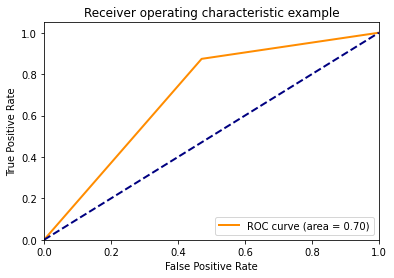

In [ ]:
#plot auc roc curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#apply on test set
y_decsion=model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
roc_auc = auc(fpr, tpr)
#plot
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#apply simple svm on data
from sklearn.svm import SVC
#apply
model=SVC(C=1,kernel='rbf',random_state=834,degree=5) #linear sigmoide poly rbf
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))


0.7024390243902439
Train Accuracy : 0.7302882001087547
Train Confusion Matrix:
[[501 419]
 [ 77 842]]
--------------------------------------------------
Test Accuracy : 0.7024390243902439
Test Confusion Matrix:
[[54 48]
 [13 90]]
None


In [ ]:
X_tr.shape,y_tr.shape,X_train.shape,y_train.shape

((1839, 17), (1839,), (1839, 17), (1839,))

#aplly svc
from sklearn.svm import SVC
#apply
model=SVC(degree=5,kernel='poly',random_state=14,max_iter=10)
model.fit(X_tr,y_tr)
y_decsion=model.predict(X_te)
print(accuracy_score(y_te,y_decsion))
print(evaluate_model(model))

In [ ]:
print(accuracy_score(y_te,y_decsion))
print(evaluate_model(model))
print(classification_report(y_te,y_decsion))
print(f1_score(y_te,y_decsion)) #noooooo

0.8341463414634146


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Train Accuracy : 0.4978593272171254
Train Confusion Matrix:


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


[[814   0]
 [821   0]]
--------------------------------------------------
Test Accuracy : 0.508557457212714
Test Confusion Matrix:
[[208   0]
 [201   0]]
None
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       102
           1       0.81      0.88      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205

0.8425925925925926


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


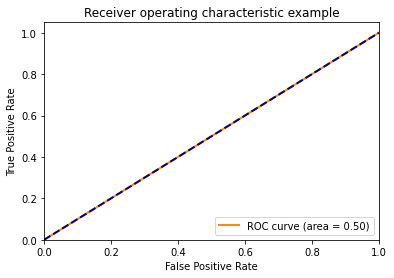

In [ ]:
#plot auc roc curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#apply on test set
y_decsion=model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
roc_auc = auc(fpr, tpr)
#plot
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() #nooooooooooooooooooo

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1635, 17), (1635,), (409, 17), (409,))

In [49]:
#apply catboost and lightboost
from catboost import CatBoostClassifier
import lightgbm 
from lightgbm import LGBMClassifier
#apply
model=LGBMClassifier(iterations=1000,learning_rate=0.1,depth=5,loss_function='Logloss',random_seed=124,class_weights='balanced',n_estimators=100)
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))

[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: class_weights
0.9121951219512195
Train Accuracy : 0.9945622620989668
Train Confusion Matrix:
[[910   9]
 [  1 919]]
--------------------------------------------------
Test Accuracy : 0.9121951219512195
Test Confusion Matrix:
[[92 11]
 [ 7 95]]
None


In [46]:
y_decsion=cross_val_predict(model,X_train,y_train)
print(accuracy_score(y_train,y_decsion))
print(evaluate_model(model))

[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown 

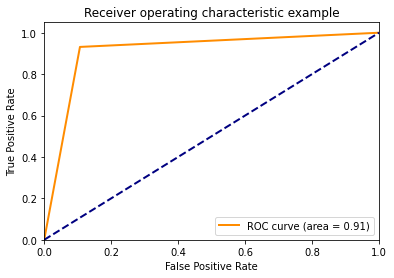

In [44]:
#plot auc roc curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#apply on test set
y_decsion=model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
roc_auc = auc(fpr, tpr)
#plot
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() 

In [ ]:
import pickle
pickle.dump(model, open('modeln.pkl','wb'))
# Loading model to compare the results
model = pickle.load(open('modeln.pkl','rb'))
model

In [ ]:
pickle.dump(model, open('model.pkl','wb'))

In [ ]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))

In [ ]:
model

LGBMClassifier(class_weights='balanced', depth=17, iterations=100,
               loss_function='Logloss', random_seed=124)

In [ ]:
#her i got 99% train and 95% test so model is good 

In [ ]:
#apply with cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier
import lightgbm
from lightgbm import LGBMClassifier
#apply
cv=StratifiedKFold(n_splits=100,random_state=1,shuffle=True)
model=LGBMClassifier(iterations=100,learning_rate=0.001,depth=17,loss_function='Logloss',random_seed=124,class_weights='balanced',n_estimators=100)
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
print(scores)
print(scores.mean())

[1.         0.88235294 0.88235294 0.82352941 1.         0.82352941
 0.82352941 0.70588235 0.76470588 0.76470588 0.88235294 0.82352941
 0.82352941 0.88235294 0.82352941 0.88235294 0.82352941 0.82352941
 0.82352941 0.94117647 0.76470588 0.88235294 0.70588235 0.94117647
 0.64705882 0.82352941 0.82352941 0.82352941 0.94117647 1.
 0.82352941 0.76470588 0.76470588 0.58823529 0.58823529 0.75
 0.875      0.9375     0.625      0.6875     0.8125     0.9375
 0.75       0.875      0.9375     1.         1.         0.9375
 1.         1.         0.6875     0.8125     0.8125     0.8125
 0.6875     1.         0.75       0.875      0.8125     0.875
 0.9375     0.9375     0.9375     0.8125     0.8125     0.9375
 0.6875     0.875      0.875      0.75       0.9375     1.
 0.9375     0.875      0.9375     0.75       0.75       0.875
 0.5625     0.9375     0.8125     0.8125     0.75       0.9375
 0.8125     0.8125     0.875      1.         1.         0.6875
 0.875      0.875      0.8125     0.875      0.75  

In [ ]:
print(scores.max())

1.0


In [ ]:
#fit model and apply on test
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))

0.8728606356968215
Train Accuracy : 0.8844036697247707
Train Confusion Matrix:
[[710 107]
 [ 82 736]]
--------------------------------------------------
Test Accuracy : 0.8728606356968215
Test Confusion Matrix:
[[176  29]
 [ 23 181]]
None


In [ ]:

#get best params
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
import lightgbm
from lightgbm import LGBMClassifier
#apply
cv=StratifiedKFold(n_splits=600,random_state=1,shuffle=True)
model=LGBMClassifier(iterations=1000,learning_rate=0.1,depth=17,loss_function='Logloss',random_seed=124,class_weights='balanced',n_estimators=100)
param_grid = {
    'learning_rate': [0.1,0.2,0.3],
    'n_estimators': [100,200,300],
    'depth': [17,18,19],
    'class_weights': ['balanced','balanced_subsample']
}
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)


In [ ]:
#predict on test
y_decsion=grid_search.predict(X_te)
print(accuracy_score(y_te,y_decsion))
print(evaluate_model(model))

In [ ]:
from lightgbm.callback import early_stopping
#get best params
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
import lightgbm
from lightgbm import LGBMClassifier

model=LGBMClassifier(iterations=10,learning_rate=0.01,depth=17,loss_function='Logloss',random_seed=124,class_weights='balanced',n_estimators=100)

model.fit(X_train, y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))

ModuleNotFoundError: ignored

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

In [ ]:
X_tr.shape,X_te.shape,y_tr.shape,y_te.shape

((1839, 17), (205, 17), (1839,), (205,))

In [ ]:
model=CatBoostClassifier(iterations=10,learning_rate=0.1,depth=16,early_stopping_rounds=19)
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))


0:	learn: 0.6561615	total: 1.35s	remaining: 12.2s
1:	learn: 0.6224220	total: 8.18s	remaining: 32.7s
2:	learn: 0.5985165	total: 14.8s	remaining: 34.6s
3:	learn: 0.5713009	total: 21.6s	remaining: 32.4s
4:	learn: 0.5508334	total: 28.3s	remaining: 28.3s
5:	learn: 0.5338399	total: 34.9s	remaining: 23.3s
6:	learn: 0.5184376	total: 40.5s	remaining: 17.4s
7:	learn: 0.5017049	total: 45.1s	remaining: 11.3s
8:	learn: 0.4887130	total: 49.6s	remaining: 5.51s
9:	learn: 0.4731979	total: 49.8s	remaining: 0us
0.8557457212713936
Train Accuracy : 0.8807339449541285
Train Confusion Matrix:
[[685 129]
 [ 66 755]]
--------------------------------------------------
Test Accuracy : 0.8557457212713936
Test Confusion Matrix:
[[176  32]
 [ 27 174]]
None


In [ ]:
print(scores.max())
#apply to test
model.fit(X_tr,y_tr)
y_decsion=model.predict(X_te)
print(accuracy_score(y_te,y_decsion))
print(evaluate_model(model))
print(accuracy_score(y_te,y_decsion))

In [ ]:
#apply
model=LGBMClassifier(n_estimators=100,learning_rate=0.1,random_state=1234,class_weight='balanced')
model.fit(X_tr,y_tr)
y_decsion=model.predict(X_te)
print(accuracy_score(y_te,y_decsion))
print(evaluate_model(model))

In [ ]:
#apply extreme gradient boosting
from xgboost import XGBClassifier
#apply
model=XGBClassifier(n_estimators=100,learning_rate=0.01,random_state=34,class_weight='balanced',n_jobs=-1,max_depth=17)
model.fit(X_tr,y_tr)
y_decsion=model.predict(X_te)
print(accuracy_score(y_te,y_decsion))
print(evaluate_model(model))

In [ ]:
#cross validatoin with svm and grid search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#apply
cv=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
model=SVC(C=0.1,kernel='rbf',gamma=[0.1,0.5,1,5],probability=True,random_state=1234,class_weight='balanced')
param_grid={'C':[200,400,900],'gamma':[2200,2900]}
grid=GridSearchCV(model,param_grid,scoring='accuracy',cv=cv)
grid.fit(X_tr,y_tr)
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
y_decsion=grid.predict(X_te)
print(accuracy_score(y_te,y_decsion))
print(evaluate_model(grid))

In [ ]:
X_tr.shape,y_tr.shape,X_te.shape,y_te.shape

In [ ]:
#apply svc
from sklearn.svm import SVC
#apply
model=SVC(C=400,kernel='rbf',gamma=2900,probability=True,random_state=1234,class_weight='balanced')
model.fit(X_tr,y_tr)
y_decsion=model.predict(X_te)
print(accuracy_score(y_te,y_decsion))
print(evaluate_model(model))

In [ ]:
y_decsion=grid.predict(X_te)
print(accuracy_score(y_te,y_decsion))
print(evaluate_model(model))

In [ ]:
#cross validatoin with svm and grid search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#apply
grid=SVC(C=0.1,kernel='poly',probability=True,random_state=124,class_weight='balanced')
grid.fit(X_tr,y_tr)
y_decsion=grid.predict(X_te)
print(accuracy_score(y_te,y_decsion))
print(evaluate_model(grid))

In [ ]:
y_decsion=grid.predict(X_te)
print(accuracy_score(y_te,y_decsion))
print(evaluate_model(model))

In [ ]:
#apply pca and tsne then apply random forest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
#apply pca
pca=PCA(n_components=0.95,random_state=1234)
X_pca=pca.fit_transform(X_tr)
X_pca_te=pca.transform(X_te)
#apply tsne
#tsne=TSNE(n_components=2,random_state=1234)
#X_tsne=tsne.fit_transform(X_pca)
#X_tsne_te=tsne.transform(X_pca_te)
#apply random forest with tsne
#model=RandomForestClassifier(n_estimators=100,random_state=1234,class_weight='balanced')
#model.fit(X_tsne,y_tr)
#y_decsion=model.predict(X_tsne_te)
#print(accuracy_score(y_te,y_decsion))
#print(evaluate_model(model))
#apply random forest with pca
model=RandomForestClassifier(n_estimators=100,random_state=1234,class_weight='balanced',max_features=5)
model.fit(X_pca,y_tr)
y_decsion=model.predict(X_pca_te)
print(accuracy_score(y_te,y_decsion))
print(confusion_matrix(y_te,y_decsion))
print(evaluate_model(model))

In [ ]:
#apply feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X=new_df.drop(['Status'],axis=1)
y=new_df.Status
df_new = SelectKBest(chi2, k=2).fit_transform(X, y)
df_new.shape

(1249, 2)

In [ ]:
s=pd.DataFrame(df_new)

RangeIndex(start=0, stop=2, step=1)

In [ ]:
s.head()

0           1
0  4758311.63  5659653.33
1   139363.22    87000.00
2    37375.46  1020883.70
3     4000.00    76946.96
4   338470.29   442100.00

In [ ]:
df.to_excel('CHURN_DATA.xlsx',index=False)

In [ ]:
#we can see the Status is depend on multiple parameters 
#so some algorithm will be rejected 

In [ ]:
#applying linear regression to find correlation between cols

In [ ]:
!pip install pyspark

In [ ]:
#import linear regression from pyspark
from pyspark.ml.regression import LinearRegression
#import train test split from pyspark
from pyspark.ml.tuning import TrainValidationSplit
#import evaluator from pyspark
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
dff=df.copy()

In [ ]:
#for X the only age col and y the status col
X = dff.drop(['Status'],axis=1)
y = dff['Status']


In [ ]:
X=dff[['AGE']]
y=dff[['Status']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True)

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [ ]:
#apply linear regression
lr_model=LR.fit(X,y)


In [ ]:
Yhat=LR.predict(X)

In [ ]:
print("What is the value of the intercept (a)? \n {}".format(LR.intercept_))
print("What is the value of the Slope (b)? \n {}".format(LR.coef_))
print("\n Final estimated linear model")

What is the value of the intercept (a)? 
 [0.20040933]
What is the value of the Slope (b)? 
 [[-0.00039925]]

 Final estimated linear model


In [ ]:
print("YHat=",LR.intercept_,"+",LR.coef_,"*X")
#equation for reg line

YHat= [0.20040933] + [[-0.00039925]] *X


In [ ]:
# Extracting independent variable target variables
lm1 = LinearRegression()

# fit in linear model
lm1.fit( dff[['CUS_Month_Income']], dff['Status'])

print("What is the value of the intercept (a)? \n {}".format(lm1.intercept_))
print("What is the value of the Slope (b)? \n {}".format(lm1.coef_))
print("\n Final estimated linear model")


What is the value of the intercept (a)? 
 0.1756222977625715
What is the value of the Slope (b)? 
 [2.21460727e-09]

 Final estimated linear model


In [ ]:
print("YHat=",lm1.intercept_,"+",lm1.coef_,"*X")
#equation for reg line

YHat= 0.1756222977625715 + [2.21460727e-09] *X


In [ ]:
dff['CUS_Gender']=dff['CUS_Gender'].map({'MALE':0,"FEMALE":1,"NULL":2})                       
dff['TAR_Desc']=dff['TAR_Desc'].map({'EXECUTIVE':0,'LOW':1,'MIDLE':2,'PLATINUM':3})

In [ ]:
dff['CUS_Marital_Status'].isna().sum().sum()

0

In [ ]:
dff['CUS_Marital_Status'].unique()

array([1, 4, 5, 0, 2, 3])

In [ ]:
dff['CUS_Marital_Status'].value_counts()

4    879
1    328
0     30
5     10
2      1
3      1
Name: CUS_Marital_Status, dtype: int64

In [ ]:
dff['CUS_Gender'].isna().sum()

0

In [ ]:
dff['TAR_Desc'].unique()

array([0, 1, 2, 3], dtype=int64)

In [ ]:

dff['CUS_DOB'] = pd.to_datetime(dff['CUS_DOB'])
dff['Date'] = dff['CUS_DOB'].dt.strftime("%Y-%m-%d")
# change the format of CUS_DOB column into month/dat/year format

In [ ]:
dff['Time'] = dff['CUS_DOB'].dt.strftime("%H:%M")

In [ ]:
dff['Time'].unique()

array(['00:00'], dtype=object)

In [ ]:
#convert Date column into datetime datatype
dff['Date'] = pd.to_datetime(dff['Date'])


<AxesSubplot:>

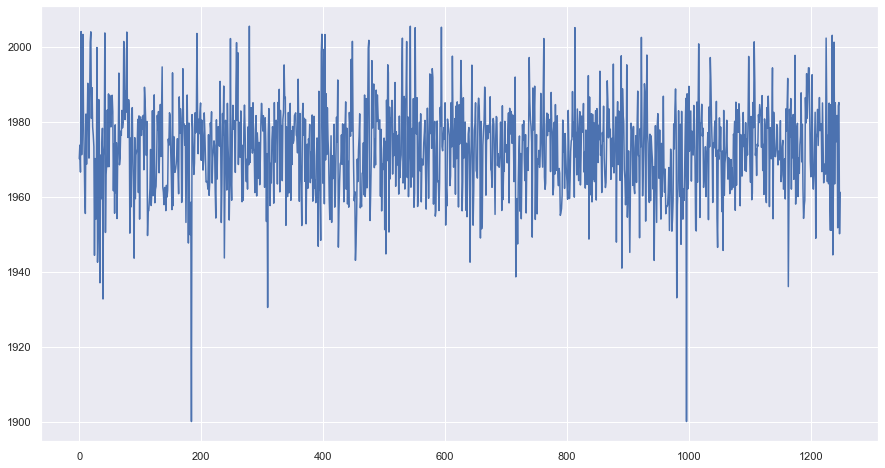

In [ ]:
dff['Date'].plot(kind='line',figsize=(15,8)) #we need predict churn and non churn we can't follow time series pattern

In [ ]:
dff.drop(['CUS_DOB'],axis=1,inplace=True)

In [ ]:
dff.shape
dff.columns

Index(['AGE', 'CUS_Month_Income', 'CUS_Gender', 'CUS_Marital_Status',
       'CUS_Customer_Since', 'YEARS_WITH_US',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'Status', 'Date', 'Time'],
      dtype='object')

In [ ]:
dff['CUS_Customer_Since'] = pd.to_datetime(dff['CUS_Customer_Since'])
dff['CUS_Customer_Since_New'] = dff['CUS_Customer_Since'].dt.strftime("%Y-%m-%d")

In [ ]:
dff.columns

Index(['AGE', 'CUS_Month_Income', 'CUS_Gender', 'CUS_Marital_Status',
       'CUS_Customer_Since', 'YEARS_WITH_US',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'TAR_Desc', 'Status', 'Date', 'Time', 'CUS_Customer_Since_New'],
      dtype='object')

In [ ]:
dff.drop(['CUS_Customer_Since'],axis=1,inplace=True)

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   AGE                                 1249 non-null   int64         
 1   CUS_Month_Income                    1249 non-null   float64       
 2   CUS_Gender                          1249 non-null   int64         
 3   CUS_Marital_Status                  1249 non-null   int32         
 4   YEARS_WITH_US                       1249 non-null   int64         
 5   # total debit transactions for S1   1249 non-null   int64         
 6   # total debit transactions for S2   1249 non-null   int64         
 7   # total debit transactions for S3   1249 non-null   int64         
 8   total debit amount for S1           1249 non-null   float64       
 9   total debit amount for S2           1249 non-null   float64       
 10  total debit amount for S

In [ ]:
dff['CUS_Customer_Since_New'] = pd.to_datetime(dff['CUS_Customer_Since_New'])

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   AGE                                 1249 non-null   int64         
 1   CUS_Month_Income                    1249 non-null   float64       
 2   CUS_Gender                          1249 non-null   int64         
 3   CUS_Marital_Status                  1249 non-null   int32         
 4   YEARS_WITH_US                       1249 non-null   int64         
 5   # total debit transactions for S1   1249 non-null   int64         
 6   # total debit transactions for S2   1249 non-null   int64         
 7   # total debit transactions for S3   1249 non-null   int64         
 8   total debit amount for S1           1249 non-null   float64       
 9   total debit amount for S2           1249 non-null   float64       
 10  total debit amount for S

In [ ]:
dff.drop(['Time'],axis=1,inplace=True)

In [ ]:
dff.describe

<bound method NDFrame.describe of       AGE  CUS_Month_Income  CUS_Gender  CUS_Marital_Status  YEARS_WITH_US  \
0      49           7116.64           0                   1             25   
1      46        1500000.00           1                   4             14   
2      53        5000000.00           1                   4             14   
3      15            500.00           1                   4             14   
4      48        9000000.00           1                   4              5   
...   ...               ...         ...                 ...            ...   
1244   68           4500.00           0                   4             14   
1245   35        3500000.00           0                   4             14   
1246   34           1000.00           0                   4             14   
1247   69        2000000.00           0                   4             14   
1248   58        5000000.00           1                   4             14   

      # total debit transacti

<AxesSubplot:>

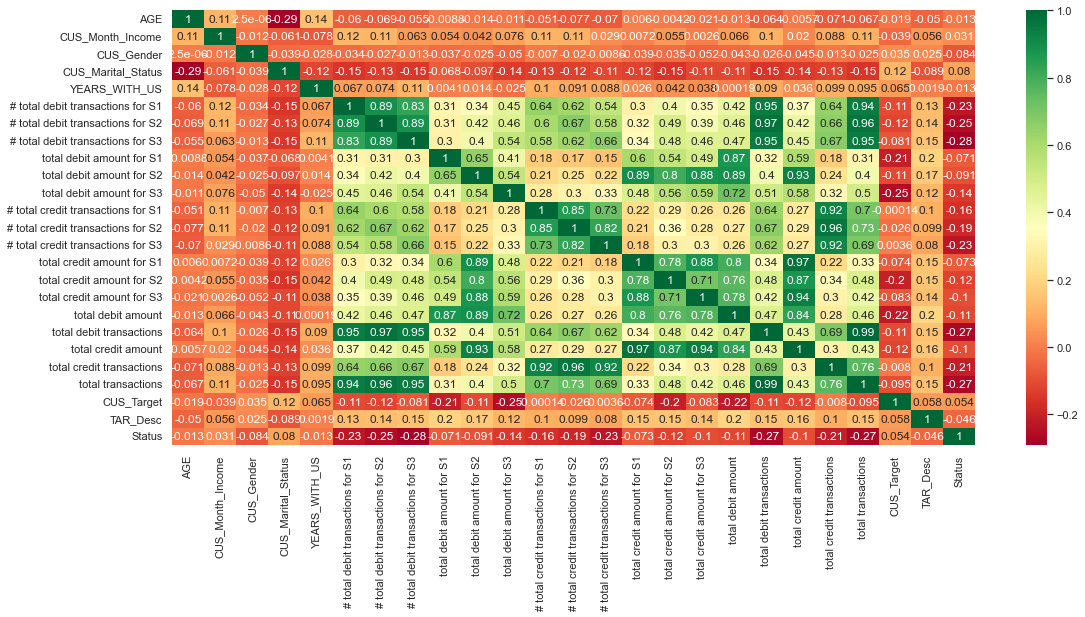

In [ ]:
sns.set(rc = {'figure.figsize':(18,8)})
sns.heatmap(dff.corr(),annot=True,cmap='RdYlGn')

In [ ]:
dff.shape

(1249, 27)

#plot every col
sns.pairplot(dff,hue='Status',palette='Set2')

<AxesSubplot:xlabel='CUS_Marital_Status', ylabel='count'>

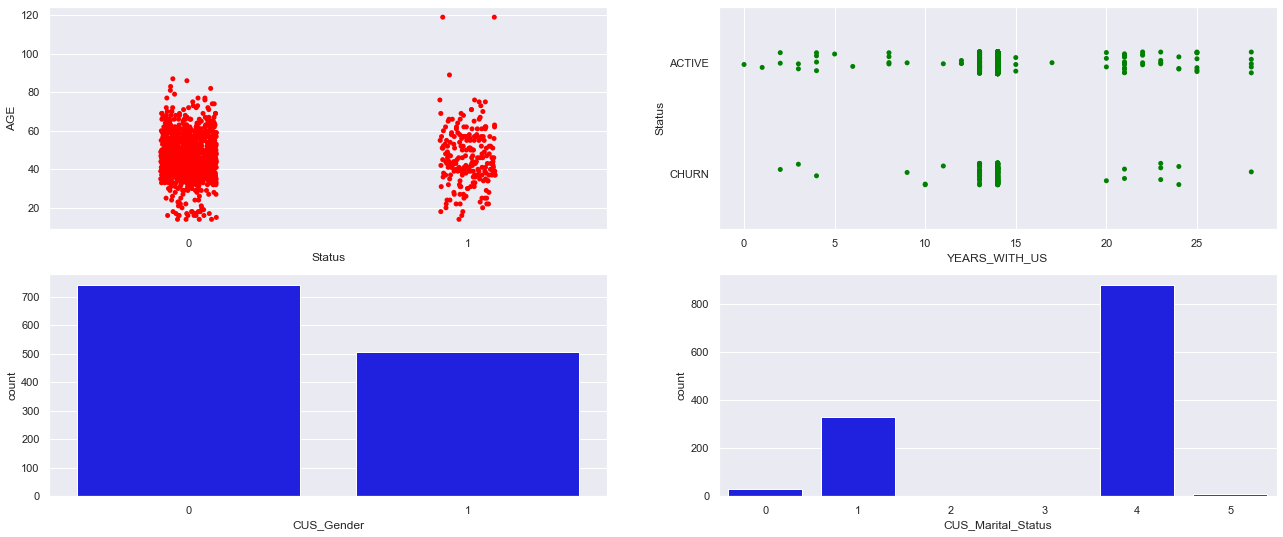

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(22,9))
#box pie bar
sns.stripplot(y='AGE',x='Status',data=dff,color='red',ax=axes[0,0])
sns.stripplot(x='YEARS_WITH_US',y='Status',data=data,color='green',ax=axes[0,1])
sns.countplot(x='CUS_Gender',data=dff,color='blue',ax=axes[1,0])
sns.countplot(x='CUS_Marital_Status',data=dff,color='blue',ax=axes[1,1])

<AxesSubplot:xlabel='Status', ylabel='# total debit transactions for S3'>

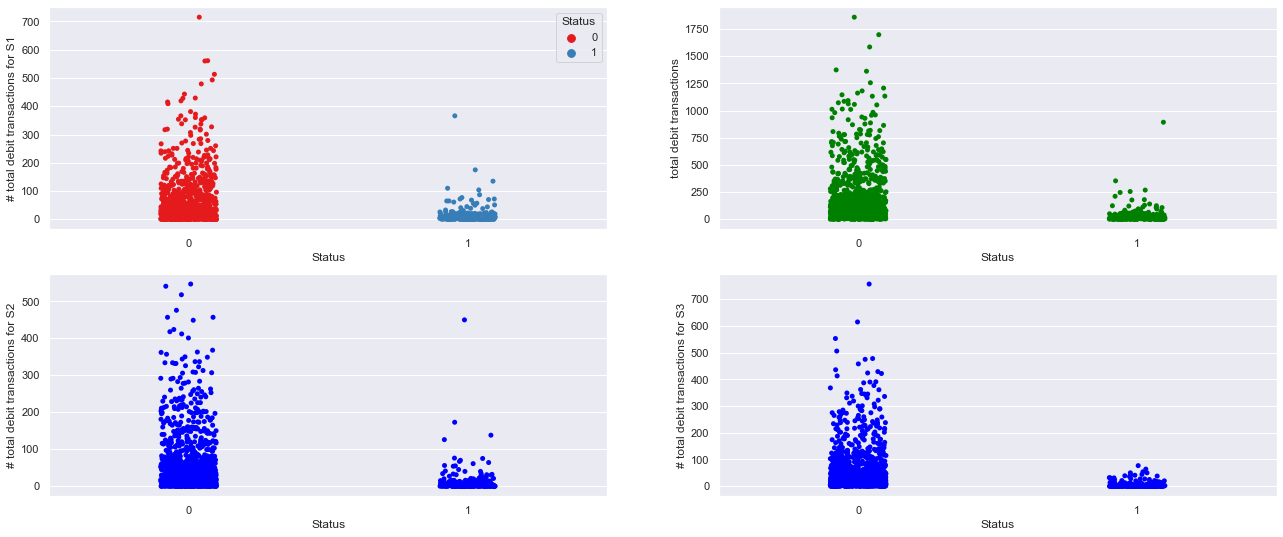

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(22,9))
sns.stripplot(y='# total debit transactions for S1',x='Status',data=dff,color='red',ax=axes[0,0],hue='Status',palette='Set1',jitter=True,edgecolor='black')
sns.stripplot(y='total debit transactions',x='Status',data=dff,color='green',ax=axes[0,1])
sns.stripplot(y='# total debit transactions for S2',x='Status',data=dff,color='blue',ax=axes[1,0])
sns.stripplot(y='# total debit transactions for S3',x='Status',data=dff,color='blue',ax=axes[1,1])

In [ ]:
dff.dtypes

AGE                                            int64
CUS_Month_Income                             float64
CUS_Gender                                     int64
CUS_Marital_Status                             int32
YEARS_WITH_US                                  int64
# total debit transactions for S1              int64
# total debit transactions for S2              int64
# total debit transactions for S3              int64
total debit amount for S1                    float64
total debit amount for S2                    float64
total debit amount for S3                    float64
# total credit transactions for S1             int64
# total credit transactions for S2             int64
# total credit transactions for S3             int64
total credit amount for S1                   float64
total credit amount for S2                   float64
total credit amount for S3                   float64
total debit amount                           float64
total debit transactions                      

In [ ]:
dff.columns.__dict__

{'_data': array(['AGE', 'CUS_Month_Income', 'CUS_Gender', 'CUS_Marital_Status',
        'YEARS_WITH_US', '# total debit transactions for S1',
        '# total debit transactions for S2',
        '# total debit transactions for S3', 'total debit amount for S1',
        'total debit amount for S2', 'total debit amount for S3',
        '# total credit transactions for S1',
        '# total credit transactions for S2',
        '# total credit transactions for S3', 'total credit amount for S1',
        'total credit amount for S2', 'total credit amount for S3',
        'total debit amount', 'total debit transactions',
        'total credit amount', 'total credit transactions',
        'total transactions', 'CUS_Target', 'TAR_Desc', 'Status', 'Date',
        'CUS_Customer_Since_New'], dtype=object),
 '_name': None,
 '_cache': {'inferred_type': 'string',
  'dtype': dtype('O'),
  '_is_multi': False,
  '_is_all_dates': False,
  '_engine': <pandas._libs.index.ObjectEngine at 0x1db1be12040>,
  '_

<AxesSubplot:xlabel='total debit transactions', ylabel='total transactions'>

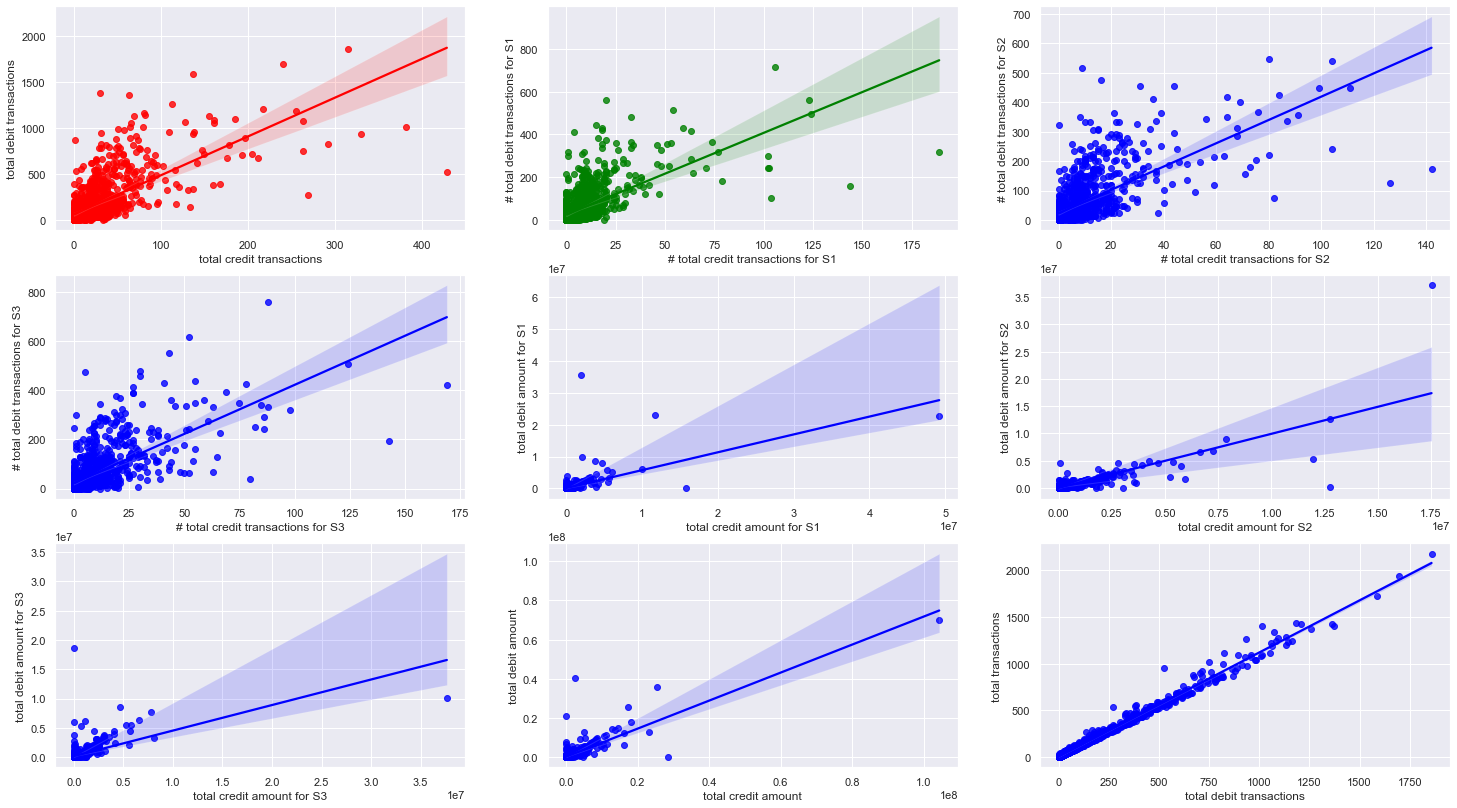

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(25,14))
sns.regplot(y='total debit transactions',x='total credit transactions',data=dff,color='red',ax=axes[0,0])
sns.regplot(y='# total debit transactions for S1',x='# total credit transactions for S1',data=dff,color='green',ax=axes[0,1])
sns.regplot(y='# total debit transactions for S2',x='# total credit transactions for S2',data=dff,color='blue',ax=axes[0,2])
sns.regplot(y='# total debit transactions for S3',x='# total credit transactions for S3',data=dff,color='blue',ax=axes[1,0])
sns.regplot(y='total debit amount for S1',x='total credit amount for S1',data=dff,color='blue',ax=axes[1,1])
sns.regplot(y='total debit amount for S2',x='total credit amount for S2',data=dff,color='blue',ax=axes[1,2])
sns.regplot(y='total debit amount for S3',x='total credit amount for S3',data=dff,color='blue',ax=axes[2,0])
sns.regplot(y='total debit amount',x='total credit amount',data=dff,color='blue',ax=axes[2,1])
sns.regplot(y='total transactions',x='total debit transactions',data=dff,color='blue',ax=axes[2,2])


<AxesSubplot:xlabel='CUS_Month_Income', ylabel='total transactions'>

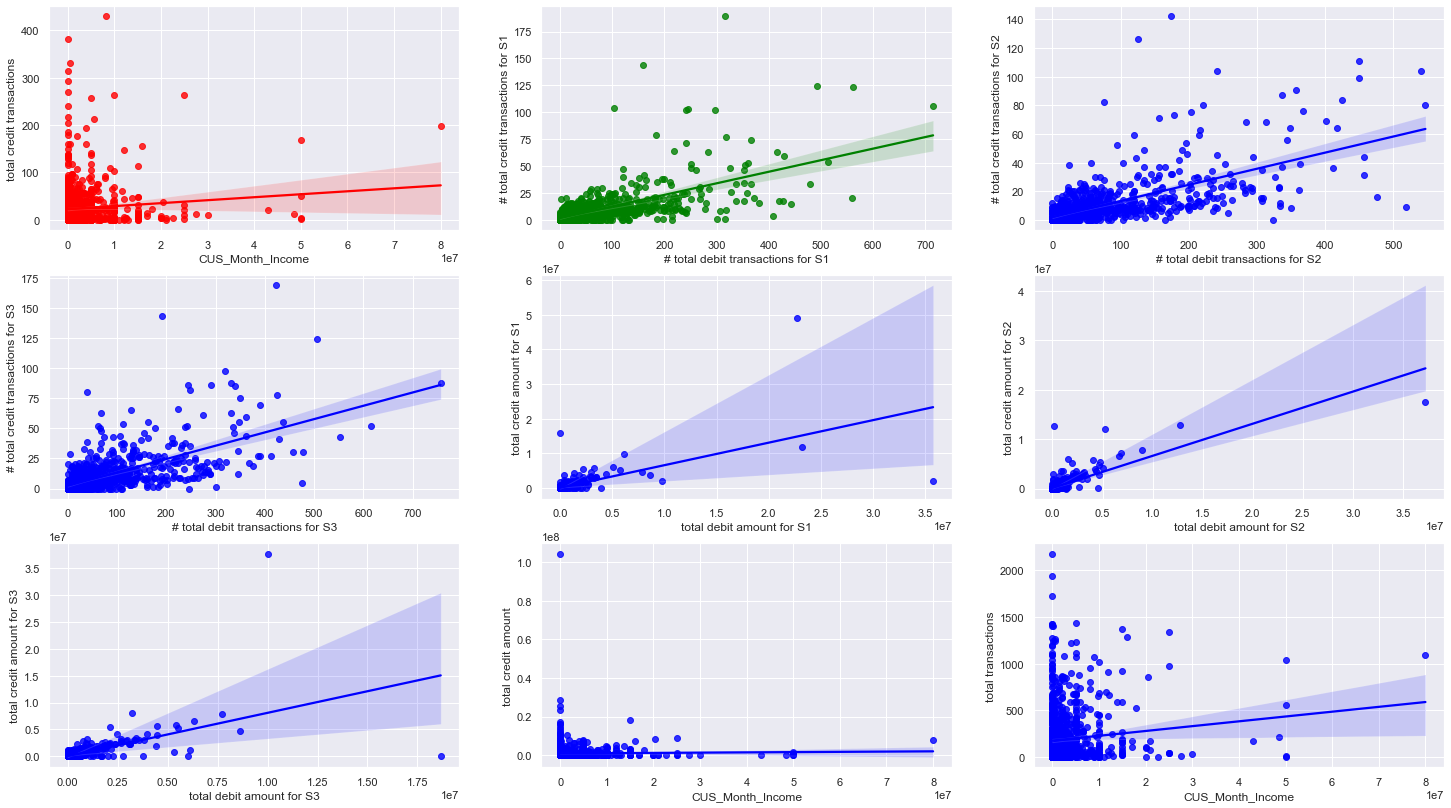

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(25,14))
sns.regplot(y='total credit transactions',x='CUS_Month_Income',data=dff,color='red',ax=axes[0,0])
sns.regplot(y='# total credit transactions for S1',x='# total debit transactions for S1',data=dff,color='green',ax=axes[0,1])
sns.regplot(y='# total credit transactions for S2',x='# total debit transactions for S2',data=dff,color='blue',ax=axes[0,2])
sns.regplot(y='# total credit transactions for S3',x='# total debit transactions for S3',data=dff,color='blue',ax=axes[1,0])
sns.regplot(y='total credit amount for S1',x='total debit amount for S1',data=dff,color='blue',ax=axes[1,1])
sns.regplot(y='total credit amount for S2',x='total debit amount for S2',data=dff,color='blue',ax=axes[1,2])
sns.regplot(y='total credit amount for S3',x='total debit amount for S3',data=dff,color='blue',ax=axes[2,0])
sns.regplot(y='total credit amount',x='CUS_Month_Income',data=dff,color='blue',ax=axes[2,1])
sns.regplot(y='total transactions',x='CUS_Month_Income',data=dff,color='blue',ax=axes[2,2])

<AxesSubplot:xlabel='total credit amount', ylabel='Density'>

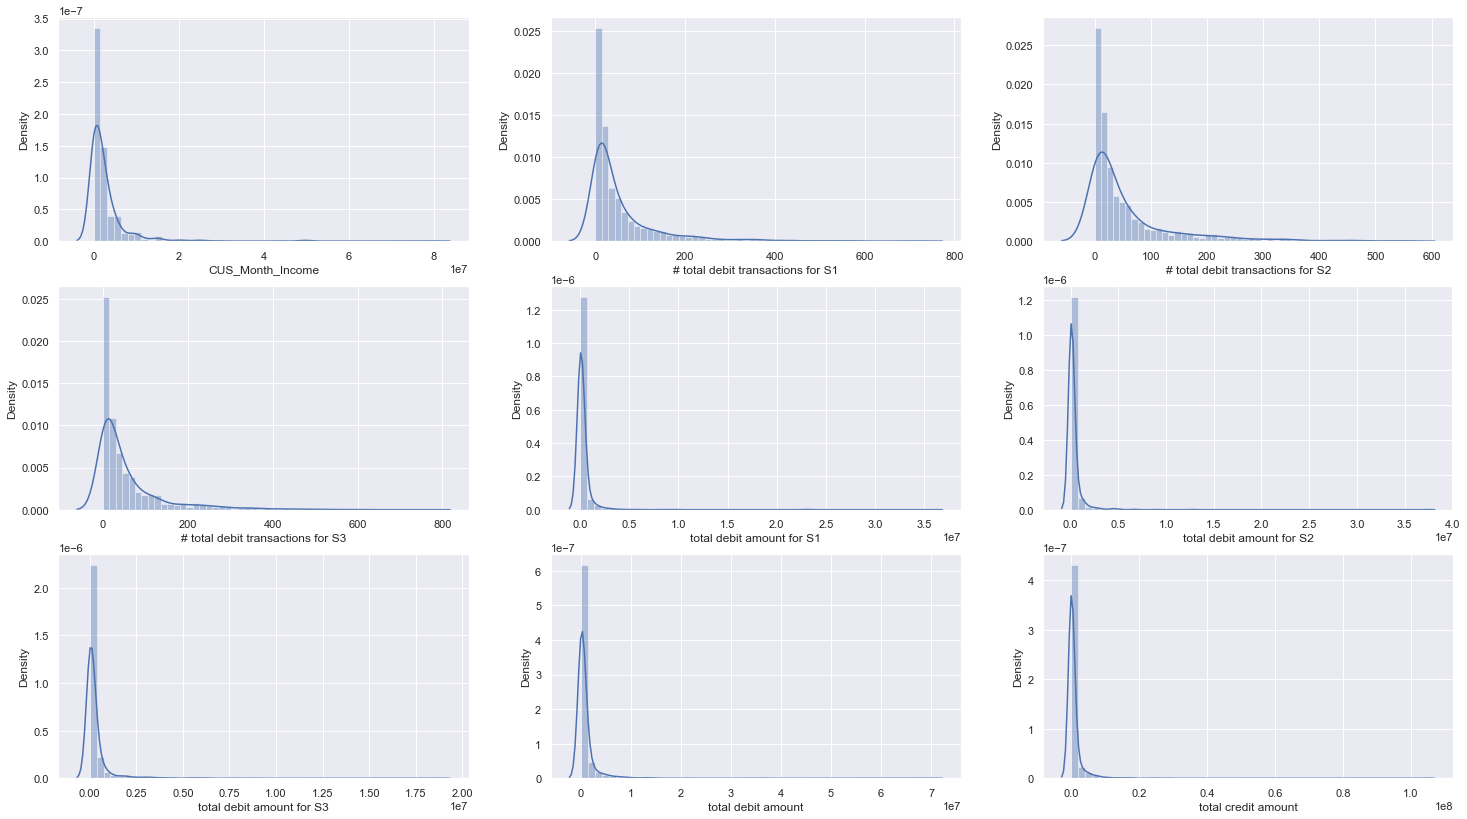

In [ ]:
#plot histogram for every column
fig, axes = plt.subplots(3, 3, figsize=(25,14))
sns.distplot(dff['CUS_Month_Income'],ax=axes[0,0])
sns.distplot(dff['# total debit transactions for S1'],ax=axes[0,1])
sns.distplot(dff['# total debit transactions for S2'],ax=axes[0,2])
sns.distplot(dff['# total debit transactions for S3'],ax=axes[1,0])
sns.distplot(dff['total debit amount for S1'],ax=axes[1,1])
sns.distplot(dff['total debit amount for S2'],ax=axes[1,2])
sns.distplot(dff['total debit amount for S3'],ax=axes[2,0])
sns.distplot(dff['total debit amount'],ax=axes[2,1])
sns.distplot(dff['total credit amount'],ax=axes[2,2])


<AxesSubplot:xlabel='total debit amount', ylabel='Density'>

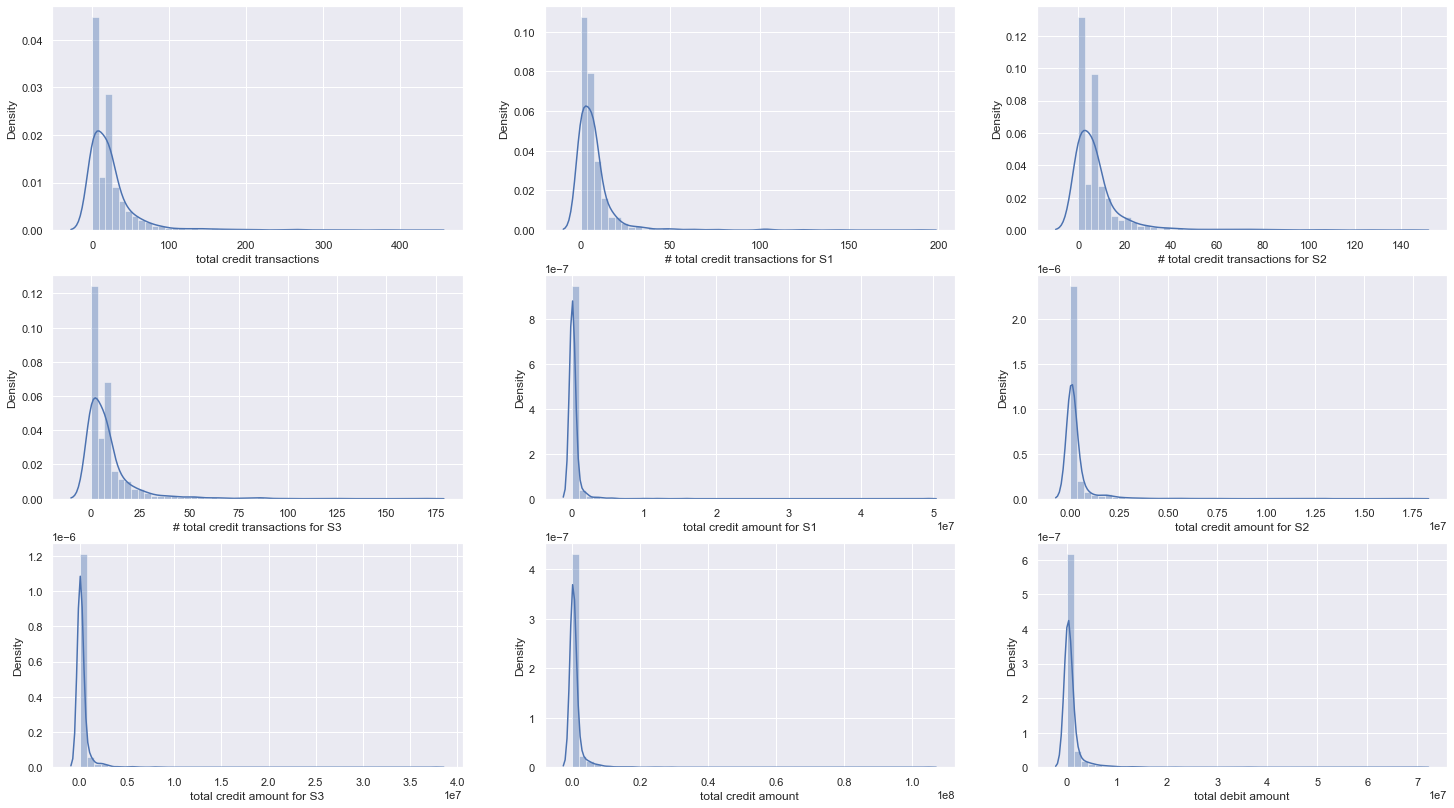

In [ ]:
#plot histogram for every column
fig, axes = plt.subplots(3, 3, figsize=(25,14))
sns.distplot(dff['total credit transactions'],ax=axes[0,0])
sns.distplot(dff['# total credit transactions for S1'],ax=axes[0,1])
sns.distplot(dff['# total credit transactions for S2'],ax=axes[0,2])
sns.distplot(dff['# total credit transactions for S3'],ax=axes[1,0])
sns.distplot(dff['total credit amount for S1'],ax=axes[1,1])
sns.distplot(dff['total credit amount for S2'],ax=axes[1,2])
sns.distplot(dff['total credit amount for S3'],ax=axes[2,0])
sns.distplot(dff['total credit amount'],ax=axes[2,1])
sns.distplot(dff['total debit amount'],ax=axes[2,2])

In [ ]:
missing_data = dff.isnull()
missing_data.head(5)

AGE  CUS_Month_Income  CUS_Gender  CUS_Marital_Status  YEARS_WITH_US  \
0  False             False       False               False          False   
1  False             False       False               False          False   
2  False             False       False               False          False   
3  False             False       False               False          False   
4  False             False       False               False          False   

   # total debit transactions for S1  # total debit transactions for S2  \
0                              False                              False   
1                              False                              False   
2                              False                              False   
3                              False                              False   
4                              False                              False   

   # total debit transactions for S3  total debit amount for S1  \
0                              False                      False   
1                              False                      False   
2                              False                      False   
3                              False                      False   
4                              False                      False   

   total debit amount for S2  ...  total debit amount  \
0                      False  ...               False   
1                      False  ...               False   
2                      False  ...               False   
3                      False  ...               False   
4                      False  ...               False   

   total debit transactions  total credit amount  total credit transactions  \
0                     False                False                      False   
1                     False                False                      False   
2                     False                False                      False   
3                     False                False                      False   
4                     False                False                      False   

   total transactions  CUS_Target  TAR_Desc  Status   Date  \
0               False       False     False   False  False   
1               False       False     False   False  False   
2               False       False     False   False  False   
3               False       False     False   False  False   
4               False       False     False   False  False   

   CUS_Customer_Since_New  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False  

[5 rows x 27 columns]

In [ ]:
for column in missing_data.columns:
    print(column)
    print (missing_data[column].value_counts())
    print("")

AGE
False    1249
Name: AGE, dtype: int64

CUS_Month_Income
False    1249
Name: CUS_Month_Income, dtype: int64

CUS_Gender
False    1249
Name: CUS_Gender, dtype: int64

CUS_Marital_Status
False    1249
Name: CUS_Marital_Status, dtype: int64

YEARS_WITH_US
False    1249
Name: YEARS_WITH_US, dtype: int64

# total debit transactions for S1
False    1249
Name: # total debit transactions for S1, dtype: int64

# total debit transactions for S2
False    1249
Name: # total debit transactions for S2, dtype: int64

# total debit transactions for S3
False    1249
Name: # total debit transactions for S3, dtype: int64

total debit amount for S1
False    1249
Name: total debit amount for S1, dtype: int64

total debit amount for S2
False    1249
Name: total debit amount for S2, dtype: int64

total debit amount for S3
False    1249
Name: total debit amount for S3, dtype: int64

# total credit transactions for S1
False    1249
Name: # total credit transactions for S1, dtype: int64

# total credit trans

In [ ]:
dff.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Columns: 27 entries, AGE to CUS_Customer_Since_New
dtypes: datetime64[ns](2), float64(9), int32(1), int64(15)
memory usage: 258.7 KB


In [ ]:
dff.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   AGE                                 1249 non-null   int64         
 1   CUS_Month_Income                    1249 non-null   float64       
 2   CUS_Gender                          1249 non-null   int64         
 3   CUS_Marital_Status                  1249 non-null   int32         
 4   YEARS_WITH_US                       1249 non-null   int64         
 5   # total debit transactions for S1   1249 non-null   int64         
 6   # total debit transactions for S2   1249 non-null   int64         
 7   # total debit transactions for S3   1249 non-null   int64         
 8   total debit amount for S1           1249 non-null   float64       
 9   total debit amount for S2           1249 non-null   float64       
 10  total debit amount for S

In [ ]:
make_grp=dff.groupby(['# total credit transactions for S1','# total credit transactions for S2','# total credit transactions for S3']).agg({'total credit amount for S1':'sum','total credit amount for S2':'sum','total credit amount for S3':'sum'}).reset_index()

make_grp1=dff.groupby(['# total debit transactions for S1','# total debit transactions for S2','# total debit transactions for S3']).agg({'total debit amount for S1':'sum','total debit amount for S2':'sum','total debit amount for S3':'sum'}).reset_index()

In [ ]:
import plotly.express as px

In [ ]:
S1=px.line(make_grp, x="# total credit transactions for S1", y="total credit amount for S1")

In [ ]:
px.line(make_grp, x="# total credit transactions for S2", y="total credit amount for S2")

In [ ]:
px.line(make_grp, x="# total credit transactions for S2", y="total credit amount for S2")

<AxesSubplot:ylabel='Frequency'>

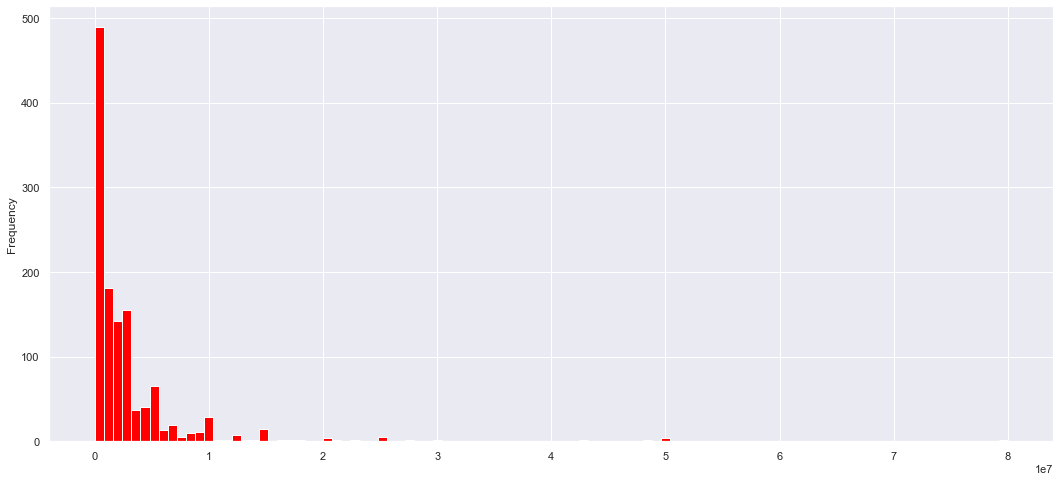

In [ ]:
#make every col as Normalize some Algorithumns required this
#dff['CUS_Month_Income'].plot(kind='hist',color='red')#1e8= 10^8
dff['CUS_Month_Income'].plot(kind='hist',color='red',bins=100)

In [ ]:
#aplly label encoding
dff['CUS_Month_Income']=dff['CUS_Month_Income'].astype('category')
dff['CUS_Month_Income']=dff['CUS_Month_Income'].cat.codes


<AxesSubplot:xlabel='CUS_Month_Income', ylabel='Count'>

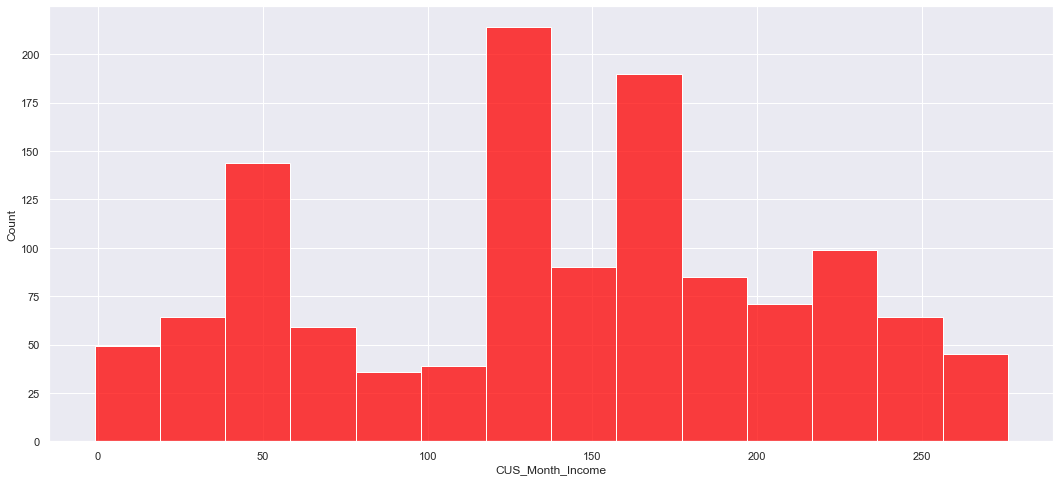

In [ ]:
sns.histplot(dff['CUS_Month_Income'],color='red')

<AxesSubplot:ylabel='Frequency'>

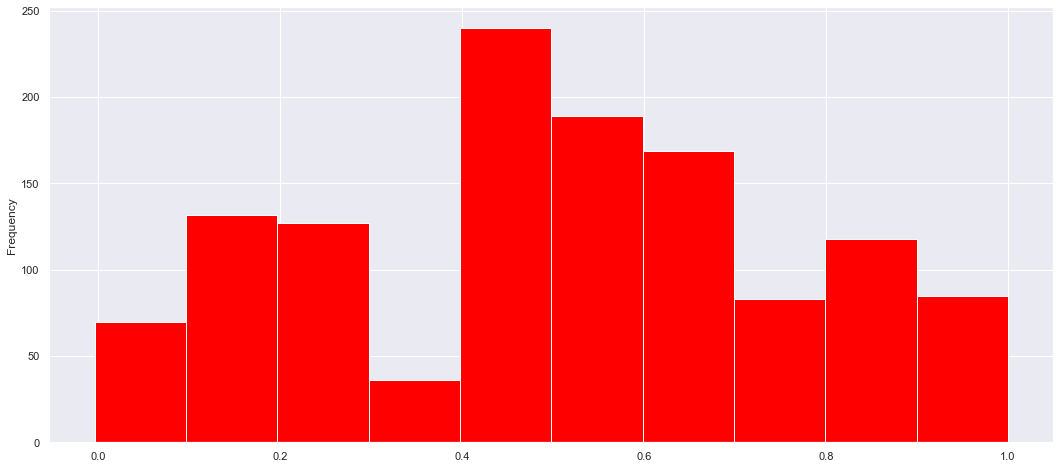

In [ ]:
#make it normalize
dff['CUS_Month_Income']=dff['CUS_Month_Income']/dff['CUS_Month_Income'].max()
dff['CUS_Month_Income'].plot(kind='hist',color='red')


In [ ]:
dff['CUS_Month_Income'].astype('int')

0       0
1       0
2       0
3       0
4       0
       ..
1244    0
1245    0
1246    0
1247    0
1248    0
Name: CUS_Month_Income, Length: 1249, dtype: int32

In [ ]:
dff['CUS_Month_Income'].value_counts().unique()

array([100,  91,  69,  61,  56,  55,  52,  45,  31,  28,  23,  22,  19,
        18,  17,  16,  15,  14,  11,  10,   9,   8,   7,   6,   5,   4,
         3,   2,   1], dtype=int64)

In [ ]:
dff['total debit amount for S1']=dff['total debit amount for S1'].astype('category')
dff['total debit amount for S1']=dff['total debit amount for S1'].cat.codes


<AxesSubplot:xlabel='total debit amount for S1', ylabel='Count'>

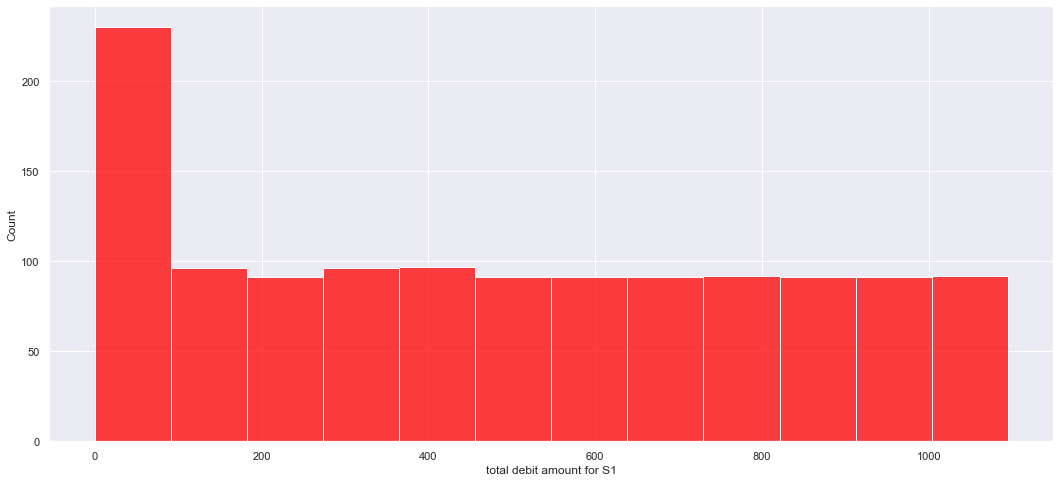

In [ ]:
sns.histplot(dff['total debit amount for S1'],color='red')

<AxesSubplot:ylabel='Frequency'>

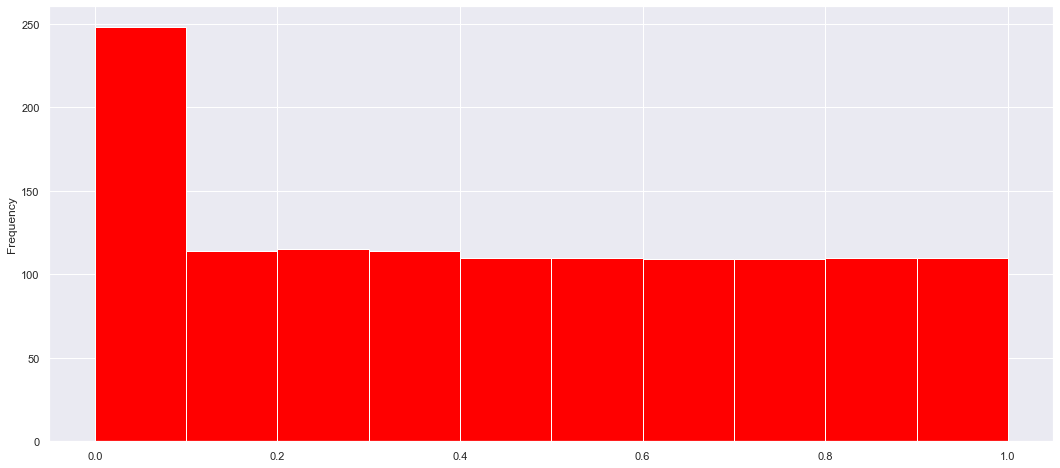

In [ ]:
#make it normalize
dff['total debit amount for S1']=dff['total debit amount for S1']/dff['total debit amount for S1'].max()
dff['total debit amount for S1'].plot(kind='hist',color='red')

<AxesSubplot:ylabel='Frequency'>

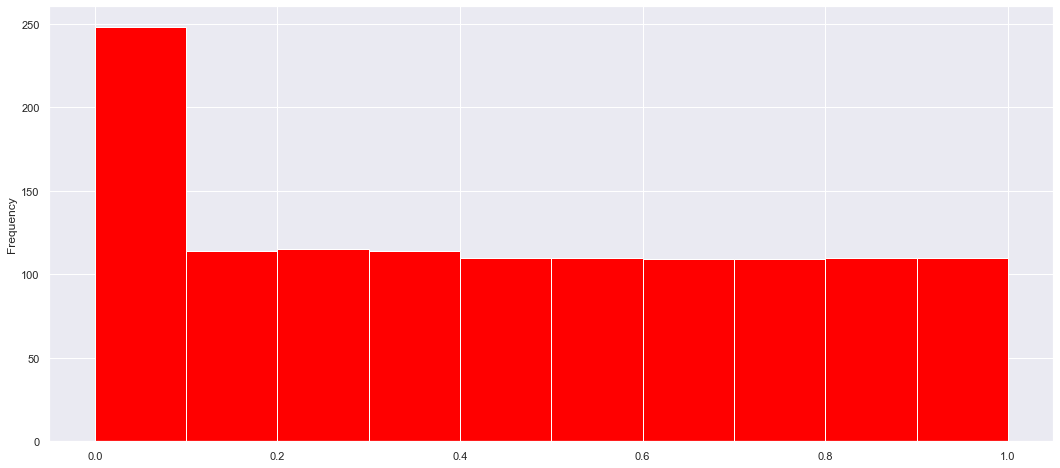

In [ ]:
dff['total debit amount for S1']=np.polynomial.Chebyshev(dff['total debit amount for S1'])
dff['total debit amount for S1'].plot(kind='hist',color='red')

In [ ]:
dff['total debit amount for S1'].astype('int')

0       0
1       0
2       0
3       0
4       0
       ..
1244    0
1245    0
1246    0
1247    0
1248    0
Name: total debit amount for S1, Length: 1249, dtype: int32

In [ ]:
dff['total debit amount for S1'].value_counts()

0.000000    106
0.019178     11
0.023744      7
0.262100      3
0.031963      3
           ... 
0.427397      1
0.740639      1
0.524201      1
0.312329      1
0.456621      1
Name: total debit amount for S1, Length: 1096, dtype: int64

In [ ]:
dff['total debit amount for S2']=dff['total debit amount for S2'].astype('category')
dff['total debit amount for S2']=dff['total debit amount for S2'].cat.codes


<AxesSubplot:xlabel='total debit amount for S2', ylabel='Count'>

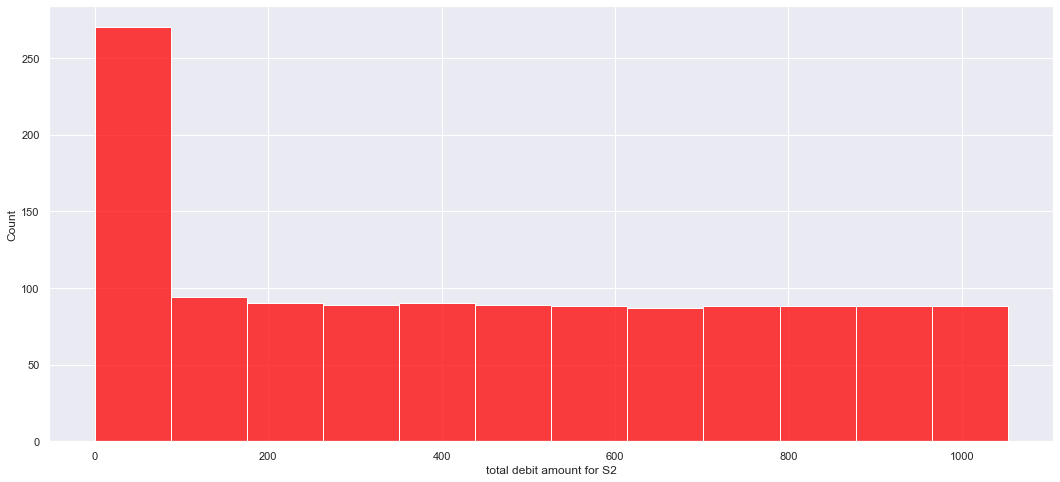

In [ ]:
sns.histplot(dff['total debit amount for S2'],color='red')

<AxesSubplot:ylabel='Frequency'>

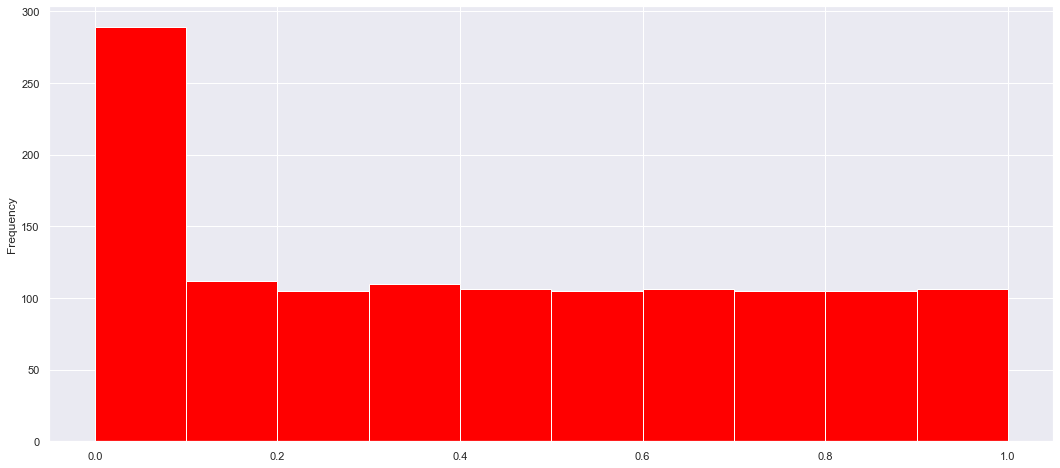

In [ ]:
#make it normalize
dff['total debit amount for S2']=dff['total debit amount for S2']/dff['total debit amount for S2'].max()
dff['total debit amount for S2'].plot(kind='hist',color='red')

In [ ]:
dff['total debit amount for S2'].astype('int')

0       0
1       0
2       0
3       0
4       0
       ..
1244    0
1245    0
1246    0
1247    0
1248    0
Name: total debit amount for S2, Length: 1249, dtype: int32

In [ ]:
dff['total debit amount for S2'].value_counts()

0.000000    152
0.021842      6
0.022792      5
0.015195      5
0.029440      5
           ... 
0.395062      1
0.165242      1
0.188034      1
0.707502      1
0.830009      1
Name: total debit amount for S2, Length: 1054, dtype: int64

In [ ]:
dff['total debit amount for S2'].unique()

array([0.93447293, 0.16904084, 0.07502374, ..., 0.86419753, 0.85280152,
       0.8300095 ])

<AxesSubplot:xlabel='total debit amount for S3', ylabel='Count'>

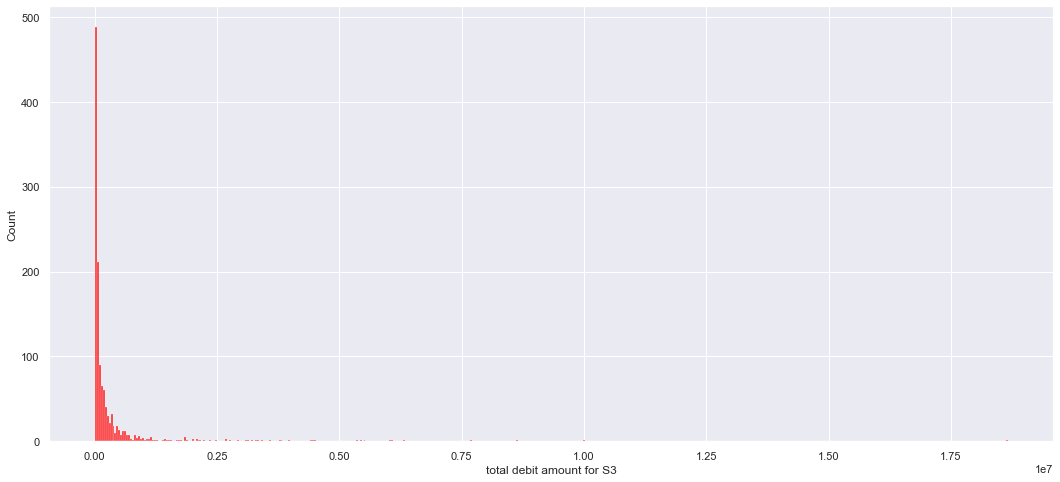

In [ ]:
sns.histplot(dff['total debit amount for S3'],color='red')

In [ ]:
dff['total debit amount for S3']=dff['total debit amount for S3'].astype('category')
dff['total debit amount for S3']=dff['total debit amount for S3'].cat.codes

<AxesSubplot:ylabel='Frequency'>

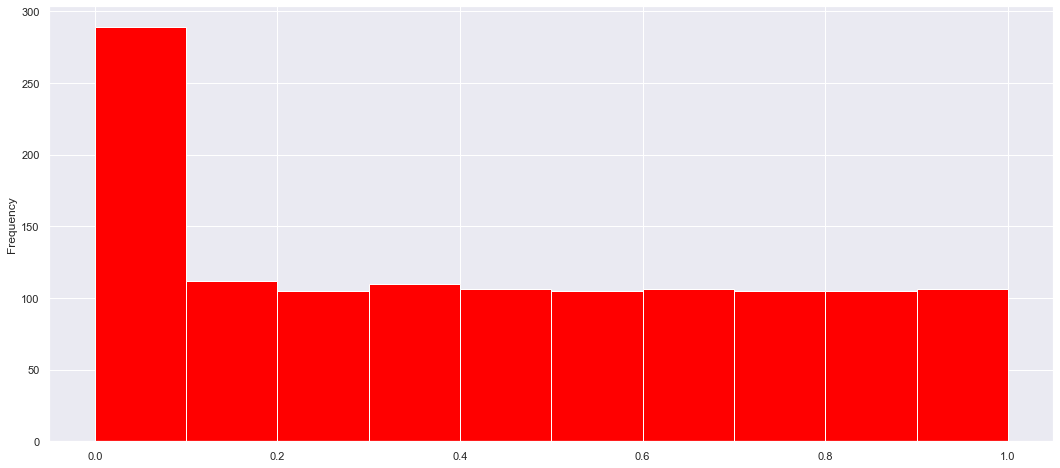

In [ ]:
#make it normalize
dff['total debit amount for S2']=dff['total debit amount for S2']/dff['total debit amount for S2'].max()
dff['total debit amount for S2'].plot(kind='hist',color='red')

In [ ]:
dff['total debit amount for S2'].astype('int')

0       0
1       0
2       0
3       0
4       0
       ..
1244    0
1245    0
1246    0
1247    0
1248    0
Name: total debit amount for S2, Length: 1249, dtype: int32

<AxesSubplot:ylabel='Density'>

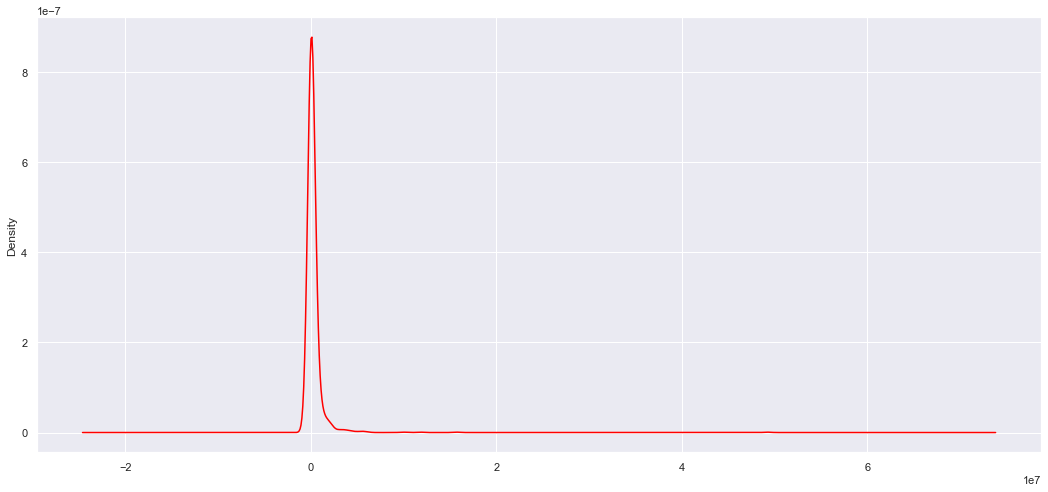

In [ ]:
dff['total credit amount for S1'].plot(kind='kde',color='red')

<AxesSubplot:ylabel='Density'>

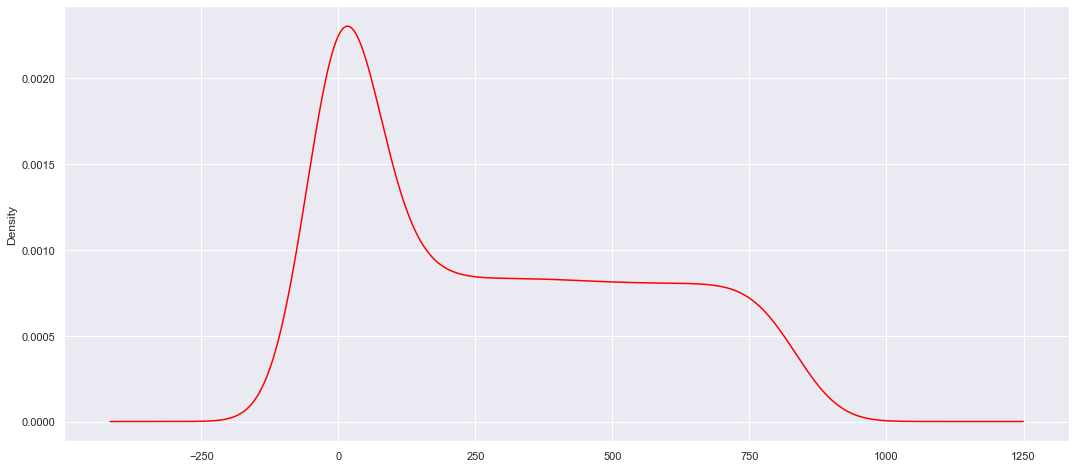

In [ ]:
dff['total credit amount for S1']=dff['total credit amount for S1'].astype('category')
dff['total credit amount for S1']=dff['total credit amount for S1'].cat.codes
dff['total credit amount for S1'].plot(kind='kde',color='red')

<AxesSubplot:ylabel='Frequency'>

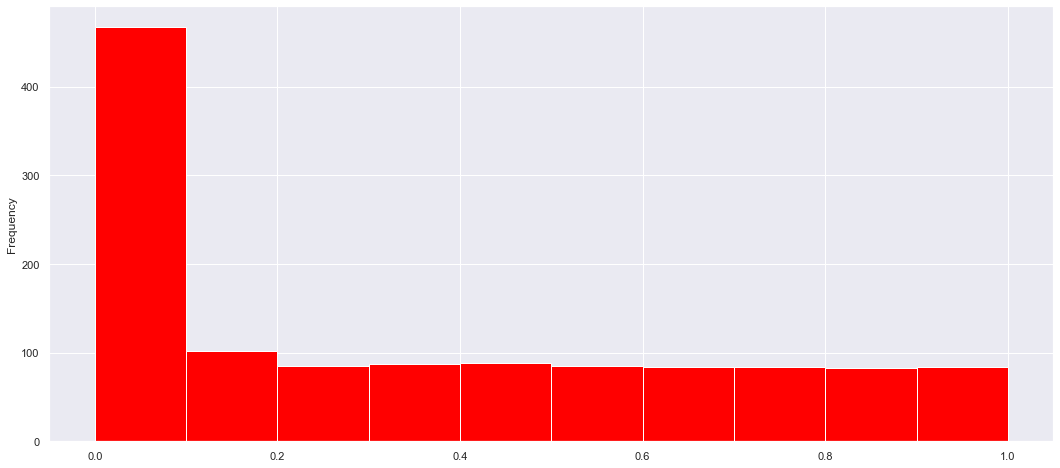

In [ ]:
#make it normalize
dff['total credit amount for S1']=dff['total credit amount for S1']/dff['total credit amount for S1'].max()
dff['total credit amount for S1'].plot(kind='hist',color='red')

In [ ]:
dff['total credit amount for S1'].astype('int')

0       0
1       0
2       0
3       0
4       0
       ..
1244    0
1245    0
1246    0
1247    0
1248    0
Name: total credit amount for S1, Length: 1249, dtype: int32

In [ ]:
dff['total credit amount for S1'].value_counts()

0.000000    341
0.067227      8
0.016807      6
0.117647      5
0.033613      5
           ... 
0.481393      1
0.222089      1
0.452581      1
0.977191      1
0.774310      1
Name: total credit amount for S1, Length: 834, dtype: int64

<AxesSubplot:ylabel='Density'>

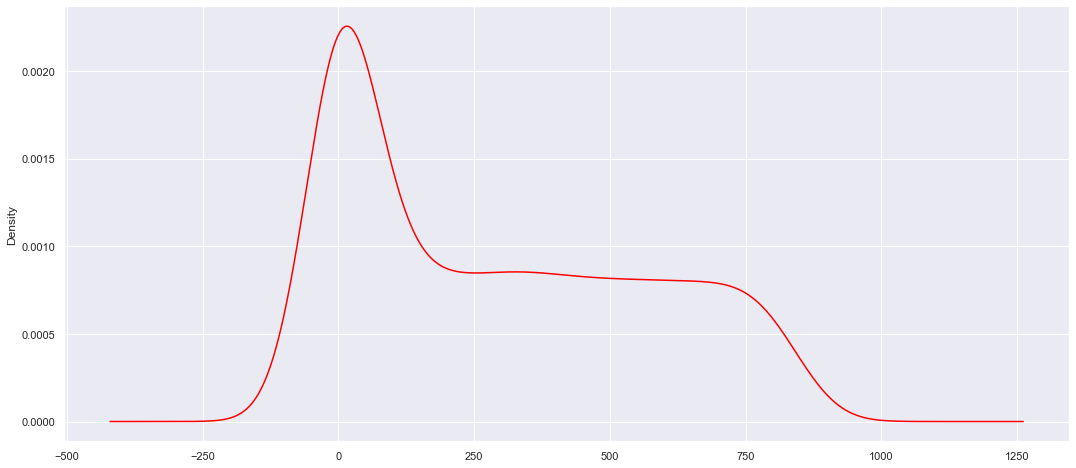

In [ ]:
dff['total credit amount for S2']=dff['total credit amount for S2'].astype('category')
dff['total credit amount for S2']=dff['total credit amount for S2'].cat.codes
dff['total credit amount for S2'].plot(kind='kde',color='red')

<AxesSubplot:ylabel='Frequency'>

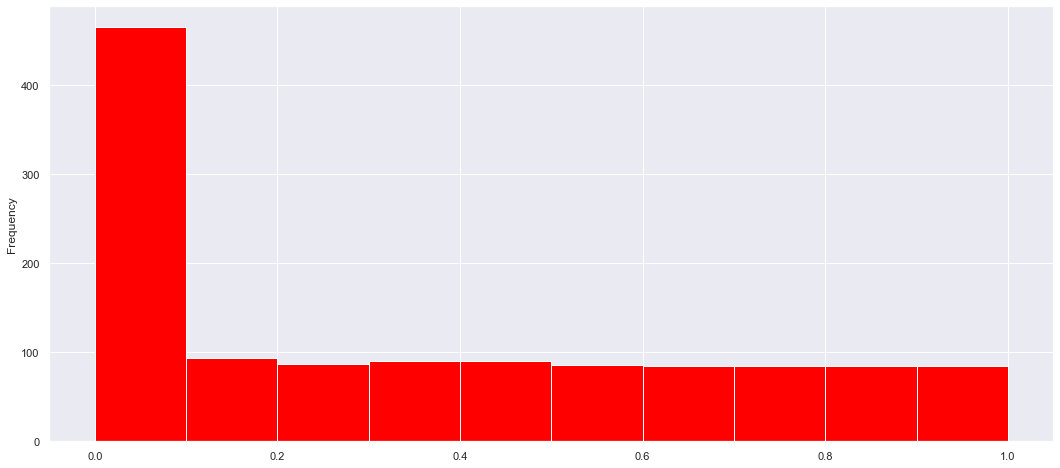

In [ ]:
#make it normalize
dff['total credit amount for S2']=dff['total credit amount for S2']/dff['total credit amount for S2'].max()
dff['total credit amount for S2'].plot(kind='hist',color='red')

In [ ]:
dff['total credit amount for S2'].astype('int')

0       0
1       0
2       0
3       0
4       0
       ..
1244    0
1245    0
1246    0
1247    0
1248    0
Name: total credit amount for S2, Length: 1249, dtype: int32

#create a funtion to make it categorical and normalize and plot
def cat_norm_plot(dff,col_name):
    dff[col_name]=dff[col_name].astype('category')
    dff[col_name]=dff[col_name].cat.codes
    dff[col_name]=dff[col_name]/dff[col_name].max()
    dff[col_name].plot(kind='hist',color='red')
    dff[col_name].astype('int')
    dff[col_name].value_counts()



In [ ]:
LR=LinearRegression()

In [ ]:
#change datatype of columns into int
dff['CUS_Month_Income']=dff['CUS_Month_Income'].astype(int)
dff['CUS_Marital_Status']=dff['CUS_Marital_Status'].astype(int)

dff['total debit amount for S1']=dff['total debit amount for S1'].astype(int)
dff['total debit amount for S2']=dff['total debit amount for S2'].astype(int)
dff['total debit amount for S3']=dff['total debit amount for S3'].astype(int)

dff['total credit amount for S1']=dff['total credit amount for S1'].astype(int)
dff['total credit amount for S2']=dff['total credit amount for S2'].astype(int)
dff['total credit amount for S3']=dff['total credit amount for S3'].astype(int)


dff['total credit amount']=dff['total credit amount'].astype(int)
dff['total debit amount']=dff['total debit amount'].astype(int)


In [ ]:
dff.dtypes

AGE                                            int64
CUS_Month_Income                               int32
CUS_Gender                                     int64
CUS_Marital_Status                             int32
YEARS_WITH_US                                  int64
# total debit transactions for S1              int64
# total debit transactions for S2              int64
# total debit transactions for S3              int64
total debit amount for S1                      int32
total debit amount for S2                      int32
total debit amount for S3                      int32
# total credit transactions for S1             int64
# total credit transactions for S2             int64
# total credit transactions for S3             int64
total credit amount for S1                     int32
total credit amount for S2                     int32
total credit amount for S3                     int32
total debit amount                             int32
total debit transactions                      

In [ ]:
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [ ]:
#get accurancy_score
from sklearn.metrics import accuracy_score
print(LR.score(X_train,y_train))
print(LR.score(X_test,y_test))
print(LR.score(X_test,y_pred))

0.13739308183375343
0.12920343890897434
1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
LRR=LogisticRegression()

In [ ]:
LRR.fit(X_train,y_train)
y_pred=LRR.predict(X_test)

In [ ]:
print(LR.score(X_train,y_train))
print(LR.score(X_test,y_test))
print(LR.score(X_test,y_pred))

0.13739308183375343
0.12920343890897434
-9.463329995533895


from sklearn.linear_model import Ridge,Lasso,ElasticNet,RidgeCV,LassoCV,ElasticNetCV,LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC,SVR,LinearSVR
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB,ComplementNB,CategoricalNB

kf =KFold(n_splits=5, shuffle=True, random_state=42)
score=cross_val_score(LR,X,y,cv=kf,scoring='accuracy')

df.to_excel('CHURN_D.xlsx',index=False)

#install eval-ml
!pip install evalml

X=dff.drop(['Status'],axis=1)
y=dff['Status']

!pip install "evalml[update_checker]"

import evalml
evalml.problem_types.ProblemTypes.all_problem_types

import evalml 
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='binary_classification')


from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

automl.rankings

automl.best_pipeline

best_pipeline=automl.best_pipeline

automl.describe_pipeline(automl.rankings.iloc[0]["AGE"])

### Evaluate on hold out data
best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall","classification_report"])

automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

automl_auc.rankings

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)
X=data.drop('Status',axis=1)
y=data.Status

In [4]:
# import library
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)
from collections import Counter
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(x_smote))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 1022, 1: 227})
Resample dataset shape Counter({'AGE': 1, 'CUS_Month_Income': 1, 'YEARS_WITH_US': 1, '# total debit transactions for S1': 1, '# total debit transactions for S2': 1, 'total debit amount for S1': 1, 'total debit amount for S2': 1, 'total debit amount for S3': 1, '# total credit transactions for S1': 1, '# total credit transactions for S2': 1, 'total credit amount for S1': 1, 'total credit amount for S2': 1, 'total credit amount for S3': 1, 'total debit amount': 1, 'total debit transactions': 1, 'total credit amount': 1, 'total credit transactions': 1, 'total transactions': 1, 'CUS_Gender_MALE': 1, 'CUS_Marital_Status_DIVORCE': 1, 'CUS_Marital_Status_MARRIED': 1, 'TAR_Desc_EXECUTIVE': 1, 'TAR_Desc_PLATINUM': 1})
Resample dataset shape Counter({0: 1022, 1: 1022})


In [5]:
#balanced Status column with oversampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.1, random_state=22)
#get shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1839, 23), (205, 23), (1839,), (205,))

# transform the datase
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
sm = SMOTE(random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

In [ ]:
!pip install auto-sklearn

In [ ]:
#apply auto-sklearn
import autosklearn
from autosklearn.classification import AutoSklearnClassifier
from autosklearn.metrics import accuracy
#apply
autosklearn_classifier = AutoSklearnClassifier(time_left_for_this_task=25*30, per_run_time_limit=130, n_jobs=-1,ensemble_size=10000)
autosklearn_classifier.fit(X_train, y_train)
#predict

#get the prediction score.
accuracy_score = accuracy(y_test, autosklearn_classifier.predict(X_test))
print(accuracy_score)

0.8780487804878049


In [ ]:
y_decsion=autosklearn_classifier.predict(X_test)
print(accuracy(y_test,y_decsion))

0.8780487804878049


In [ ]:
print(autosklearn_classifier.score(X_train, y_train))
print(autosklearn_classifier.score(X_test, y_test))

0.964110929853181
0.8780487804878049


In [ ]:
print(autosklearn_classifier.show_models())

{24: {'model_id': 24, 'rank': 1, 'cost': 0.10543657331136735, 'ensemble_weight': 0.1315, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f685dfc6290>, 'balancing': Balancing(random_state=1, strategy='weighting'), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f684cb5b250>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f684d118050>, 'sklearn_classifier': HistGradientBoostingClassifier(early_stopping=False,
                               l2_regularization=1.0647401999412075e-10,
                               learning_rate=0.08291320147381159, max_iter=512,
                               max_leaf_nodes=39, n_iter_no_change=0,
                               random_state=1, validation_fraction=None,
                               warm_start=True)}, 8: {'model_id': 8, 'rank': 2, 'cost': 0.11037891268533773, 'ensembl

In [ ]:
autosklearn_classifier.get_params()

{'dask_client': None,
 'delete_tmp_folder_after_terminate': True,
 'disable_evaluator_output': False,
 'ensemble_nbest': 50,
 'ensemble_size': 10000,
 'exclude': None,
 'get_smac_object_callback': None,
 'get_trials_callback': None,
 'include': None,
 'initial_configurations_via_metalearning': 25,
 'load_models': True,
 'logging_config': None,
 'max_models_on_disc': 50,
 'memory_limit': 3072,
 'metadata_directory': None,
 'metric': None,
 'n_jobs': -1,
 'per_run_time_limit': 130,
 'resampling_strategy': 'holdout',
 'resampling_strategy_arguments': None,
 'scoring_functions': None,
 'seed': 1,
 'smac_scenario_args': None,
 'time_left_for_this_task': 750,
 'tmp_folder': None}

In [ ]:
autosklearn_classifier.get_models_with_weights()

[(0.1395,
  SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'adaboost', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'extra_trees_preproc_for_classification', 'classifier:adaboost:algorithm': 'SAMME.R', 'classifier:adaboost:learning_rate': 0.046269426995092074, 'classifier:adaboost:max_depth': 3, 'classifier:adaboost:n_estimators': 406, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:extra_trees_preproc_for_classification:bootstrap': 'False', 'feature_preprocessor:extra_trees_preproc_for_classification:criterion': 'entropy', 'feature_preprocesso

In [ ]:
# show all models
show_modes_str=autosklearn_classifier.show_models()
sprint_statistics_str = autosklearn_classifier.sprint_statistics()

In [ ]:
!pip install pipelineprofiler

In [ ]:
import PipelineProfiler
# automl is an object Which has already been created.
profiler_data= PipelineProfiler.import_autosklearn(autosklearn_classifier)
PipelineProfiler.plot_pipeline_matrix(profiler_data)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
TIME_BUDGET=60
from autosklearn.experimental.askl2 import AutoSklearn2Classifier
automl = autosklearn.experimental.askl2.AutoSklearn2Classifier(
time_left_for_this_task=TIME_BUDGET,
n_jobs=-1,
metric=autosklearn.metrics.roc_auc,
)

In [ ]:
automl.fit(X_train, y_train )

AutoSklearn2Classifier(metric=roc_auc, n_jobs=-1, per_run_time_limit=12,
                       time_left_for_this_task=60)

In [ ]:
#define the model
TIME_BUDGET=60
automl = autosklearn.classification.AutoSklearnClassifier(
time_left_for_this_task=TIME_BUDGET,
metric=autosklearn.metrics.roc_auc,
n_jobs=-1,
resampling_strategy='cv',
resampling_strategy_arguments={'folds': 5},
)

In [ ]:
automl.fit(X_train, y_train )

AutoSklearnClassifier(metric=roc_auc, n_jobs=-1, per_run_time_limit=12,
                      resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 5},
                      time_left_for_this_task=60)

In [ ]:
#https://www.analyticsvidhya.com/blog/2021/09/10-automated-machine-learning-for-supervised-learning-part-2/

In [6]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
#import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor,  DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier, AdaBoostClassifier,AdaBoostRegressor, BaggingClassifier, BaggingRegressor, ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, cross_validate, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LogisticRegression, LinearRegression, SGDClassifier, SGDRegressor, Perceptron, PassiveAggressiveClassifier, PassiveAggressiveRegressor
# import knn 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
#cross_validation 
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold, GridSearchCV, RandomizedSearchCV, learning_curve
#import ensemble
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier,AdaBoostRegressor, BaggingClassifier, BaggingRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#import repeated cross validation
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold,StratifiedKFold


In [7]:
#apply logistic with cross validation and random search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
#worning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#apply
logreg = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2','elasticnet'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'random_state': [7], 'max_iter': [100,1000,2000,3000], 'tol': [0.001]}
grid_search = GridSearchCV(logreg.fit(X_train, y_train), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1000, 'max_iter': 1000, 'penalty': 'l2', 'random_state': 7, 'solver': 'newton-cg', 'tol': 0.001}
0.854054054054054


In [ ]:
print(grid_search.best_score_)

0.854054054054054


In [8]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [ ]:
!pip install catboost

In [ ]:
#apply catboost and lightboost
import catboost
from catboost import CatBoostClassifier
import lightgbm 
from lightgbm import LGBMClassifier
#apply
model=LGBMClassifier(iterations=100,learning_rate=0.1,depth=17,loss_function='Logloss',random_seed=124,class_weights='balanced',n_estimators=1000,max_feature=23)
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))

0.8778625954198473
Train Accuracy : 1.0
Train Confusion Matrix:
[[739   0]
 [  0 741]]
--------------------------------------------------
Test Accuracy : 0.8778625954198473
Test Confusion Matrix:
[[110  22]
 [ 10 120]]
None


In [ ]:
#apply
model=LGBMClassifier(iterations=100,learning_rate=0.1,depth=17,loss_function='Logloss',random_seed=124,class_weights='balanced',n_estimators=1000)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2','elasticnet'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'random_state': [7], 'max_iter': [100,1000,2000,3000], 'tol': [0.001]}
grid_search = RandomizedSearchCV(model.fit(X_train, y_train), param_grid, cv=StratifiedKFold(n_splits=14, shuffle=True, random_state=7), scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'tol': 0.001, 'solver': 'newton-cg', 'random_state': 7, 'penalty': 'l1', 'max_iter': 1000, 'C': 0.1}
0.8899178539340264


In [ ]:
print(evaluate_model(grid_search))

Train Accuracy : 1.0
Train Confusion Matrix:
[[739   0]
 [  0 741]]
--------------------------------------------------
Test Accuracy : 0.8778625954198473
Test Confusion Matrix:
[[110  22]
 [ 10 120]]
None


In [ ]:
y_pred=model.predict(X_test)
y_decsion=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[110  22]
 [ 10 120]] : is the confusion matrix 

0.8778625954198473 : is the accuracy score
0.8450704225352113 : is the precision score
0.9230769230769231 : is the recall score
0.8823529411764706 : is the f1 score


0.8782051282051282
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       132
           1       0.85      0.92      0.88       130

    accuracy                           0.88       262
   macro avg       0.88      0.88      0.88       262
weighted avg       0.88      0.88      0.88       262

0.8450704225352113
0.9230769230769231
0.8823529411764706


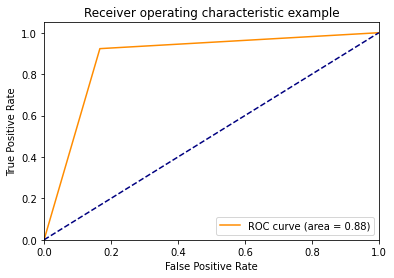

In [ ]:
print(roc_auc_score(y_test,y_decsion))
print(classification_report(y_test,y_pred))
print(precision_score(y_test,y_decsion))
print(recall_score(y_test,y_decsion))
print(f1_score(y_test,y_decsion))
#get auc roc curve
from sklearn.metrics import roc_curve, auc
#build
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
#plot
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
Logistic=LogisticRegression()
Logistic.fit(X_train,y_train)
y_pred=Logistic.predict(X_test)

In [ ]:
# prepare the cross-validation procedure
from sklearn.model_selection import KFold
cv = KFold(n_splits=100, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
#import mean and standard deviation
print('Accuracy: %.3f +/- %.3f' % (scores.mean(), scores.std()))
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.753 +/- 0.095


In [ ]:
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
cv = RepeatedKFold(n_splits=100, random_state=1)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model,X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
#import mean and standard deviation
print('Accuracy: %.3f +/- %.3f' % (scores.mean(), scores.std()))
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.751 +/- 0.109


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[105  27]
 [ 33  97]] : is the confusion matrix 

0.7709923664122137 : is the accuracy score
0.782258064516129 : is the precision score
0.7461538461538462 : is the recall score
0.7637795275590551 : is the f1 score


In [ ]:
!pip install imblearn

In [ ]:
# import library
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)
from collections import Counter
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(x_smote))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 1022, 1: 1022})
Resample dataset shape Counter({'AGE': 1, 'CUS_Month_Income': 1, 'YEARS_WITH_US': 1, '# total debit transactions for S1': 1, '# total debit transactions for S2': 1, 'total debit amount for S1': 1, 'total debit amount for S2': 1, 'total debit amount for S3': 1, '# total credit transactions for S1': 1, '# total credit transactions for S2': 1, 'total credit amount for S1': 1, 'total credit amount for S2': 1, 'total credit amount for S3': 1, 'total debit amount': 1, 'total debit transactions': 1, 'total credit amount': 1, 'total credit transactions': 1, 'total transactions': 1, 'CUS_Gender_MALE': 1, 'CUS_Marital_Status_DIVORCE': 1, 'CUS_Marital_Status_MARRIED': 1, 'TAR_Desc_EXECUTIVE': 1, 'TAR_Desc_PLATINUM': 1})
Resample dataset shape Counter({0: 1022, 1: 1022})


In [ ]:
#balanced Status column with oversampling
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.1, random_state=22)
#get shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1839, 23), (205, 23), (1839,), (205,))

In [ ]:
#apply
model=LGBMClassifier(iterations=100,learning_rate=0.1,depth=17,loss_function='Logloss',random_seed=124,class_weights='balanced',n_estimators=1000)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2','elasticnet'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'random_state': [7], 'max_iter': [100,1000,2000,3000], 'tol': [0.001]}
grid_search = RandomizedSearchCV(model.fit(X_train, y_train), param_grid, cv=StratifiedKFold(n_splits=14, shuffle=True, random_state=7), scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'tol': 0.001, 'solver': 'lbfgs', 'random_state': 7, 'penalty': 'l2', 'max_iter': 100, 'C': 0.1}
0.9108258154059683


In [ ]:
print(evaluate_model(grid_search))

Train Accuracy : 1.0
Train Confusion Matrix:
[[915   0]
 [  0 924]]
--------------------------------------------------
Test Accuracy : 0.9170731707317074
Test Confusion Matrix:
[[95 12]
 [ 5 93]]
None


In [ ]:
#apply cross validation with decision tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
#apply
from sklearn.model_selection import KFold
cv = KFold(n_splits=100, random_state=1, shuffle=True)
# create model
model = DecisionTreeClassifier()
# evaluate model
scores = cross_val_score(model, X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
#import mean and standard deviation
print('Accuracy: %.3f +/- %.3f' % (scores.mean(), scores.std()))
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.851 +/- 0.083


In [ ]:
y_pred=cross_val_predict(model,X_test,y_test,cv=cv)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1])

0.8048780487804879
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       107
           1       0.76      0.81      0.78        98

    accuracy                           0.79       205
   macro avg       0.79      0.79      0.79       205
weighted avg       0.79      0.79      0.79       205



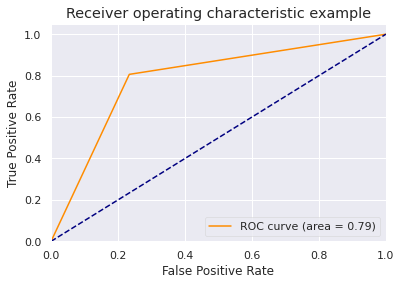

In [ ]:

print(accuracy_score(y_test,pred))
print(classification_report(y_test,y_pred))
from sklearn.metrics import roc_curve, auc
#build
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#plot
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',random_state=33)
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
# Params for classifier
params = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              # "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [ ]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
 #Classifier Pipeline
pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier())
]) 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(estimator = pipeline,param_distributions = random_grid,n_iter = 100, cv = cv, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
sorted(pipeline.get_params().keys())

['classifier',
 'classifier__ccp_alpha',
 'classifier__class_weight',
 'classifier__criterion',
 'classifier__max_depth',
 'classifier__max_features',
 'classifier__max_leaf_nodes',
 'classifier__min_impurity_decrease',
 'classifier__min_impurity_split',
 'classifier__min_samples_leaf',
 'classifier__min_samples_split',
 'classifier__min_weight_fraction_leaf',
 'classifier__presort',
 'classifier__random_state',
 'classifier__splitter',
 'memory',
 'steps',
 'verbose']

In [ ]:
#apply decision tree with cross validation
#apply
from sklearn.model_selection import KFold
cv = RepeatedStratifiedKFold(n_splits=100, random_state=3)
# create model
model = DecisionTreeClassifier()
# evaluate model
scores = cross_val_score(model, X_train,y_train, scoring='accuracy', cv=cv)
#fit model
model.fit( X_train,y_train)
#predict
y_decsion=cross_val_predict(model,X_test,y_test)
#classification report
print(accuracy_score(y_test,y_decsion))

0.8


0.8
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       107
           1       0.78      0.81      0.79        98

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205



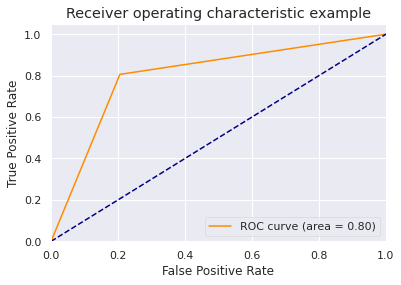

In [ ]:

print(accuracy_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
from sklearn.metrics import roc_curve, auc
#build
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
#plot
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(loss='log',random_state=33,max_iter=1000,penalty='l1')
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
#get train score
model.score(X_train,y_train)
print(classification_report(y_test,y_decsion))

0.7658536585365854
              precision    recall  f1-score   support

           0       0.83      0.69      0.76       107
           1       0.72      0.85      0.78        98

    accuracy                           0.77       205
   macro avg       0.77      0.77      0.77       205
weighted avg       0.78      0.77      0.76       205



In [ ]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(random_state=3,loss='squared_hinge',penalty='l2',max_iter=1000)
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(model.score(X_train,y_train))
print(accuracy_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))

0.7025557368134856
0.7170731707317073
              precision    recall  f1-score   support

           0       0.66      0.93      0.78       107
           1       0.87      0.48      0.62        98

    accuracy                           0.72       205
   macro avg       0.77      0.71      0.70       205
weighted avg       0.76      0.72      0.70       205



1.0
0.9170731707317074
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       107
           1       0.88      0.96      0.92        98

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



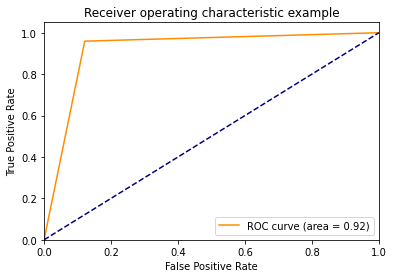

Train Accuracy : 1.0
Train Confusion Matrix:
[[915   0]
 [  0 924]]
--------------------------------------------------
Test Accuracy : 0.9170731707317074
Test Confusion Matrix:
[[94 13]
 [ 4 94]]


In [9]:
#let's apply random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
cv=KFold(n_splits=10,random_state=1,shuffle=True)
model=RandomForestClassifier(n_estimators=100,random_state=1234,criterion='gini',max_depth=20,max_features=3,min_samples_split=2,min_samples_leaf=1)
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(model.score(X_train,y_train))
print(accuracy_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
#plot
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
evaluate_model(model)

#save the model in h5 format
from sklearn.externals import joblib
joblib.dump(rfe, 'rfe.h5')

In [16]:
#save the model
import joblib
joblib.dump(model, 'rfe.pkl')
#load the model
rfe = joblib.load('rfe.pkl')


0.9483414899401849
0.8878048780487805
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       107
           1       0.84      0.95      0.89        98

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



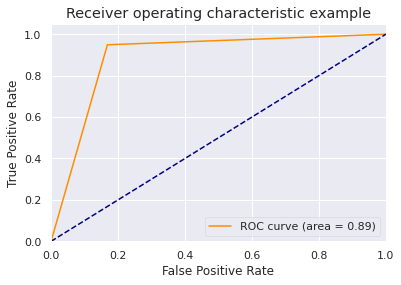

Train Accuracy : 0.9483414899401849
Train Confusion Matrix:
[[830  85]
 [ 10 914]]
--------------------------------------------------
Test Accuracy : 0.8878048780487805
Test Confusion Matrix:
[[89 18]
 [ 5 93]]


In [ ]:
from sklearn.utils import shuffle
#import extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
#apply 
model=ExtraTreesClassifier(n_estimators=1000,random_state=124,criterion='gini',max_depth=17,max_features=3,min_samples_split=2,min_samples_leaf=1)
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(model.score(X_train,y_train))
print(accuracy_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
#plot
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
evaluate_model(model)

In [ ]:
#apply with cross validation
cv=StratifiedKFold(n_splits=100,random_state=1,shuffle=True)
model=ExtraTreesClassifier(n_estimators=1000,random_state=124,criterion='gini',max_depth=17,max_features=3,min_samples_split=2,min_samples_leaf=1)
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
print(scores)
print(scores.mean())

[0.94736842 0.73684211 0.94736842 0.84210526 0.68421053 0.89473684
 0.78947368 0.84210526 0.94736842 0.84210526 0.73684211 0.73684211
 0.89473684 0.73684211 0.84210526 0.94736842 0.94736842 0.78947368
 0.94736842 0.89473684 0.89473684 0.78947368 0.84210526 0.89473684
 0.94736842 0.89473684 0.73684211 0.73684211 0.94736842 0.89473684
 0.94736842 0.94736842 0.89473684 0.89473684 0.78947368 0.89473684
 0.78947368 0.94736842 0.84210526 0.88888889 0.83333333 0.72222222
 0.88888889 0.72222222 0.83333333 0.88888889 0.88888889 0.94444444
 0.94444444 0.94444444 0.88888889 0.94444444 1.         0.83333333
 0.88888889 0.94444444 0.88888889 0.77777778 0.83333333 0.83333333
 0.83333333 1.         0.94444444 0.88888889 0.83333333 0.66666667
 0.88888889 0.88888889 0.83333333 0.88888889 0.83333333 0.77777778
 0.94444444 0.94444444 0.94444444 0.88888889 0.94444444 0.83333333
 0.83333333 1.         0.94444444 0.88888889 0.77777778 0.88888889
 1.         1.         0.88888889 0.83333333 0.88888889 0.8888

In [ ]:
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))

0.8878048780487805


0.9483414899401849
0.8878048780487805
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       107
           1       0.84      0.95      0.89        98

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



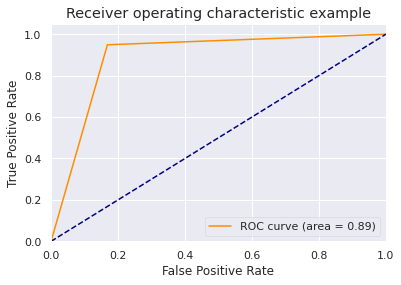

Train Accuracy : 0.9483414899401849
Train Confusion Matrix:
[[830  85]
 [ 10 914]]
--------------------------------------------------
Test Accuracy : 0.8878048780487805
Test Confusion Matrix:
[[89 18]
 [ 5 93]]


In [ ]:
print(model.score(X_train,y_train))
print(accuracy_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
#plot
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
evaluate_model(model)

In [ ]:
#gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
#apply
model=GradientBoostingClassifier(n_estimators=100,random_state=1234,max_depth=20,max_features=17,min_samples_split=3,min_samples_leaf=2)
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))

0.8926829268292683


1.0
0.8926829268292683
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       107
           1       0.86      0.93      0.89        98

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.90      0.89      0.89       205



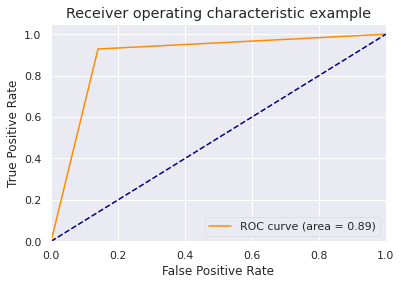

Train Accuracy : 1.0
Train Confusion Matrix:
[[915   0]
 [  0 924]]
--------------------------------------------------
Test Accuracy : 0.8926829268292683
Test Confusion Matrix:
[[92 15]
 [ 7 91]]


In [ ]:
print(model.score(X_train,y_train))
print(accuracy_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
#plot
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
evaluate_model(model)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
#apply
cv=RepeatedStratifiedKFold(n_splits=200,random_state=1)
model=GradientBoostingClassifier(n_estimators=1000,random_state=1234,max_depth=20,max_features=23,min_samples_split=2,min_samples_leaf=1,learning_rate=0.001)
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
print(scores)
print(scores.mean())

In [ ]:
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
print(evaluate_model(model))

In [ ]:
print(model.score(X_train,y_train))
print(accuracy_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
#plot
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,auc
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
evaluate_model(model)

In [ ]:
#with cross validation
from sklearn.ensemble import GradientBoostingClassifier
#apply
cv=StratifiedKFold(n_splits=100,random_state=1,shuffle=True)
model=GradientBoostingClassifier(n_estimators=100,random_state=1234,max_depth=20,max_features=3,min_samples_split=2,min_samples_leaf=1,learning_rate=0.001)
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
print(scores)
print(scores.mean())

[0.78947368 0.89473684 1.         0.78947368 0.73684211 0.84210526
 0.84210526 0.94736842 0.94736842 0.84210526 0.94736842 0.84210526
 0.94736842 0.89473684 0.94736842 0.94736842 0.94736842 1.
 0.94736842 0.94736842 0.89473684 0.89473684 0.89473684 0.89473684
 0.84210526 0.84210526 0.84210526 0.94736842 0.94736842 0.94736842
 0.89473684 0.94736842 0.89473684 0.94736842 0.94736842 0.89473684
 0.89473684 0.89473684 0.84210526 0.88888889 0.88888889 0.88888889
 0.83333333 0.88888889 1.         0.88888889 0.88888889 0.88888889
 0.88888889 1.         0.83333333 0.94444444 1.         0.77777778
 0.94444444 0.88888889 0.83333333 0.94444444 0.94444444 0.88888889
 0.94444444 1.         1.         0.94444444 0.88888889 0.72222222
 1.         0.88888889 0.94444444 0.83333333 0.88888889 0.83333333
 0.88888889 0.94444444 0.88888889 0.77777778 1.         0.88888889
 1.         1.         0.94444444 0.94444444 0.83333333 0.88888889
 1.         1.         1.         0.94444444 0.88888889 0.94444444
 0.

In [ ]:

#test on test set
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
print(evaluate_model(model))

0.9121951219512195
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       107
           1       0.88      0.95      0.91        98

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.92      0.91      0.91       205

Train Accuracy : 1.0
Train Confusion Matrix:
[[915   0]
 [  0 924]]
--------------------------------------------------
Test Accuracy : 0.9121951219512195
Test Confusion Matrix:
[[94 13]
 [ 5 93]]
None


1.0
0.9121951219512195
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       107
           1       0.88      0.95      0.91        98

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.92      0.91      0.91       205



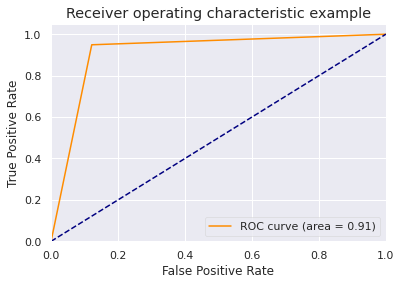

Train Accuracy : 1.0
Train Confusion Matrix:
[[915   0]
 [  0 924]]
--------------------------------------------------
Test Accuracy : 0.9121951219512195
Test Confusion Matrix:
[[94 13]
 [ 5 93]]


In [ ]:
print(model.score(X_train,y_train))
print(accuracy_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
#plot
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
evaluate_model(model)

In [ ]:
import sklearn
from lightgbm import LGBMClassifier

In [ ]:
model=LGBMClassifier(iterations=100,learning_rate=0.1,depth=17,loss_function='Logloss',random_seed=124,class_weights='balanced',n_estimators=1000)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2','elasticnet'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'random_state': [7], 'max_iter': [100,1000,2000,3000], 'tol': [0.001]}
grid_search = RandomizedSearchCV(model.fit(X_train, y_train), param_grid, cv=StratifiedKFold(n_splits=14, shuffle=True, random_state=7), scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:

#test on test set
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
print(evaluate_model(model))

0.8731707317073171
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       107
           1       0.84      0.91      0.87        98

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205

Train Accuracy : 1.0
Train Confusion Matrix:
[[915   0]
 [  0 924]]
--------------------------------------------------
Test Accuracy : 0.8731707317073171
Test Confusion Matrix:
[[90 17]
 [ 9 89]]
None


1.0
0.8731707317073171
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       107
           1       0.84      0.91      0.87        98

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205



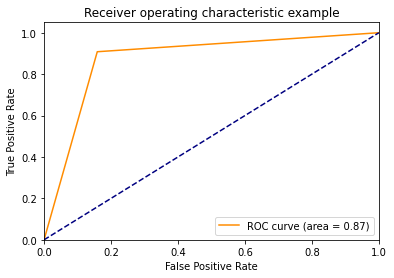

Train Accuracy : 1.0
Train Confusion Matrix:
[[915   0]
 [  0 924]]
--------------------------------------------------
Test Accuracy : 0.8731707317073171
Test Confusion Matrix:
[[90 17]
 [ 9 89]]


In [ ]:
print(model.score(X_train,y_train))
print(accuracy_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
#plot
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
evaluate_model(model)

In [ ]:
#apply adaboost
from sklearn.ensemble import AdaBoostClassifier
#apply
model=AdaBoostClassifier(n_estimators=200,random_state=1234,learning_rate=0.001,algorithm='SAMME',
base_estimator=RandomForestClassifier(max_depth=19,max_features=17,n_estimators=2000,random_state=12,criterion='entropy'))
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))

0.8682926829268293


In [ ]:

#test on test set
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
print(evaluate_model(model))

0.8682926829268293
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       107
           1       0.85      0.88      0.86        98

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205

Train Accuracy : 1.0
Train Confusion Matrix:
[[915   0]
 [  0 924]]
--------------------------------------------------
Test Accuracy : 0.8682926829268293
Test Confusion Matrix:
[[92 15]
 [12 86]]
None


1.0
0.8682926829268293
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       107
           1       0.85      0.88      0.86        98

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



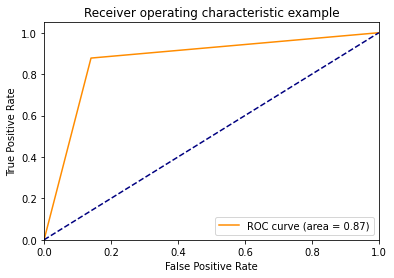

Train Accuracy : 1.0
Train Confusion Matrix:
[[915   0]
 [  0 924]]
--------------------------------------------------
Test Accuracy : 0.8682926829268293
Test Confusion Matrix:
[[92 15]
 [12 86]]


In [ ]:
print(model.score(X_train,y_train))
print(accuracy_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
#plot
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
evaluate_model(model)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model=RandomForestClassifier(n_estimators=100)
cv=StratifiedKFold(n_splits=100,random_state=1,shuffle=True)
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
random_search = RandomizedSearchCV(model.fit(X_train, y_train), param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=7), scoring='accuracy')
scores=cross_val_score(random_search,X_train,y_train,scoring='accuracy',cv=cv)
print(scores)
print(scores.mean())


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
nan


In [ ]:
#test on test set
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
print(evaluate_model(model))

0.8634146341463415
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       107
           1       0.88      0.83      0.85        98

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205

Train Accuracy : 1.0
Train Confusion Matrix:
[[915   0]
 [  0 924]]
--------------------------------------------------
Test Accuracy : 0.8634146341463415
Test Confusion Matrix:
[[96 11]
 [17 81]]
None


In [ ]:
#apply with cross validation
from sklearn.ensemble import AdaBoostClassifier
#apply
cv=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
model=AdaBoostClassifier(n_estimators=20,random_state=1234,learning_rate=0.001,algorithm='SAMME',
base_estimator=RandomForestClassifier(max_depth=23,max_features=23,n_estimators=2000,random_state=12,criterion='entropy'))
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
print(scores)
print(scores.mean())

[0.90217391 0.8423913  0.89673913 0.89673913 0.91304348 0.89130435
 0.91304348 0.85869565 0.875      0.84153005]
0.8830660489427418


In [ ]:
#test on test set
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
print(evaluate_model(model))

0.8682926829268293
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       107
           1       0.81      0.94      0.87        98

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205

Train Accuracy : 1.0
Train Confusion Matrix:
[[915   0]
 [  0 924]]
--------------------------------------------------
Test Accuracy : 0.8682926829268293
Test Confusion Matrix:
[[86 21]
 [ 6 92]]
None


In [ ]:
#with cross validation
from xgboost import XGBClassifier
#apply
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=100,random_state=1,shuffle=True)
model=XGBClassifier(n_estimators=100,random_state=1234,learning_rate=0.1,max_depth=20,max_features=23,min_child_weight=1,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.01,reg_lambda=0.01,
base_estimator=RandomForestClassifier(max_depth=21,max_features=22,n_estimators=200,random_state=12,criterion='gini',min_samples_leaf=10))
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
print(scores)

In [ ]:
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))
print(classification_report(y_test,y_decsion))

1.0
[09:52:50] WARNING: ../src/learner.cc:627: 
Parameters: { "base_estimator", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.8731707317073171
Train Accuracy : 0.9793365959760739
Train Confusion Matrix:
[[887  28]
 [ 10 914]]
--------------------------------------------------
Test Accuracy : 0.8731707317073171
Test Confusion Matrix:
[[89 18]
 [ 8 90]]
None
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       107
           1       0.83      0.92      0.87        98

    accuracy                           0.87       205
   macro avg       0.88      0.88      0.87       205
weighted avg       0.88      0.87      0.87       205



In [ ]:
model=RandomForestClassifier(max_depth=19,max_features=17,n_estimators=20,random_state=12,criterion='entropy')
param_dist={'max_depth':[19],
'n_estimators':[300,1000],
'n_jobs':[-1],
'max_features':[14.17,18],
'criterion':['gini','entropy']}
#apply
cv=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
model=GridSearchCV(model,param_dist,scoring='accuracy',cv=cv,n_jobs=-1)
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
print(scores)

[0.90217391 0.85326087 0.89673913 0.88043478 0.9076087  0.89673913
 0.9076087  0.86956522 0.88043478 0.85245902]


train_accuracy = []
validation_accuracy = []
for depth in range(10,20):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_test, y_test))
frame = pd.DataFrame({'max_depth':range(10,20), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [ ]:
import lightgbm 
from lightgbm import LGBMClassifier
cv=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
param_grid = {
    'learning_rate': [0.01,0.001,0.1],
    'n_estimators': [100,200,300],
    'depth': [17,18,19,23],
    'class_weights': ['balanced','balanced_subsample']
}
model=LGBMClassifier(iterations=100,learning_rate=0.01,depth=23,loss_function='Logloss',random_seed=1234,class_weights='balanced',n_estimators=1000)
model=GridSearchCV(model,param_grid,scoring='accuracy',cv=cv,n_jobs=-1)
scores=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=cv)
model.fit(X_train,y_train)
y_decsion=model.predict(X_test)
print(accuracy_score(y_test,y_decsion))
print(evaluate_model(model))

0.8926829268292683
Train Accuracy : 1.0
Train Confusion Matrix:
[[915   0]
 [  0 924]]
--------------------------------------------------
Test Accuracy : 0.8926829268292683
Test Confusion Matrix:
[[90 17]
 [ 5 93]]
None


In [ ]:
y_decsion=cross_val_predict(model,X_train,y_train)
print(accuracy_score(y_train,y_decsion))
print(evaluate_model(model))

0.8939641109298532
Train Accuracy : 1.0
Train Confusion Matrix:
[[915   0]
 [  0 924]]
--------------------------------------------------
Test Accuracy : 0.8926829268292683
Test Confusion Matrix:
[[90 17]
 [ 5 93]]
None


In [ ]:
import lightgbm
from lightgbm import LGBMClassifier
cv=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
model=LGBMClassifier(iterations=100,learning_rate=0.001,depth=23,loss_function='Logloss',random_seed=124,class_weights='balanced',n_estimators=100)
param_grid = {
    'learning_rate': [0.01,0.001,0.1],
    'n_estimators': [100,200,300],
    'depth': [17,18,19,23],
    'class_weights': ['balanced','balanced_subsample']
}
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9026401758137323
{'class_weights': 'balanced', 'depth': 17, 'learning_rate': 0.1, 'n_estimators': 100}


In [ ]:
y_decsion=grid_search.predict(X_test)
print(accuracy_score(y_test,y_decsion))

0.8926829268292683


In [ ]:
print(classification_report(y_test,y_decsion))
print(evaluate_model(grid_search))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       107
           1       0.85      0.95      0.89        98

    accuracy                           0.89       205
   macro avg       0.90      0.90      0.89       205
weighted avg       0.90      0.89      0.89       205

Train Accuracy : 1.0
Train Confusion Matrix:
[[915   0]
 [  0 924]]
--------------------------------------------------
Test Accuracy : 0.8926829268292683
Test Confusion Matrix:
[[90 17]
 [ 5 93]]
None


1.0
0.8926829268292683
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       107
           1       0.85      0.95      0.89        98

    accuracy                           0.89       205
   macro avg       0.90      0.90      0.89       205
weighted avg       0.90      0.89      0.89       205



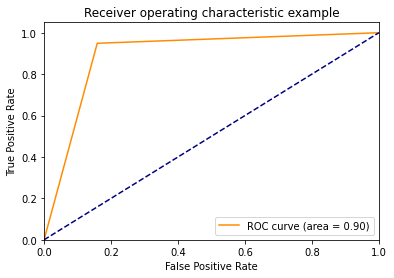

In [ ]:
print(grid_search.score(X_train,y_train))
print(accuracy_score(y_test,y_decsion))
print(classification_report(y_test,y_decsion))
fpr, tpr, thresholds = roc_curve(y_test, y_decsion)
#plot
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
model_pipeline=[]
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(SGDClassifier())
model_pipeline.append(ExtraTreesClassifier())
model_pipeline.append(GradientBoostingClassifier())
model_pipeline.append(AdaBoostClassifier())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(SVC())

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_curve
model_list =['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'SGDClassifier','ExtraTreesClassifier','GradientBoostingClassifier','AdaBoostClassifier',
             'KNeighborsClassifier','SVC']
acc_list=[]
auc_list=[]
cm_list=[]
for model in model_pipeline:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, thresholds=metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))

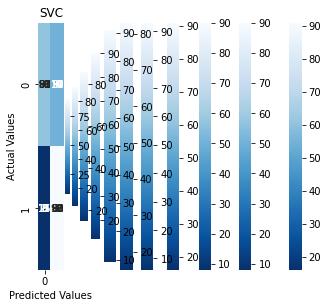

In [ ]:

fig=plt.figure(figsize =(18,10))
for i in range(len(cm_list)):
  cm=cm_list[i]
  model=model_list[i]
  sub =fig.add_subplot (2, 3, 1+1).set_title(model)
  cm_plot=sns.heatmap(cm, annot=True, cmap='Blues_r')
  cm_plot.set_xlabel('Predicted Values')
  cm_plot.set_ylabel('Actual Values')

In [ ]:
## accuracy and AUC
result_df=pd.DataFrame({'Model' :model_list, 'Accuracy': acc_list, 'AUC': auc_list,'confustion_ matrix':cm_list})
result_df

Model  Accuracy   AUC    confustion_ matrix
0          Logistic Regression  0.800000  0.80  [[91, 16], [25, 73]]
1                          SVM  0.717073  0.73   [[57, 50], [8, 90]]
2                          KNN  0.873171  0.88   [[89, 18], [8, 90]]
3                Decision Tree  0.839024  0.84  [[91, 16], [17, 81]]
4                Random Forest  0.902439  0.90   [[93, 14], [6, 92]]
5                SGDClassifier  0.746341  0.75  [[70, 37], [15, 83]]
6         ExtraTreesClassifier  0.878049  0.88   [[91, 16], [9, 89]]
7   GradientBoostingClassifier  0.858537  0.86  [[90, 17], [12, 86]]
8           AdaBoostClassifier  0.824390  0.83  [[86, 21], [15, 83]]
9         KNeighborsClassifier  0.873171  0.88   [[89, 18], [8, 90]]
10                         SVC  0.717073  0.73   [[57, 50], [8, 90]]

In [ ]:
#apply pca and tsne with cross validation to find the best model features and then apply on test
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#apply
cv=StratifiedKFold(n_splits=100,random_state=1,shuffle=True)
pca=PCA(n_components=2)
tsne=TSNE(n_components=2)
X_pca=pca.fit_transform(X_train)
X_tsne=tsne.fit_transform(X_train)
X_pca_test=pca.fit_transform(X_test)
X_tsne_test=tsne.fit_transform(X_test)
X_pca_train=X_pca
X_tsne_train=X_tsne
X_pca_test=X_pca_test
X_tsne_test=X_tsne_test

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pca_train,y_train,test_size=0.1,random_state=1)


In [ ]:
model_pipeline=[]
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(SGDClassifier())
model_pipeline.append(ExtraTreesClassifier())
model_pipeline.append(GradientBoostingClassifier())
model_pipeline.append(AdaBoostClassifier())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(SVC())
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_curve
model_list =['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'SGDClassifier','ExtraTreesClassifier','GradientBoostingClassifier','AdaBoostClassifier',
                'KNeighborsClassifier','SVC']
acc_list=[]
auc_list=[]
cm_list=[]
for model in model_pipeline:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, thresholds=metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))
## accuracy and AUC
result_df=pd.DataFrame({'Model' :model_list, 'Accuracy': acc_list, 'AUC': auc_list,'confustion_ matrix':cm_list})
result_df

Model  Accuracy   AUC    confustion_ matrix
0          Logistic Regression  0.614130  0.65   [[32, 69], [2, 81]]
1                          SVM  0.711957  0.73   [[52, 49], [4, 79]]
2                          KNN  0.777174  0.78  [[78, 23], [18, 65]]
3                Decision Tree  0.755435  0.75  [[78, 23], [22, 61]]
4                Random Forest  0.809783  0.81  [[83, 18], [17, 66]]
5                SGDClassifier  0.576087  0.58  [[54, 47], [31, 52]]
6         ExtraTreesClassifier  0.771739  0.77  [[78, 23], [19, 64]]
7   GradientBoostingClassifier  0.809783  0.81  [[77, 24], [11, 72]]
8           AdaBoostClassifier  0.815217  0.82   [[75, 26], [8, 75]]
9         KNeighborsClassifier  0.777174  0.78  [[78, 23], [18, 65]]
10                         SVC  0.711957  0.73   [[52, 49], [4, 79]]